# Feature variation by substitution ($\nu_{\phi}$)

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count', 'synonyms_count',
                  'orthographic_density']
N_COMPONENTS = 3

Imports and database setup.

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from progressbar import ProgressBar

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope
engine = init_db()

## 2 Variation of features upon substitution

First build our data.

In [3]:
model = Model(time=Time.continuous, source=Source.all, past=Past.last_bin, durl=Durl.all, max_distance=2)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id).filter(Substitution.model == model)
    print("Got {} substitutions for model {}".format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, destination = substitution.features(feature)
            source_rel, destination_rel = substitution.features(feature,
                                                                sentence_relative='median')
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'feature': feature,
                         'source': source,
                         'source_rel': source_rel,
                         'destination': destination,
                         'destination_rel': destination_rel,
                         'h0': substitution.feature_average(feature),
                         'h0_rel': substitution.feature_average(feature,
                                                                sentence_relative='median'),
                         'h0n': substitution.feature_average(feature,
                                                             source_synonyms=True),
                         'h0n_rel': substitution.feature_average(feature,
                                                                 source_synonyms=True,
                                                                 sentence_relative='median')})

original_variations = pd.DataFrame(data)
del data

Got 67981 substitutions for model Model(time=Time.continuous, source=Source.all, past=Past.last_bin, durl=Durl.all, max_distance=2)


  0% (    1 of 67981) |          | Elapsed Time: 0:00:29 ETA:  22 days, 23:20:28

  0% (   74 of 67981) |                    | Elapsed Time: 0:00:30 ETA:  0:15:05

  0% (  151 of 67981) |                    | Elapsed Time: 0:00:31 ETA:  0:14:39

  0% (  225 of 67981) |                    | Elapsed Time: 0:00:32 ETA:  0:14:42

  0% (  297 of 67981) |                    | Elapsed Time: 0:00:33 ETA:  0:14:49

  0% (  370 of 67981) |                    | Elapsed Time: 0:00:34 ETA:  0:14:50

  0% (  446 of 67981) |                    | Elapsed Time: 0:00:35 ETA:  0:14:45

  0% (  520 of 67981) |                    | Elapsed Time: 0:00:36 ETA:  0:14:44

  0% (  593 of 67981) |                    | Elapsed Time: 0:00:37 ETA:  0:14:46

  0% (  667 of 67981) |                    | Elapsed Time: 0:00:38 ETA:  0:14:45

  1% (  740 of 67981) |                    | Elapsed Time: 0:00:39 ETA:  0:14:45

  1% (  815 of 67981) |                    | Elapsed Time: 0:00:40 ETA:  0:14:47

  1% (  850 of 67981) |                    | Elapsed Time: 0:00:40 ETA:  0:14:49

  1% (  924 of 67981) |                    | Elapsed Time: 0:00:41 ETA:  0:14:44

  1% (  996 of 67981) |                    | Elapsed Time: 0:00:42 ETA:  0:14:44

  1% ( 1069 of 67981) |                    | Elapsed Time: 0:00:43 ETA:  0:14:48

  1% ( 1143 of 67981) |                    | Elapsed Time: 0:00:44 ETA:  0:14:47

  1% ( 1217 of 67981) |                    | Elapsed Time: 0:00:45 ETA:  0:14:45

  1% ( 1289 of 67981) |                    | Elapsed Time: 0:00:46 ETA:  0:14:46

  2% ( 1363 of 67981) |                    | Elapsed Time: 0:00:47 ETA:  0:14:43

  2% ( 1438 of 67981) |                    | Elapsed Time: 0:00:48 ETA:  0:14:42

  2% ( 1511 of 67981) |                    | Elapsed Time: 0:00:49 ETA:  0:14:40

  2% ( 1585 of 67981) |                    | Elapsed Time: 0:00:50 ETA:  0:14:39

  2% ( 1657 of 67981) |                    | Elapsed Time: 0:00:51 ETA:  0:14:38

  2% ( 1700 of 67981) |                    | Elapsed Time: 0:00:52 ETA:  0:14:36

  2% ( 1775 of 67981) |                    | Elapsed Time: 0:00:53 ETA:  0:14:33

  2% ( 1852 of 67981) |                    | Elapsed Time: 0:00:54 ETA:  0:14:26

  2% ( 1928 of 67981) |                    | Elapsed Time: 0:00:55 ETA:  0:14:20

  2% ( 2004 of 67981) |                    | Elapsed Time: 0:00:56 ETA:  0:14:17

  3% ( 2079 of 67981) |                    | Elapsed Time: 0:00:57 ETA:  0:14:16

  3% ( 2093 of 67981) |                    | Elapsed Time: 0:00:58 ETA:  0:16:02

  3% ( 2167 of 67981) |                    | Elapsed Time: 0:00:59 ETA:  0:16:02

  3% ( 2242 of 67981) |                    | Elapsed Time: 0:01:00 ETA:  0:15:57

  3% ( 2317 of 67981) |                    | Elapsed Time: 0:01:01 ETA:  0:15:50

  3% ( 2392 of 67981) |                    | Elapsed Time: 0:01:02 ETA:  0:15:49

  3% ( 2465 of 67981) |                    | Elapsed Time: 0:01:03 ETA:  0:15:55

  3% ( 2536 of 67981) |                    | Elapsed Time: 0:01:04 ETA:  0:16:01

  3% ( 2550 of 67981) |                    | Elapsed Time: 0:01:04 ETA:  0:16:18

  3% ( 2620 of 67981) |                    | Elapsed Time: 0:01:05 ETA:  0:16:26

  3% ( 2694 of 67981) |                    | Elapsed Time: 0:01:06 ETA:  0:14:26

  4% ( 2769 of 67981) |                    | Elapsed Time: 0:01:07 ETA:  0:14:23

  4% ( 2845 of 67981) |                    | Elapsed Time: 0:01:08 ETA:  0:14:20

  4% ( 2914 of 67981) |                    | Elapsed Time: 0:01:09 ETA:  0:14:30

  4% ( 2989 of 67981) |                    | Elapsed Time: 0:01:10 ETA:  0:14:29

  4% ( 3064 of 67981) |                    | Elapsed Time: 0:01:11 ETA:  0:14:25

  4% ( 3142 of 67981) |                    | Elapsed Time: 0:01:12 ETA:  0:14:13

  4% ( 3219 of 67981) |                    | Elapsed Time: 0:01:13 ETA:  0:14:07

  4% ( 3300 of 67981) |                    | Elapsed Time: 0:01:14 ETA:  0:13:51

  4% ( 3378 of 67981) |                    | Elapsed Time: 0:01:15 ETA:  0:13:44

  5% ( 3400 of 67981) |#                   | Elapsed Time: 0:01:16 ETA:  0:13:41

  5% ( 3473 of 67981) |#                   | Elapsed Time: 0:01:17 ETA:  0:13:44

  5% ( 3544 of 67981) |#                   | Elapsed Time: 0:01:18 ETA:  0:13:40

  5% ( 3615 of 67981) |#                   | Elapsed Time: 0:01:19 ETA:  0:13:44

  5% ( 3682 of 67981) |#                   | Elapsed Time: 0:01:20 ETA:  0:13:55

  5% ( 3753 of 67981) |#                   | Elapsed Time: 0:01:21 ETA:  0:14:04

  5% ( 3818 of 67981) |#                   | Elapsed Time: 0:01:22 ETA:  0:14:20

  5% ( 3886 of 67981) |#                   | Elapsed Time: 0:01:23 ETA:  0:14:40

  5% ( 3959 of 67981) |#                   | Elapsed Time: 0:01:24 ETA:  0:14:48

  5% ( 4033 of 67981) |#                   | Elapsed Time: 0:01:25 ETA:  0:14:46

  6% ( 4108 of 67981) |#                   | Elapsed Time: 0:01:26 ETA:  0:14:42

  6% ( 4182 of 67981) |#                   | Elapsed Time: 0:01:27 ETA:  0:14:36

  6% ( 4249 of 67981) |#                   | Elapsed Time: 0:01:28 ETA:  0:14:39

  6% ( 4313 of 67981) |#                   | Elapsed Time: 0:01:29 ETA:  0:14:44

  6% ( 4369 of 67981) |#                   | Elapsed Time: 0:01:30 ETA:  0:15:07

  6% ( 4428 of 67981) |#                   | Elapsed Time: 0:01:31 ETA:  0:15:17

  6% ( 4492 of 67981) |#                   | Elapsed Time: 0:01:32 ETA:  0:15:23

  6% ( 4554 of 67981) |#                   | Elapsed Time: 0:01:33 ETA:  0:15:40

  6% ( 4619 of 67981) |#                   | Elapsed Time: 0:01:34 ETA:  0:15:56

  6% ( 4682 of 67981) |#                   | Elapsed Time: 0:01:35 ETA:  0:16:16

  6% ( 4745 of 67981) |#                   | Elapsed Time: 0:01:36 ETA:  0:16:37

  7% ( 4815 of 67981) |#                   | Elapsed Time: 0:01:37 ETA:  0:16:32

  7% ( 4885 of 67981) |#                   | Elapsed Time: 0:01:38 ETA:  0:16:19

  7% ( 4954 of 67981) |#                   | Elapsed Time: 0:01:39 ETA:  0:15:54

  7% ( 5021 of 67981) |#                   | Elapsed Time: 0:01:40 ETA:  0:15:38

  7% ( 5099 of 67981) |#                   | Elapsed Time: 0:01:41 ETA:  0:15:16

  7% ( 5170 of 67981) |#                   | Elapsed Time: 0:01:42 ETA:  0:15:03

  7% ( 5241 of 67981) |#                   | Elapsed Time: 0:01:43 ETA:  0:14:49

  7% ( 5314 of 67981) |#                   | Elapsed Time: 0:01:44 ETA:  0:14:30

  7% ( 5390 of 67981) |#                   | Elapsed Time: 0:01:45 ETA:  0:14:18

  8% ( 5463 of 67981) |#                   | Elapsed Time: 0:01:46 ETA:  0:14:12

  8% ( 5493 of 67981) |#                   | Elapsed Time: 0:01:47 ETA:  0:16:21

  8% ( 5562 of 67981) |#                   | Elapsed Time: 0:01:48 ETA:  0:16:16

  8% ( 5633 of 67981) |#                   | Elapsed Time: 0:01:49 ETA:  0:16:15

  8% ( 5706 of 67981) |#                   | Elapsed Time: 0:01:50 ETA:  0:15:58

  8% ( 5779 of 67981) |#                   | Elapsed Time: 0:01:51 ETA:  0:15:53

  8% ( 5851 of 67981) |#                   | Elapsed Time: 0:01:52 ETA:  0:15:49

  8% ( 5925 of 67981) |#                   | Elapsed Time: 0:01:53 ETA:  0:15:46

  8% ( 5949 of 67981) |#                   | Elapsed Time: 0:01:54 ETA:  0:16:01

  8% ( 6022 of 67981) |#                   | Elapsed Time: 0:01:55 ETA:  0:16:00

  8% ( 6092 of 67981) |#                   | Elapsed Time: 0:01:56 ETA:  0:13:53

  9% ( 6165 of 67981) |#                   | Elapsed Time: 0:01:57 ETA:  0:13:46

  9% ( 6240 of 67981) |#                   | Elapsed Time: 0:01:58 ETA:  0:13:39

  9% ( 6315 of 67981) |#                   | Elapsed Time: 0:01:59 ETA:  0:13:35

  9% ( 6386 of 67981) |#                   | Elapsed Time: 0:02:00 ETA:  0:13:36

  9% ( 6458 of 67981) |#                   | Elapsed Time: 0:02:01 ETA:  0:13:36

  9% ( 6527 of 67981) |#                   | Elapsed Time: 0:02:02 ETA:  0:13:44

  9% ( 6601 of 67981) |#                   | Elapsed Time: 0:02:03 ETA:  0:13:42

  9% ( 6675 of 67981) |#                   | Elapsed Time: 0:02:04 ETA:  0:13:39

  9% ( 6748 of 67981) |#                   | Elapsed Time: 0:02:05 ETA:  0:13:33

 10% ( 6799 of 67981) |##                  | Elapsed Time: 0:02:06 ETA:  0:13:38

 10% ( 6872 of 67981) |##                  | Elapsed Time: 0:02:07 ETA:  0:13:41

 10% ( 6938 of 67981) |##                  | Elapsed Time: 0:02:08 ETA:  0:13:53

 10% ( 7004 of 67981) |##                  | Elapsed Time: 0:02:09 ETA:  0:14:01

 10% ( 7070 of 67981) |##                  | Elapsed Time: 0:02:10 ETA:  0:14:09

 10% ( 7147 of 67981) |##                  | Elapsed Time: 0:02:11 ETA:  0:13:54

 10% ( 7223 of 67981) |##                  | Elapsed Time: 0:02:12 ETA:  0:13:50

 10% ( 7293 of 67981) |##                  | Elapsed Time: 0:02:13 ETA:  0:13:56

 10% ( 7357 of 67981) |##                  | Elapsed Time: 0:02:14 ETA:  0:14:10

 10% ( 7424 of 67981) |##                  | Elapsed Time: 0:02:15 ETA:  0:14:11

 11% ( 7490 of 67981) |##                  | Elapsed Time: 0:02:16 ETA:  0:14:20

 11% ( 7555 of 67981) |##                  | Elapsed Time: 0:02:17 ETA:  0:14:20

 11% ( 7619 of 67981) |##                  | Elapsed Time: 0:02:18 ETA:  0:14:22

 11% ( 7648 of 67981) |##                  | Elapsed Time: 0:02:18 ETA:  0:14:20

 11% ( 7714 of 67981) |##                  | Elapsed Time: 0:02:19 ETA:  0:14:39

 11% ( 7779 of 67981) |##                  | Elapsed Time: 0:02:20 ETA:  0:14:57

 11% ( 7848 of 67981) |##                  | Elapsed Time: 0:02:21 ETA:  0:14:59

 11% ( 7908 of 67981) |##                  | Elapsed Time: 0:02:22 ETA:  0:15:04

 11% ( 7974 of 67981) |##                  | Elapsed Time: 0:02:23 ETA:  0:15:05

 11% ( 8038 of 67981) |##                  | Elapsed Time: 0:02:24 ETA:  0:15:09

 11% ( 8108 of 67981) |##                  | Elapsed Time: 0:02:25 ETA:  0:14:58

 12% ( 8181 of 67981) |##                  | Elapsed Time: 0:02:26 ETA:  0:14:41

 12% ( 8250 of 67981) |##                  | Elapsed Time: 0:02:27 ETA:  0:14:34

 12% ( 8318 of 67981) |##                  | Elapsed Time: 0:02:28 ETA:  0:14:30

 12% ( 8386 of 67981) |##                  | Elapsed Time: 0:02:29 ETA:  0:14:25

 12% ( 8456 of 67981) |##                  | Elapsed Time: 0:02:30 ETA:  0:14:21

 12% ( 8498 of 67981) |##                  | Elapsed Time: 0:02:31 ETA:  0:14:01

 12% ( 8576 of 67981) |##                  | Elapsed Time: 0:02:32 ETA:  0:13:39

 12% ( 8646 of 67981) |##                  | Elapsed Time: 0:02:33 ETA:  0:13:28

 12% ( 8716 of 67981) |##                  | Elapsed Time: 0:02:34 ETA:  0:13:29

 12% ( 8780 of 67981) |##                  | Elapsed Time: 0:02:35 ETA:  0:13:42

 13% ( 8844 of 67981) |##                  | Elapsed Time: 0:02:36 ETA:  0:13:50

 13% ( 8911 of 67981) |##                  | Elapsed Time: 0:02:37 ETA:  0:13:50

 13% ( 8980 of 67981) |##                  | Elapsed Time: 0:02:38 ETA:  0:13:47

 13% ( 9046 of 67981) |##                  | Elapsed Time: 0:02:39 ETA:  0:13:54

 13% ( 9114 of 67981) |##                  | Elapsed Time: 0:02:40 ETA:  0:14:00

 13% ( 9183 of 67981) |##                  | Elapsed Time: 0:02:41 ETA:  0:14:14

 13% ( 9248 of 67981) |##                  | Elapsed Time: 0:02:42 ETA:  0:14:21

 13% ( 9318 of 67981) |##                  | Elapsed Time: 0:02:43 ETA:  0:14:20

 13% ( 9348 of 67981) |##                  | Elapsed Time: 0:02:43 ETA:  0:14:13

 13% ( 9411 of 67981) |##                  | Elapsed Time: 0:02:44 ETA:  0:14:14

 13% ( 9482 of 67981) |##                  | Elapsed Time: 0:02:45 ETA:  0:14:05

 14% ( 9551 of 67981) |##                  | Elapsed Time: 0:02:46 ETA:  0:14:04

 14% ( 9621 of 67981) |##                  | Elapsed Time: 0:02:47 ETA:  0:13:56

 14% ( 9690 of 67981) |##                  | Elapsed Time: 0:02:48 ETA:  0:13:54

 14% ( 9697 of 67981) |##                  | Elapsed Time: 0:02:50 ETA:  0:16:59

 14% ( 9759 of 67981) |##                  | Elapsed Time: 0:02:51 ETA:  0:17:06

 14% ( 9825 of 67981) |##                  | Elapsed Time: 0:02:52 ETA:  0:17:13

 14% ( 9888 of 67981) |##                  | Elapsed Time: 0:02:53 ETA:  0:17:11

 14% ( 9957 of 67981) |##                  | Elapsed Time: 0:02:54 ETA:  0:16:56

 14% (10029 of 67981) |##                  | Elapsed Time: 0:02:55 ETA:  0:16:54

 14% (10098 of 67981) |##                  | Elapsed Time: 0:02:56 ETA:  0:16:53

 14% (10168 of 67981) |##                  | Elapsed Time: 0:02:57 ETA:  0:16:51

 15% (10198 of 67981) |###                 | Elapsed Time: 0:02:57 ETA:  0:17:05

 15% (10268 of 67981) |###                 | Elapsed Time: 0:02:58 ETA:  0:13:52

 15% (10337 of 67981) |###                 | Elapsed Time: 0:02:59 ETA:  0:13:38

 15% (10407 of 67981) |###                 | Elapsed Time: 0:03:00 ETA:  0:13:31

 15% (10479 of 67981) |###                 | Elapsed Time: 0:03:01 ETA:  0:13:16

 15% (10549 of 67981) |###                 | Elapsed Time: 0:03:02 ETA:  0:13:13

 15% (10619 of 67981) |###                 | Elapsed Time: 0:03:03 ETA:  0:13:15

 15% (10691 of 67981) |###                 | Elapsed Time: 0:03:04 ETA:  0:13:10

 15% (10761 of 67981) |###                 | Elapsed Time: 0:03:05 ETA:  0:13:10

 15% (10830 of 67981) |###                 | Elapsed Time: 0:03:06 ETA:  0:13:10

 16% (10900 of 67981) |###                 | Elapsed Time: 0:03:07 ETA:  0:13:08

 16% (10971 of 67981) |###                 | Elapsed Time: 0:03:08 ETA:  0:13:03

 16% (11047 of 67981) |###                 | Elapsed Time: 0:03:09 ETA:  0:13:02

 16% (11116 of 67981) |###                 | Elapsed Time: 0:03:10 ETA:  0:13:04

 16% (11184 of 67981) |###                 | Elapsed Time: 0:03:12 ETA:  0:13:06

 16% (11251 of 67981) |###                 | Elapsed Time: 0:03:13 ETA:  0:13:14

 16% (11324 of 67981) |###                 | Elapsed Time: 0:03:14 ETA:  0:13:08

 16% (11397 of 67981) |###                 | Elapsed Time: 0:03:15 ETA:  0:13:00

 16% (11469 of 67981) |###                 | Elapsed Time: 0:03:16 ETA:  0:12:57

 16% (11535 of 67981) |###                 | Elapsed Time: 0:03:17 ETA:  0:13:04

 17% (11602 of 67981) |###                 | Elapsed Time: 0:03:18 ETA:  0:13:10

 17% (11670 of 67981) |###                 | Elapsed Time: 0:03:19 ETA:  0:13:13

 17% (11736 of 67981) |###                 | Elapsed Time: 0:03:20 ETA:  0:13:16

 17% (11803 of 67981) |###                 | Elapsed Time: 0:03:21 ETA:  0:13:17

 17% (11874 of 67981) |###                 | Elapsed Time: 0:03:22 ETA:  0:13:10

 17% (11897 of 67981) |###                 | Elapsed Time: 0:03:22 ETA:  0:13:15

 17% (11967 of 67981) |###                 | Elapsed Time: 0:03:23 ETA:  0:13:20

 17% (12044 of 67981) |###                 | Elapsed Time: 0:03:24 ETA:  0:13:11

 17% (12119 of 67981) |###                 | Elapsed Time: 0:03:25 ETA:  0:12:55

 17% (12193 of 67981) |###                 | Elapsed Time: 0:03:26 ETA:  0:12:42

 18% (12263 of 67981) |###                 | Elapsed Time: 0:03:27 ETA:  0:12:36

 18% (12335 of 67981) |###                 | Elapsed Time: 0:03:28 ETA:  0:12:26

 18% (12406 of 67981) |###                 | Elapsed Time: 0:03:29 ETA:  0:12:17

 18% (12481 of 67981) |###                 | Elapsed Time: 0:03:30 ETA:  0:12:09

 18% (12554 of 67981) |###                 | Elapsed Time: 0:03:31 ETA:  0:12:07

 18% (12629 of 67981) |###                 | Elapsed Time: 0:03:32 ETA:  0:11:58

 18% (12706 of 67981) |###                 | Elapsed Time: 0:03:33 ETA:  0:11:56

 18% (12747 of 67981) |###                 | Elapsed Time: 0:03:34 ETA:  0:11:59

 18% (12821 of 67981) |###                 | Elapsed Time: 0:03:35 ETA:  0:11:58

 18% (12895 of 67981) |###                 | Elapsed Time: 0:03:36 ETA:  0:11:50

 19% (12969 of 67981) |###                 | Elapsed Time: 0:03:37 ETA:  0:11:46

 19% (13040 of 67981) |###                 | Elapsed Time: 0:03:38 ETA:  0:11:45

 19% (13105 of 67981) |###                 | Elapsed Time: 0:03:39 ETA:  0:12:00

 19% (13175 of 67981) |###                 | Elapsed Time: 0:03:40 ETA:  0:12:03

 19% (13246 of 67981) |###                 | Elapsed Time: 0:03:41 ETA:  0:12:08

 19% (13317 of 67981) |###                 | Elapsed Time: 0:03:42 ETA:  0:12:16

 19% (13387 of 67981) |###                 | Elapsed Time: 0:03:43 ETA:  0:12:19

 19% (13453 of 67981) |###                 | Elapsed Time: 0:03:44 ETA:  0:12:30

 19% (13521 of 67981) |###                 | Elapsed Time: 0:03:45 ETA:  0:12:38

 20% (13597 of 67981) |####                | Elapsed Time: 0:03:46 ETA:  0:12:42

 20% (13670 of 67981) |####                | Elapsed Time: 0:03:47 ETA:  0:12:25

 20% (13745 of 67981) |####                | Elapsed Time: 0:03:48 ETA:  0:12:16

 20% (13816 of 67981) |####                | Elapsed Time: 0:03:49 ETA:  0:12:15

 20% (13888 of 67981) |####                | Elapsed Time: 0:03:50 ETA:  0:12:13

 20% (13957 of 67981) |####                | Elapsed Time: 0:03:51 ETA:  0:12:14

 20% (14023 of 67981) |####                | Elapsed Time: 0:03:52 ETA:  0:12:14

 20% (14088 of 67981) |####                | Elapsed Time: 0:03:53 ETA:  0:12:17

 20% (14160 of 67981) |####                | Elapsed Time: 0:03:54 ETA:  0:12:18

 20% (14232 of 67981) |####                | Elapsed Time: 0:03:55 ETA:  0:12:15

 21% (14301 of 67981) |####                | Elapsed Time: 0:03:56 ETA:  0:12:20

 21% (14365 of 67981) |####                | Elapsed Time: 0:03:57 ETA:  0:12:37

 21% (14428 of 67981) |####                | Elapsed Time: 0:03:58 ETA:  0:12:49

 21% (14446 of 67981) |####                | Elapsed Time: 0:03:58 ETA:  0:13:03

 21% (14507 of 67981) |####                | Elapsed Time: 0:03:59 ETA:  0:13:16

 21% (14568 of 67981) |####                | Elapsed Time: 0:04:00 ETA:  0:13:23

 21% (14638 of 67981) |####                | Elapsed Time: 0:04:01 ETA:  0:13:13

 21% (14707 of 67981) |####                | Elapsed Time: 0:04:02 ETA:  0:13:19

 21% (14767 of 67981) |####                | Elapsed Time: 0:04:03 ETA:  0:13:41

 21% (14841 of 67981) |####                | Elapsed Time: 0:04:04 ETA:  0:13:29

 21% (14916 of 67981) |####                | Elapsed Time: 0:04:05 ETA:  0:13:08

 21% (14943 of 67981) |####                | Elapsed Time: 0:04:08 ETA:  0:17:26

 22% (14999 of 67981) |####                | Elapsed Time: 0:04:09 ETA:  0:17:21

 22% (15070 of 67981) |####                | Elapsed Time: 0:04:10 ETA:  0:16:56

 22% (15141 of 67981) |####                | Elapsed Time: 0:04:11 ETA:  0:16:33

 22% (15206 of 67981) |####                | Elapsed Time: 0:04:12 ETA:  0:16:43

 22% (15269 of 67981) |####                | Elapsed Time: 0:04:13 ETA:  0:16:54

 22% (15296 of 67981) |####                | Elapsed Time: 0:04:13 ETA:  0:16:52

 22% (15367 of 67981) |####                | Elapsed Time: 0:04:14 ETA:  0:16:59

 22% (15434 of 67981) |####                | Elapsed Time: 0:04:15 ETA:  0:17:17

 22% (15502 of 67981) |####                | Elapsed Time: 0:04:16 ETA:  0:12:47

 22% (15574 of 67981) |####                | Elapsed Time: 0:04:17 ETA:  0:12:16

 23% (15648 of 67981) |####                | Elapsed Time: 0:04:18 ETA:  0:12:10

 23% (15723 of 67981) |####                | Elapsed Time: 0:04:19 ETA:  0:12:03

 23% (15796 of 67981) |####                | Elapsed Time: 0:04:20 ETA:  0:11:48

 23% (15870 of 67981) |####                | Elapsed Time: 0:04:21 ETA:  0:11:29

 23% (15941 of 67981) |####                | Elapsed Time: 0:04:22 ETA:  0:11:30

 23% (16015 of 67981) |####                | Elapsed Time: 0:04:23 ETA:  0:11:25

 23% (16088 of 67981) |####                | Elapsed Time: 0:04:24 ETA:  0:11:15

 23% (16146 of 67981) |####                | Elapsed Time: 0:04:25 ETA:  0:11:12

 23% (16221 of 67981) |####                | Elapsed Time: 0:04:26 ETA:  0:11:08

 23% (16293 of 67981) |####                | Elapsed Time: 0:04:27 ETA:  0:11:10

 24% (16365 of 67981) |####                | Elapsed Time: 0:04:28 ETA:  0:11:13

 24% (16437 of 67981) |####                | Elapsed Time: 0:04:29 ETA:  0:11:13

 24% (16504 of 67981) |####                | Elapsed Time: 0:04:30 ETA:  0:11:22

 24% (16578 of 67981) |####                | Elapsed Time: 0:04:31 ETA:  0:11:17

 24% (16652 of 67981) |####                | Elapsed Time: 0:04:32 ETA:  0:11:15

 24% (16720 of 67981) |####                | Elapsed Time: 0:04:33 ETA:  0:11:22

 24% (16791 of 67981) |####                | Elapsed Time: 0:04:34 ETA:  0:11:20

 24% (16859 of 67981) |####                | Elapsed Time: 0:04:35 ETA:  0:11:28

 24% (16928 of 67981) |####                | Elapsed Time: 0:04:36 ETA:  0:11:31

 25% (16996 of 67981) |#####               | Elapsed Time: 0:04:37 ETA:  0:11:49

 25% (17059 of 67981) |#####               | Elapsed Time: 0:04:38 ETA:  0:11:56

 25% (17123 of 67981) |#####               | Elapsed Time: 0:04:39 ETA:  0:12:13

 25% (17185 of 67981) |#####               | Elapsed Time: 0:04:40 ETA:  0:12:35

 25% (17242 of 67981) |#####               | Elapsed Time: 0:04:41 ETA:  0:12:56

 25% (17305 of 67981) |#####               | Elapsed Time: 0:04:42 ETA:  0:13:10

 25% (17362 of 67981) |#####               | Elapsed Time: 0:04:43 ETA:  0:13:33

 25% (17432 of 67981) |#####               | Elapsed Time: 0:04:44 ETA:  0:13:31

 25% (17500 of 67981) |#####               | Elapsed Time: 0:04:45 ETA:  0:13:21

 25% (17570 of 67981) |#####               | Elapsed Time: 0:04:46 ETA:  0:13:07

 25% (17640 of 67981) |#####               | Elapsed Time: 0:04:47 ETA:  0:12:52

 26% (17707 of 67981) |#####               | Elapsed Time: 0:04:48 ETA:  0:12:45

 26% (17766 of 67981) |#####               | Elapsed Time: 0:04:49 ETA:  0:12:49

 26% (17832 of 67981) |#####               | Elapsed Time: 0:04:50 ETA:  0:12:32

 26% (17846 of 67981) |#####               | Elapsed Time: 0:04:50 ETA:  0:12:26

 26% (17916 of 67981) |#####               | Elapsed Time: 0:04:51 ETA:  0:12:01

 26% (17989 of 67981) |#####               | Elapsed Time: 0:04:52 ETA:  0:11:53

 26% (18060 of 67981) |#####               | Elapsed Time: 0:04:53 ETA:  0:11:47

 26% (18132 of 67981) |#####               | Elapsed Time: 0:04:54 ETA:  0:11:41

 26% (18200 of 67981) |#####               | Elapsed Time: 0:04:55 ETA:  0:11:44

 26% (18271 of 67981) |#####               | Elapsed Time: 0:04:56 ETA:  0:11:35

 26% (18347 of 67981) |#####               | Elapsed Time: 0:04:57 ETA:  0:11:06

 27% (18421 of 67981) |#####               | Elapsed Time: 0:04:58 ETA:  0:10:52

 27% (18495 of 67981) |#####               | Elapsed Time: 0:04:59 ETA:  0:10:47

 27% (18567 of 67981) |#####               | Elapsed Time: 0:05:00 ETA:  0:10:41

 27% (18634 of 67981) |#####               | Elapsed Time: 0:05:01 ETA:  0:10:50

 27% (18695 of 67981) |#####               | Elapsed Time: 0:05:02 ETA:  0:10:47

 27% (18759 of 67981) |#####               | Elapsed Time: 0:05:03 ETA:  0:10:58

 27% (18822 of 67981) |#####               | Elapsed Time: 0:05:04 ETA:  0:11:06

 27% (18889 of 67981) |#####               | Elapsed Time: 0:05:05 ETA:  0:11:12

 27% (18959 of 67981) |#####               | Elapsed Time: 0:05:06 ETA:  0:11:21

 27% (19029 of 67981) |#####               | Elapsed Time: 0:05:07 ETA:  0:11:27

 28% (19102 of 67981) |#####               | Elapsed Time: 0:05:08 ETA:  0:11:29

 28% (19175 of 67981) |#####               | Elapsed Time: 0:05:09 ETA:  0:11:28

 28% (19249 of 67981) |#####               | Elapsed Time: 0:05:10 ETA:  0:11:14

 28% (19325 of 67981) |#####               | Elapsed Time: 0:05:11 ETA:  0:11:08

 28% (19399 of 67981) |#####               | Elapsed Time: 0:05:12 ETA:  0:10:52

 28% (19473 of 67981) |#####               | Elapsed Time: 0:05:13 ETA:  0:10:34

 28% (19545 of 67981) |#####               | Elapsed Time: 0:05:14 ETA:  0:10:23

 28% (19617 of 67981) |#####               | Elapsed Time: 0:05:15 ETA:  0:10:17

 28% (19691 of 67981) |#####               | Elapsed Time: 0:05:16 ETA:  0:10:14

 29% (19764 of 67981) |#####               | Elapsed Time: 0:05:17 ETA:  0:10:12

 29% (19843 of 67981) |#####               | Elapsed Time: 0:05:18 ETA:  0:10:04

 29% (19915 of 67981) |#####               | Elapsed Time: 0:05:19 ETA:  0:10:09

 29% (19991 of 67981) |#####               | Elapsed Time: 0:05:20 ETA:  0:10:05

 29% (20061 of 67981) |#####               | Elapsed Time: 0:05:21 ETA:  0:10:10

 29% (20122 of 67981) |#####               | Elapsed Time: 0:05:22 ETA:  0:10:24

 29% (20170 of 67981) |#####               | Elapsed Time: 0:05:23 ETA:  0:11:00

 29% (20238 of 67981) |#####               | Elapsed Time: 0:05:24 ETA:  0:11:05

 29% (20305 of 67981) |#####               | Elapsed Time: 0:05:25 ETA:  0:11:16

 29% (20379 of 67981) |#####               | Elapsed Time: 0:05:26 ETA:  0:11:13

 30% (20395 of 67981) |######              | Elapsed Time: 0:05:27 ETA:  0:11:33

 30% (20466 of 67981) |######              | Elapsed Time: 0:05:28 ETA:  0:11:35

 30% (20535 of 67981) |######              | Elapsed Time: 0:05:29 ETA:  0:11:47

 30% (20602 of 67981) |######              | Elapsed Time: 0:05:30 ETA:  0:11:50

 30% (20670 of 67981) |######              | Elapsed Time: 0:05:31 ETA:  0:11:38

 30% (20736 of 67981) |######              | Elapsed Time: 0:05:32 ETA:  0:11:04

 30% (20802 of 67981) |######              | Elapsed Time: 0:05:33 ETA:  0:11:07

 30% (20867 of 67981) |######              | Elapsed Time: 0:05:34 ETA:  0:11:09

 30% (20934 of 67981) |######              | Elapsed Time: 0:05:35 ETA:  0:11:21

 30% (20999 of 67981) |######              | Elapsed Time: 0:05:36 ETA:  0:11:23

 30% (21072 of 67981) |######              | Elapsed Time: 0:05:37 ETA:  0:11:18

 31% (21148 of 67981) |######              | Elapsed Time: 0:05:38 ETA:  0:11:06

 31% (21221 of 67981) |######              | Elapsed Time: 0:05:39 ETA:  0:10:56

 31% (21245 of 67981) |######              | Elapsed Time: 0:05:39 ETA:  0:10:53

 31% (21316 of 67981) |######              | Elapsed Time: 0:05:40 ETA:  0:10:45

 31% (21388 of 67981) |######              | Elapsed Time: 0:05:41 ETA:  0:10:35

 31% (21406 of 67981) |######              | Elapsed Time: 0:05:44 ETA:  0:15:20

 31% (21470 of 67981) |######              | Elapsed Time: 0:05:45 ETA:  0:15:26

 31% (21529 of 67981) |######              | Elapsed Time: 0:05:46 ETA:  0:15:40

 31% (21585 of 67981) |######              | Elapsed Time: 0:05:47 ETA:  0:16:24

 31% (21645 of 67981) |######              | Elapsed Time: 0:05:48 ETA:  0:17:04

 31% (21707 of 67981) |######              | Elapsed Time: 0:05:49 ETA:  0:17:33

 32% (21769 of 67981) |######              | Elapsed Time: 0:05:50 ETA:  0:17:16

 32% (21838 of 67981) |######              | Elapsed Time: 0:05:51 ETA:  0:17:20

 32% (21911 of 67981) |######              | Elapsed Time: 0:05:52 ETA:  0:17:16

 32% (21986 of 67981) |######              | Elapsed Time: 0:05:53 ETA:  0:11:50

 32% (22063 of 67981) |######              | Elapsed Time: 0:05:54 ETA:  0:11:26

 32% (22094 of 67981) |######              | Elapsed Time: 0:05:54 ETA:  0:11:06

 32% (22166 of 67981) |######              | Elapsed Time: 0:05:55 ETA:  0:10:36

 32% (22231 of 67981) |######              | Elapsed Time: 0:05:56 ETA:  0:10:27

 32% (22294 of 67981) |######              | Elapsed Time: 0:05:57 ETA:  0:10:25

 32% (22366 of 67981) |######              | Elapsed Time: 0:05:58 ETA:  0:10:07

 33% (22436 of 67981) |######              | Elapsed Time: 0:05:59 ETA:  0:10:04

 33% (22511 of 67981) |######              | Elapsed Time: 0:06:00 ETA:  0:10:00

 33% (22583 of 67981) |######              | Elapsed Time: 0:06:01 ETA:  0:10:04

 33% (22656 of 67981) |######              | Elapsed Time: 0:06:02 ETA:  0:10:10

 33% (22729 of 67981) |######              | Elapsed Time: 0:06:03 ETA:  0:10:08

 33% (22805 of 67981) |######              | Elapsed Time: 0:06:04 ETA:  0:10:00

 33% (22877 of 67981) |######              | Elapsed Time: 0:06:05 ETA:  0:09:49

 33% (22944 of 67981) |######              | Elapsed Time: 0:06:06 ETA:  0:09:44

 33% (23006 of 67981) |######              | Elapsed Time: 0:06:07 ETA:  0:09:56

 33% (23081 of 67981) |######              | Elapsed Time: 0:06:08 ETA:  0:09:54

 34% (23153 of 67981) |######              | Elapsed Time: 0:06:09 ETA:  0:09:52

 34% (23225 of 67981) |######              | Elapsed Time: 0:06:10 ETA:  0:09:53

 34% (23297 of 67981) |######              | Elapsed Time: 0:06:11 ETA:  0:09:52

 34% (23371 of 67981) |######              | Elapsed Time: 0:06:12 ETA:  0:09:55

 34% (23441 of 67981) |######              | Elapsed Time: 0:06:13 ETA:  0:09:57

 34% (23510 of 67981) |######              | Elapsed Time: 0:06:14 ETA:  0:09:51

 34% (23581 of 67981) |######              | Elapsed Time: 0:06:15 ETA:  0:09:50

 34% (23652 of 67981) |######              | Elapsed Time: 0:06:16 ETA:  0:09:36

 34% (23721 of 67981) |######              | Elapsed Time: 0:06:17 ETA:  0:09:43

 35% (23794 of 67981) |#######             | Elapsed Time: 0:06:18 ETA:  0:09:44

 35% (23864 of 67981) |#######             | Elapsed Time: 0:06:19 ETA:  0:09:47

 35% (23931 of 67981) |#######             | Elapsed Time: 0:06:20 ETA:  0:09:58

 35% (23999 of 67981) |#######             | Elapsed Time: 0:06:21 ETA:  0:10:01

 35% (24069 of 67981) |#######             | Elapsed Time: 0:06:22 ETA:  0:09:57

 35% (24137 of 67981) |#######             | Elapsed Time: 0:06:23 ETA:  0:10:01

 35% (24206 of 67981) |#######             | Elapsed Time: 0:06:24 ETA:  0:10:04

 35% (24280 of 67981) |#######             | Elapsed Time: 0:06:25 ETA:  0:09:55

 35% (24355 of 67981) |#######             | Elapsed Time: 0:06:26 ETA:  0:09:46

 35% (24431 of 67981) |#######             | Elapsed Time: 0:06:28 ETA:  0:09:37

 36% (24492 of 67981) |#######             | Elapsed Time: 0:06:29 ETA:  0:09:50

 36% (24562 of 67981) |#######             | Elapsed Time: 0:06:30 ETA:  0:09:45

 36% (24644 of 67981) |#######             | Elapsed Time: 0:06:31 ETA:  0:09:35

 36% (24710 of 67981) |#######             | Elapsed Time: 0:06:32 ETA:  0:09:38

 36% (24785 of 67981) |#######             | Elapsed Time: 0:06:33 ETA:  0:09:26

 36% (24856 of 67981) |#######             | Elapsed Time: 0:06:34 ETA:  0:09:29

 36% (24927 of 67981) |#######             | Elapsed Time: 0:06:35 ETA:  0:09:35

 36% (24998 of 67981) |#######             | Elapsed Time: 0:06:36 ETA:  0:09:42

 36% (25071 of 67981) |#######             | Elapsed Time: 0:06:37 ETA:  0:09:22

 36% (25144 of 67981) |#######             | Elapsed Time: 0:06:38 ETA:  0:09:16

 37% (25211 of 67981) |#######             | Elapsed Time: 0:06:39 ETA:  0:09:26

 37% (25284 of 67981) |#######             | Elapsed Time: 0:06:40 ETA:  0:09:22

 37% (25356 of 67981) |#######             | Elapsed Time: 0:06:41 ETA:  0:09:12

 37% (25423 of 67981) |#######             | Elapsed Time: 0:06:42 ETA:  0:09:24

 37% (25493 of 67981) |#######             | Elapsed Time: 0:06:43 ETA:  0:09:18

 37% (25563 of 67981) |#######             | Elapsed Time: 0:06:44 ETA:  0:09:19

 37% (25632 of 67981) |#######             | Elapsed Time: 0:06:45 ETA:  0:09:21

 37% (25705 of 67981) |#######             | Elapsed Time: 0:06:46 ETA:  0:09:19

 37% (25768 of 67981) |#######             | Elapsed Time: 0:06:47 ETA:  0:09:33

 37% (25828 of 67981) |#######             | Elapsed Time: 0:06:48 ETA:  0:09:42

 38% (25904 of 67981) |#######             | Elapsed Time: 0:06:49 ETA:  0:09:37

 38% (25970 of 67981) |#######             | Elapsed Time: 0:06:50 ETA:  0:09:45

 38% (26030 of 67981) |#######             | Elapsed Time: 0:06:51 ETA:  0:09:55

 38% (26090 of 67981) |#######             | Elapsed Time: 0:06:52 ETA:  0:10:19

 38% (26159 of 67981) |#######             | Elapsed Time: 0:06:53 ETA:  0:10:19

 38% (26231 of 67981) |#######             | Elapsed Time: 0:06:54 ETA:  0:10:13

 38% (26303 of 67981) |#######             | Elapsed Time: 0:06:55 ETA:  0:10:15

 38% (26343 of 67981) |#######             | Elapsed Time: 0:06:55 ETA:  0:10:03

 38% (26413 of 67981) |#######             | Elapsed Time: 0:06:56 ETA:  0:09:45

 38% (26486 of 67981) |#######             | Elapsed Time: 0:06:57 ETA:  0:09:49

 39% (26556 of 67981) |#######             | Elapsed Time: 0:06:58 ETA:  0:09:40

 39% (26630 of 67981) |#######             | Elapsed Time: 0:06:59 ETA:  0:09:17

 39% (26705 of 67981) |#######             | Elapsed Time: 0:07:00 ETA:  0:08:52

 39% (26779 of 67981) |#######             | Elapsed Time: 0:07:01 ETA:  0:08:45

 39% (26845 of 67981) |#######             | Elapsed Time: 0:07:02 ETA:  0:08:52

 39% (26916 of 67981) |#######             | Elapsed Time: 0:07:03 ETA:  0:08:53

 39% (26985 of 67981) |#######             | Elapsed Time: 0:07:04 ETA:  0:08:57

 39% (27054 of 67981) |#######             | Elapsed Time: 0:07:05 ETA:  0:08:57

 39% (27125 of 67981) |#######             | Elapsed Time: 0:07:06 ETA:  0:08:59

 40% (27193 of 67981) |########            | Elapsed Time: 0:07:07 ETA:  0:08:51

 40% (27264 of 67981) |########            | Elapsed Time: 0:07:08 ETA:  0:08:53

 40% (27334 of 67981) |########            | Elapsed Time: 0:07:09 ETA:  0:08:59

 40% (27409 of 67981) |########            | Elapsed Time: 0:07:10 ETA:  0:08:55

 40% (27478 of 67981) |########            | Elapsed Time: 0:07:11 ETA:  0:08:50

 40% (27557 of 67981) |########            | Elapsed Time: 0:07:12 ETA:  0:08:36

 40% (27636 of 67981) |########            | Elapsed Time: 0:07:13 ETA:  0:08:20

 40% (27710 of 67981) |########            | Elapsed Time: 0:07:14 ETA:  0:08:12

 40% (27784 of 67981) |########            | Elapsed Time: 0:07:15 ETA:  0:08:07

 40% (27847 of 67981) |########            | Elapsed Time: 0:07:16 ETA:  0:08:24

 41% (27913 of 67981) |########            | Elapsed Time: 0:07:17 ETA:  0:08:30

 41% (27984 of 67981) |########            | Elapsed Time: 0:07:18 ETA:  0:08:29

 41% (28043 of 67981) |########            | Elapsed Time: 0:07:19 ETA:  0:08:43

 41% (28117 of 67981) |########            | Elapsed Time: 0:07:20 ETA:  0:08:34

 41% (28190 of 67981) |########            | Elapsed Time: 0:07:21 ETA:  0:08:42

 41% (28262 of 67981) |########            | Elapsed Time: 0:07:22 ETA:  0:08:53

 41% (28329 of 67981) |########            | Elapsed Time: 0:07:23 ETA:  0:09:04

 41% (28392 of 67981) |########            | Elapsed Time: 0:07:24 ETA:  0:09:21

 41% (28467 of 67981) |########            | Elapsed Time: 0:07:25 ETA:  0:09:01

 41% (28539 of 67981) |########            | Elapsed Time: 0:07:26 ETA:  0:08:51

 42% (28608 of 67981) |########            | Elapsed Time: 0:07:27 ETA:  0:08:52

 42% (28674 of 67981) |########            | Elapsed Time: 0:07:28 ETA:  0:08:50

 42% (28739 of 67981) |########            | Elapsed Time: 0:07:29 ETA:  0:09:03

 42% (28803 of 67981) |########            | Elapsed Time: 0:07:30 ETA:  0:09:15

 42% (28870 of 67981) |########            | Elapsed Time: 0:07:31 ETA:  0:09:22

 42% (28892 of 67981) |########            | Elapsed Time: 0:07:32 ETA:  0:09:20

 42% (28961 of 67981) |########            | Elapsed Time: 0:07:33 ETA:  0:09:08

 42% (29031 of 67981) |########            | Elapsed Time: 0:07:34 ETA:  0:09:15

 42% (29105 of 67981) |########            | Elapsed Time: 0:07:35 ETA:  0:09:10

 42% (29166 of 67981) |########            | Elapsed Time: 0:07:36 ETA:  0:09:24

 43% (29242 of 67981) |########            | Elapsed Time: 0:07:37 ETA:  0:09:04

 43% (29319 of 67981) |########            | Elapsed Time: 0:07:38 ETA:  0:08:43

 43% (29351 of 67981) |########            | Elapsed Time: 0:07:41 ETA:  0:14:34

 43% (29420 of 67981) |########            | Elapsed Time: 0:07:42 ETA:  0:14:29

 43% (29489 of 67981) |########            | Elapsed Time: 0:07:43 ETA:  0:13:59

 43% (29558 of 67981) |########            | Elapsed Time: 0:07:44 ETA:  0:13:58

 43% (29619 of 67981) |########            | Elapsed Time: 0:07:45 ETA:  0:14:16

 43% (29676 of 67981) |########            | Elapsed Time: 0:07:46 ETA:  0:14:56

 43% (29742 of 67981) |########            | Elapsed Time: 0:07:47 ETA:  0:16:00

 43% (29813 of 67981) |########            | Elapsed Time: 0:07:48 ETA:  0:16:16

 43% (29885 of 67981) |########            | Elapsed Time: 0:07:49 ETA:  0:09:23

 44% (29938 of 67981) |########            | Elapsed Time: 0:07:50 ETA:  0:09:54

 44% (30014 of 67981) |########            | Elapsed Time: 0:07:51 ETA:  0:09:39

 44% (30092 of 67981) |########            | Elapsed Time: 0:07:52 ETA:  0:09:21

 44% (30165 of 67981) |########            | Elapsed Time: 0:07:53 ETA:  0:08:58

 44% (30239 of 67981) |########            | Elapsed Time: 0:07:54 ETA:  0:08:25

 44% (30309 of 67981) |########            | Elapsed Time: 0:07:55 ETA:  0:08:10

 44% (30384 of 67981) |########            | Elapsed Time: 0:07:56 ETA:  0:08:03

 44% (30454 of 67981) |########            | Elapsed Time: 0:07:57 ETA:  0:08:04

 44% (30521 of 67981) |########            | Elapsed Time: 0:07:58 ETA:  0:08:09

 45% (30592 of 67981) |#########           | Elapsed Time: 0:07:59 ETA:  0:07:55

 45% (30663 of 67981) |#########           | Elapsed Time: 0:08:00 ETA:  0:08:05

 45% (30737 of 67981) |#########           | Elapsed Time: 0:08:01 ETA:  0:08:03

 45% (30809 of 67981) |#########           | Elapsed Time: 0:08:02 ETA:  0:08:05

 45% (30882 of 67981) |#########           | Elapsed Time: 0:08:03 ETA:  0:08:00

 45% (30954 of 67981) |#########           | Elapsed Time: 0:08:04 ETA:  0:08:03

 45% (31024 of 67981) |#########           | Elapsed Time: 0:08:05 ETA:  0:08:02

 45% (31083 of 67981) |#########           | Elapsed Time: 0:08:06 ETA:  0:08:16

 45% (31143 of 67981) |#########           | Elapsed Time: 0:08:07 ETA:  0:08:26

 45% (31208 of 67981) |#########           | Elapsed Time: 0:08:08 ETA:  0:08:31

 46% (31275 of 67981) |#########           | Elapsed Time: 0:08:10 ETA:  0:08:37

 46% (31339 of 67981) |#########           | Elapsed Time: 0:08:11 ETA:  0:08:52

 46% (31411 of 67981) |#########           | Elapsed Time: 0:08:12 ETA:  0:08:51

 46% (31442 of 67981) |#########           | Elapsed Time: 0:08:12 ETA:  0:08:59

 46% (31515 of 67981) |#########           | Elapsed Time: 0:08:13 ETA:  0:08:56

 46% (31586 of 67981) |#########           | Elapsed Time: 0:08:14 ETA:  0:08:54

 46% (31645 of 67981) |#########           | Elapsed Time: 0:08:15 ETA:  0:08:52

 46% (31705 of 67981) |#########           | Elapsed Time: 0:08:16 ETA:  0:08:52

 46% (31768 of 67981) |#########           | Elapsed Time: 0:08:17 ETA:  0:08:54

 46% (31832 of 67981) |#########           | Elapsed Time: 0:08:18 ETA:  0:08:59

 46% (31910 of 67981) |#########           | Elapsed Time: 0:08:19 ETA:  0:08:34

 47% (31983 of 67981) |#########           | Elapsed Time: 0:08:20 ETA:  0:08:30

 47% (32056 of 67981) |#########           | Elapsed Time: 0:08:21 ETA:  0:08:22

 47% (32125 of 67981) |#########           | Elapsed Time: 0:08:22 ETA:  0:08:27

 47% (32189 of 67981) |#########           | Elapsed Time: 0:08:23 ETA:  0:08:37

 47% (32264 of 67981) |#########           | Elapsed Time: 0:08:24 ETA:  0:08:10

 47% (32291 of 67981) |#########           | Elapsed Time: 0:08:24 ETA:  0:07:52

 47% (32357 of 67981) |#########           | Elapsed Time: 0:08:25 ETA:  0:07:47

 47% (32425 of 67981) |#########           | Elapsed Time: 0:08:26 ETA:  0:07:38

 47% (32490 of 67981) |#########           | Elapsed Time: 0:08:27 ETA:  0:07:58

 47% (32558 of 67981) |#########           | Elapsed Time: 0:08:28 ETA:  0:08:06

 47% (32626 of 67981) |#########           | Elapsed Time: 0:08:29 ETA:  0:08:14

 48% (32693 of 67981) |#########           | Elapsed Time: 0:08:30 ETA:  0:08:16

 48% (32769 of 67981) |#########           | Elapsed Time: 0:08:31 ETA:  0:07:56

 48% (32843 of 67981) |#########           | Elapsed Time: 0:08:32 ETA:  0:07:56

 48% (32921 of 67981) |#########           | Elapsed Time: 0:08:33 ETA:  0:07:42

 48% (32990 of 67981) |#########           | Elapsed Time: 0:08:34 ETA:  0:07:36

 48% (33047 of 67981) |#########           | Elapsed Time: 0:08:35 ETA:  0:07:52

 48% (33110 of 67981) |#########           | Elapsed Time: 0:08:36 ETA:  0:07:55

 48% (33141 of 67981) |#########           | Elapsed Time: 0:08:37 ETA:  0:07:55

 48% (33213 of 67981) |#########           | Elapsed Time: 0:08:38 ETA:  0:07:48

 48% (33289 of 67981) |#########           | Elapsed Time: 0:08:39 ETA:  0:07:32

 49% (33366 of 67981) |#########           | Elapsed Time: 0:08:40 ETA:  0:07:30

 49% (33443 of 67981) |#########           | Elapsed Time: 0:08:41 ETA:  0:07:24

 49% (33519 of 67981) |#########           | Elapsed Time: 0:08:42 ETA:  0:07:27

 49% (33591 of 67981) |#########           | Elapsed Time: 0:08:43 ETA:  0:07:21

 49% (33662 of 67981) |#########           | Elapsed Time: 0:08:44 ETA:  0:06:58

 49% (33737 of 67981) |#########           | Elapsed Time: 0:08:45 ETA:  0:06:38

 49% (33812 of 67981) |#########           | Elapsed Time: 0:08:46 ETA:  0:06:31

 49% (33885 of 67981) |#########           | Elapsed Time: 0:08:47 ETA:  0:06:29

 49% (33956 of 67981) |#########           | Elapsed Time: 0:08:48 ETA:  0:06:35

 50% (33991 of 67981) |##########          | Elapsed Time: 0:08:49 ETA:  0:06:39

 50% (34064 of 67981) |##########          | Elapsed Time: 0:08:50 ETA:  0:06:45

 50% (34141 of 67981) |##########          | Elapsed Time: 0:08:51 ETA:  0:06:41

 50% (34200 of 67981) |##########          | Elapsed Time: 0:08:52 ETA:  0:07:00

 50% (34266 of 67981) |##########          | Elapsed Time: 0:08:53 ETA:  0:07:06

 50% (34330 of 67981) |##########          | Elapsed Time: 0:08:54 ETA:  0:07:24

 50% (34405 of 67981) |##########          | Elapsed Time: 0:08:55 ETA:  0:07:23

 50% (34477 of 67981) |##########          | Elapsed Time: 0:08:56 ETA:  0:07:23

 50% (34547 of 67981) |##########          | Elapsed Time: 0:08:57 ETA:  0:07:23

 50% (34621 of 67981) |##########          | Elapsed Time: 0:08:58 ETA:  0:07:18

 51% (34696 of 67981) |##########          | Elapsed Time: 0:08:59 ETA:  0:07:14

 51% (34768 of 67981) |##########          | Elapsed Time: 0:09:00 ETA:  0:07:21

 51% (34841 of 67981) |##########          | Elapsed Time: 0:09:01 ETA:  0:06:58

 51% (34918 of 67981) |##########          | Elapsed Time: 0:09:02 ETA:  0:06:41

 51% (34985 of 67981) |##########          | Elapsed Time: 0:09:03 ETA:  0:06:36

 51% (35052 of 67981) |##########          | Elapsed Time: 0:09:04 ETA:  0:06:46

 51% (35120 of 67981) |##########          | Elapsed Time: 0:09:05 ETA:  0:06:51

 51% (35183 of 67981) |##########          | Elapsed Time: 0:09:06 ETA:  0:07:01

 51% (35254 of 67981) |##########          | Elapsed Time: 0:09:07 ETA:  0:07:05

 51% (35325 of 67981) |##########          | Elapsed Time: 0:09:08 ETA:  0:07:10

 52% (35396 of 67981) |##########          | Elapsed Time: 0:09:09 ETA:  0:07:10

 52% (35465 of 67981) |##########          | Elapsed Time: 0:09:10 ETA:  0:07:16

 52% (35531 of 67981) |##########          | Elapsed Time: 0:09:11 ETA:  0:07:34

 52% (35602 of 67981) |##########          | Elapsed Time: 0:09:12 ETA:  0:07:26

 52% (35691 of 67981) |##########          | Elapsed Time: 0:09:13 ETA:  0:07:04

 52% (35767 of 67981) |##########          | Elapsed Time: 0:09:14 ETA:  0:06:41

 52% (35843 of 67981) |##########          | Elapsed Time: 0:09:15 ETA:  0:06:31

 52% (35916 of 67981) |##########          | Elapsed Time: 0:09:16 ETA:  0:06:27

 52% (35992 of 67981) |##########          | Elapsed Time: 0:09:17 ETA:  0:06:17

 53% (36060 of 67981) |##########          | Elapsed Time: 0:09:18 ETA:  0:06:18

 53% (36128 of 67981) |##########          | Elapsed Time: 0:09:19 ETA:  0:06:14

 53% (36201 of 67981) |##########          | Elapsed Time: 0:09:20 ETA:  0:06:10

 53% (36272 of 67981) |##########          | Elapsed Time: 0:09:21 ETA:  0:06:19

 53% (36342 of 67981) |##########          | Elapsed Time: 0:09:22 ETA:  0:06:22

 53% (36412 of 67981) |##########          | Elapsed Time: 0:09:23 ETA:  0:06:30

 53% (36488 of 67981) |##########          | Elapsed Time: 0:09:24 ETA:  0:06:28

 53% (36540 of 67981) |##########          | Elapsed Time: 0:09:25 ETA:  0:06:29

 53% (36608 of 67981) |##########          | Elapsed Time: 0:09:26 ETA:  0:06:41

 53% (36673 of 67981) |##########          | Elapsed Time: 0:09:27 ETA:  0:06:45

 54% (36738 of 67981) |##########          | Elapsed Time: 0:09:28 ETA:  0:06:48

 54% (36808 of 67981) |##########          | Elapsed Time: 0:09:29 ETA:  0:06:51

 54% (36882 of 67981) |##########          | Elapsed Time: 0:09:30 ETA:  0:06:46

 54% (36959 of 67981) |##########          | Elapsed Time: 0:09:31 ETA:  0:06:35

 54% (37035 of 67981) |##########          | Elapsed Time: 0:09:32 ETA:  0:06:25

 54% (37107 of 67981) |##########          | Elapsed Time: 0:09:33 ETA:  0:06:30

 54% (37185 of 67981) |##########          | Elapsed Time: 0:09:34 ETA:  0:06:20

 54% (37260 of 67981) |##########          | Elapsed Time: 0:09:35 ETA:  0:06:08

 54% (37332 of 67981) |##########          | Elapsed Time: 0:09:36 ETA:  0:05:58

 55% (37390 of 67981) |###########         | Elapsed Time: 0:09:36 ETA:  0:05:46

 55% (37465 of 67981) |###########         | Elapsed Time: 0:09:37 ETA:  0:05:38

 55% (37542 of 67981) |###########         | Elapsed Time: 0:09:38 ETA:  0:05:33

 55% (37617 of 67981) |###########         | Elapsed Time: 0:09:39 ETA:  0:05:34

 55% (37688 of 67981) |###########         | Elapsed Time: 0:09:40 ETA:  0:05:40

 55% (37756 of 67981) |###########         | Elapsed Time: 0:09:42 ETA:  0:05:47

 55% (37819 of 67981) |###########         | Elapsed Time: 0:09:43 ETA:  0:06:08

 55% (37879 of 67981) |###########         | Elapsed Time: 0:09:44 ETA:  0:06:30

 55% (37947 of 67981) |###########         | Elapsed Time: 0:09:45 ETA:  0:06:36

 55% (38016 of 67981) |###########         | Elapsed Time: 0:09:46 ETA:  0:06:40

 56% (38086 of 67981) |###########         | Elapsed Time: 0:09:47 ETA:  0:06:47

 56% (38156 of 67981) |###########         | Elapsed Time: 0:09:48 ETA:  0:06:57

 56% (38223 of 67981) |###########         | Elapsed Time: 0:09:49 ETA:  0:07:11

 56% (38240 of 67981) |###########         | Elapsed Time: 0:09:49 ETA:  0:07:23

 56% (38296 of 67981) |###########         | Elapsed Time: 0:09:50 ETA:  0:07:43

 56% (38357 of 67981) |###########         | Elapsed Time: 0:09:51 ETA:  0:07:44

 56% (38433 of 67981) |###########         | Elapsed Time: 0:09:52 ETA:  0:07:13

 56% (38506 of 67981) |###########         | Elapsed Time: 0:09:53 ETA:  0:07:01

 56% (38577 of 67981) |###########         | Elapsed Time: 0:09:54 ETA:  0:06:57

 56% (38645 of 67981) |###########         | Elapsed Time: 0:09:55 ETA:  0:07:00

 56% (38699 of 67981) |###########         | Elapsed Time: 0:09:56 ETA:  0:07:28

 57% (38764 of 67981) |###########         | Elapsed Time: 0:09:57 ETA:  0:07:31

 57% (38830 of 67981) |###########         | Elapsed Time: 0:09:58 ETA:  0:07:25

 57% (38904 of 67981) |###########         | Elapsed Time: 0:09:59 ETA:  0:06:54

 57% (38972 of 67981) |###########         | Elapsed Time: 0:10:00 ETA:  0:06:43

 57% (39036 of 67981) |###########         | Elapsed Time: 0:10:01 ETA:  0:07:02

 57% (39090 of 67981) |###########         | Elapsed Time: 0:10:02 ETA:  0:07:04

 57% (39159 of 67981) |###########         | Elapsed Time: 0:10:03 ETA:  0:07:05

 57% (39174 of 67981) |###########         | Elapsed Time: 0:10:07 ETA:  0:15:13

 57% (39239 of 67981) |###########         | Elapsed Time: 0:10:08 ETA:  0:14:41

 57% (39290 of 67981) |###########         | Elapsed Time: 0:10:09 ETA:  0:15:19

 57% (39345 of 67981) |###########         | Elapsed Time: 0:10:10 ETA:  0:15:49

 57% (39408 of 67981) |###########         | Elapsed Time: 0:10:11 ETA:  0:16:22

 58% (39471 of 67981) |###########         | Elapsed Time: 0:10:12 ETA:  0:16:34

 58% (39533 of 67981) |###########         | Elapsed Time: 0:10:13 ETA:  0:16:40

 58% (39595 of 67981) |###########         | Elapsed Time: 0:10:14 ETA:  0:16:49

 58% (39659 of 67981) |###########         | Elapsed Time: 0:10:15 ETA:  0:17:05

 58% (39723 of 67981) |###########         | Elapsed Time: 0:10:16 ETA:  0:08:22

 58% (39789 of 67981) |###########         | Elapsed Time: 0:10:17 ETA:  0:08:20

 58% (39858 of 67981) |###########         | Elapsed Time: 0:10:18 ETA:  0:07:43

 58% (39923 of 67981) |###########         | Elapsed Time: 0:10:19 ETA:  0:07:25

 58% (39939 of 67981) |###########         | Elapsed Time: 0:10:19 ETA:  0:07:23

 58% (40013 of 67981) |###########         | Elapsed Time: 0:10:20 ETA:  0:07:01

 58% (40081 of 67981) |###########         | Elapsed Time: 0:10:21 ETA:  0:06:50

 59% (40154 of 67981) |###########         | Elapsed Time: 0:10:22 ETA:  0:06:28

 59% (40233 of 67981) |###########         | Elapsed Time: 0:10:23 ETA:  0:06:01

 59% (40300 of 67981) |###########         | Elapsed Time: 0:10:24 ETA:  0:05:55

 59% (40378 of 67981) |###########         | Elapsed Time: 0:10:25 ETA:  0:05:33

 59% (40448 of 67981) |###########         | Elapsed Time: 0:10:26 ETA:  0:05:32

 59% (40523 of 67981) |###########         | Elapsed Time: 0:10:27 ETA:  0:05:13

 59% (40596 of 67981) |###########         | Elapsed Time: 0:10:28 ETA:  0:05:09

 59% (40665 of 67981) |###########         | Elapsed Time: 0:10:29 ETA:  0:05:15

 59% (40742 of 67981) |###########         | Elapsed Time: 0:10:30 ETA:  0:05:00

 60% (40789 of 67981) |############        | Elapsed Time: 0:10:31 ETA:  0:04:56

 60% (40860 of 67981) |############        | Elapsed Time: 0:10:32 ETA:  0:05:06

 60% (40937 of 67981) |############        | Elapsed Time: 0:10:33 ETA:  0:04:50

 60% (41001 of 67981) |############        | Elapsed Time: 0:10:34 ETA:  0:05:10

 60% (41075 of 67981) |############        | Elapsed Time: 0:10:35 ETA:  0:05:02

 60% (41143 of 67981) |############        | Elapsed Time: 0:10:36 ETA:  0:05:12

 60% (41213 of 67981) |############        | Elapsed Time: 0:10:37 ETA:  0:05:16

 60% (41283 of 67981) |############        | Elapsed Time: 0:10:38 ETA:  0:05:12

 60% (41350 of 67981) |############        | Elapsed Time: 0:10:39 ETA:  0:05:27

 60% (41421 of 67981) |############        | Elapsed Time: 0:10:40 ETA:  0:05:31

 61% (41497 of 67981) |############        | Elapsed Time: 0:10:41 ETA:  0:05:23

 61% (41571 of 67981) |############        | Elapsed Time: 0:10:42 ETA:  0:05:27

 61% (41639 of 67981) |############        | Elapsed Time: 0:10:43 ETA:  0:05:12

 61% (41712 of 67981) |############        | Elapsed Time: 0:10:44 ETA:  0:05:13

 61% (41778 of 67981) |############        | Elapsed Time: 0:10:45 ETA:  0:05:15

 61% (41843 of 67981) |############        | Elapsed Time: 0:10:46 ETA:  0:05:21

 61% (41911 of 67981) |############        | Elapsed Time: 0:10:47 ETA:  0:05:23

 61% (41988 of 67981) |############        | Elapsed Time: 0:10:48 ETA:  0:05:08

 61% (42064 of 67981) |############        | Elapsed Time: 0:10:49 ETA:  0:05:01

 61% (42130 of 67981) |############        | Elapsed Time: 0:10:50 ETA:  0:05:14

 62% (42204 of 67981) |############        | Elapsed Time: 0:10:51 ETA:  0:05:13

 62% (42280 of 67981) |############        | Elapsed Time: 0:10:52 ETA:  0:05:08

 62% (42355 of 67981) |############        | Elapsed Time: 0:10:53 ETA:  0:05:03

 62% (42432 of 67981) |############        | Elapsed Time: 0:10:54 ETA:  0:04:47

 62% (42489 of 67981) |############        | Elapsed Time: 0:10:55 ETA:  0:04:31

 62% (42562 of 67981) |############        | Elapsed Time: 0:10:56 ETA:  0:04:24

 62% (42636 of 67981) |############        | Elapsed Time: 0:10:57 ETA:  0:04:27

 62% (42705 of 67981) |############        | Elapsed Time: 0:10:58 ETA:  0:04:35

 62% (42781 of 67981) |############        | Elapsed Time: 0:10:59 ETA:  0:04:21

 63% (42856 of 67981) |############        | Elapsed Time: 0:11:00 ETA:  0:04:18

 63% (42925 of 67981) |############        | Elapsed Time: 0:11:01 ETA:  0:04:28

 63% (42999 of 67981) |############        | Elapsed Time: 0:11:02 ETA:  0:04:28

 63% (43076 of 67981) |############        | Elapsed Time: 0:11:03 ETA:  0:04:27

 63% (43153 of 67981) |############        | Elapsed Time: 0:11:04 ETA:  0:04:24

 63% (43230 of 67981) |############        | Elapsed Time: 0:11:05 ETA:  0:04:17

 63% (43308 of 67981) |############        | Elapsed Time: 0:11:06 ETA:  0:04:10

 63% (43338 of 67981) |############        | Elapsed Time: 0:11:06 ETA:  0:04:10

 63% (43404 of 67981) |############        | Elapsed Time: 0:11:07 ETA:  0:04:24

 63% (43466 of 67981) |############        | Elapsed Time: 0:11:08 ETA:  0:04:43

 64% (43530 of 67981) |############        | Elapsed Time: 0:11:09 ETA:  0:04:50

 64% (43599 of 67981) |############        | Elapsed Time: 0:11:10 ETA:  0:04:57

 64% (43669 of 67981) |############        | Elapsed Time: 0:11:11 ETA:  0:05:07

 64% (43733 of 67981) |############        | Elapsed Time: 0:11:12 ETA:  0:05:29

 64% (43796 of 67981) |############        | Elapsed Time: 0:11:13 ETA:  0:05:52

 64% (43864 of 67981) |############        | Elapsed Time: 0:11:14 ETA:  0:06:10

 64% (43938 of 67981) |############        | Elapsed Time: 0:11:15 ETA:  0:05:52

 64% (44007 of 67981) |############        | Elapsed Time: 0:11:16 ETA:  0:05:45

 64% (44060 of 67981) |############        | Elapsed Time: 0:11:17 ETA:  0:05:59

 64% (44111 of 67981) |############        | Elapsed Time: 0:11:18 ETA:  0:06:21

 64% (44162 of 67981) |############        | Elapsed Time: 0:11:19 ETA:  0:06:54

 65% (44188 of 67981) |#############       | Elapsed Time: 0:11:20 ETA:  0:07:04

 65% (44256 of 67981) |#############       | Elapsed Time: 0:11:21 ETA:  0:06:55

 65% (44332 of 67981) |#############       | Elapsed Time: 0:11:22 ETA:  0:06:27

 65% (44397 of 67981) |#############       | Elapsed Time: 0:11:23 ETA:  0:06:32

 65% (44470 of 67981) |#############       | Elapsed Time: 0:11:24 ETA:  0:06:33

 65% (44540 of 67981) |#############       | Elapsed Time: 0:11:25 ETA:  0:06:31

 65% (44606 of 67981) |#############       | Elapsed Time: 0:11:26 ETA:  0:06:04

 65% (44679 of 67981) |#############       | Elapsed Time: 0:11:27 ETA:  0:05:22

 65% (44751 of 67981) |#############       | Elapsed Time: 0:11:28 ETA:  0:04:44

 65% (44828 of 67981) |#############       | Elapsed Time: 0:11:29 ETA:  0:04:33

 66% (44898 of 67981) |#############       | Elapsed Time: 0:11:30 ETA:  0:04:28

 66% (44972 of 67981) |#############       | Elapsed Time: 0:11:31 ETA:  0:04:30

 66% (45038 of 67981) |#############       | Elapsed Time: 0:11:32 ETA:  0:04:19

 66% (45113 of 67981) |#############       | Elapsed Time: 0:11:33 ETA:  0:04:15

 66% (45187 of 67981) |#############       | Elapsed Time: 0:11:34 ETA:  0:04:08

 66% (45262 of 67981) |#############       | Elapsed Time: 0:11:35 ETA:  0:03:54

 66% (45339 of 67981) |#############       | Elapsed Time: 0:11:36 ETA:  0:03:48

 66% (45409 of 67981) |#############       | Elapsed Time: 0:11:37 ETA:  0:03:49

 66% (45480 of 67981) |#############       | Elapsed Time: 0:11:38 ETA:  0:03:58

 67% (45558 of 67981) |#############       | Elapsed Time: 0:11:39 ETA:  0:03:46

 67% (45632 of 67981) |#############       | Elapsed Time: 0:11:40 ETA:  0:03:45

 67% (45701 of 67981) |#############       | Elapsed Time: 0:11:41 ETA:  0:03:48

 67% (45773 of 67981) |#############       | Elapsed Time: 0:11:42 ETA:  0:03:51

 67% (45850 of 67981) |#############       | Elapsed Time: 0:11:43 ETA:  0:03:45

 67% (45888 of 67981) |#############       | Elapsed Time: 0:11:43 ETA:  0:03:44

 67% (45962 of 67981) |#############       | Elapsed Time: 0:11:44 ETA:  0:03:48

 67% (46034 of 67981) |#############       | Elapsed Time: 0:11:45 ETA:  0:03:45

 67% (46102 of 67981) |#############       | Elapsed Time: 0:11:46 ETA:  0:03:48

 67% (46172 of 67981) |#############       | Elapsed Time: 0:11:47 ETA:  0:04:01

 68% (46243 of 67981) |#############       | Elapsed Time: 0:11:48 ETA:  0:04:04

 68% (46312 of 67981) |#############       | Elapsed Time: 0:11:49 ETA:  0:04:03

 68% (46387 of 67981) |#############       | Elapsed Time: 0:11:50 ETA:  0:03:58

 68% (46457 of 67981) |#############       | Elapsed Time: 0:11:51 ETA:  0:04:08

 68% (46527 of 67981) |#############       | Elapsed Time: 0:11:52 ETA:  0:04:13

 68% (46602 of 67981) |#############       | Elapsed Time: 0:11:53 ETA:  0:04:10

 68% (46676 of 67981) |#############       | Elapsed Time: 0:11:54 ETA:  0:04:06

 68% (46737 of 67981) |#############       | Elapsed Time: 0:11:55 ETA:  0:04:00

 68% (46806 of 67981) |#############       | Elapsed Time: 0:11:56 ETA:  0:04:00

 68% (46867 of 67981) |#############       | Elapsed Time: 0:11:57 ETA:  0:04:14

 69% (46928 of 67981) |#############       | Elapsed Time: 0:11:58 ETA:  0:04:26

 69% (46989 of 67981) |#############       | Elapsed Time: 0:11:59 ETA:  0:04:47

 69% (47060 of 67981) |#############       | Elapsed Time: 0:12:00 ETA:  0:04:45

 69% (47138 of 67981) |#############       | Elapsed Time: 0:12:01 ETA:  0:04:30

 69% (47212 of 67981) |#############       | Elapsed Time: 0:12:02 ETA:  0:04:30

 69% (47289 of 67981) |#############       | Elapsed Time: 0:12:03 ETA:  0:04:23

 69% (47363 of 67981) |#############       | Elapsed Time: 0:12:04 ETA:  0:04:18

 69% (47432 of 67981) |#############       | Elapsed Time: 0:12:05 ETA:  0:04:15

 69% (47502 of 67981) |#############       | Elapsed Time: 0:12:06 ETA:  0:03:59

 70% (47587 of 67981) |##############      | Elapsed Time: 0:12:07 ETA:  0:03:25

 70% (47658 of 67981) |##############      | Elapsed Time: 0:12:08 ETA:  0:03:25

 70% (47728 of 67981) |##############      | Elapsed Time: 0:12:09 ETA:  0:03:37

 70% (47797 of 67981) |##############      | Elapsed Time: 0:12:10 ETA:  0:03:44

 70% (47870 of 67981) |##############      | Elapsed Time: 0:12:11 ETA:  0:03:50

 70% (47940 of 67981) |##############      | Elapsed Time: 0:12:12 ETA:  0:03:57

 70% (48009 of 67981) |##############      | Elapsed Time: 0:12:13 ETA:  0:03:57

 70% (48081 of 67981) |##############      | Elapsed Time: 0:12:14 ETA:  0:03:52

 70% (48156 of 67981) |##############      | Elapsed Time: 0:12:15 ETA:  0:03:43

 70% (48228 of 67981) |##############      | Elapsed Time: 0:12:16 ETA:  0:03:44

 71% (48301 of 67981) |##############      | Elapsed Time: 0:12:17 ETA:  0:03:39

 71% (48377 of 67981) |##############      | Elapsed Time: 0:12:18 ETA:  0:03:30

 71% (48437 of 67981) |##############      | Elapsed Time: 0:12:19 ETA:  0:03:20

 71% (48514 of 67981) |##############      | Elapsed Time: 0:12:20 ETA:  0:03:14

 71% (48587 of 67981) |##############      | Elapsed Time: 0:12:21 ETA:  0:03:08

 71% (48657 of 67981) |##############      | Elapsed Time: 0:12:22 ETA:  0:03:06

 71% (48722 of 67981) |##############      | Elapsed Time: 0:12:23 ETA:  0:03:15

 71% (48792 of 67981) |##############      | Elapsed Time: 0:12:24 ETA:  0:03:22

 71% (48867 of 67981) |##############      | Elapsed Time: 0:12:25 ETA:  0:03:17

 71% (48944 of 67981) |##############      | Elapsed Time: 0:12:26 ETA:  0:03:11

 72% (49017 of 67981) |##############      | Elapsed Time: 0:12:27 ETA:  0:03:15

 72% (49095 of 67981) |##############      | Elapsed Time: 0:12:28 ETA:  0:03:09

 72% (49168 of 67981) |##############      | Elapsed Time: 0:12:29 ETA:  0:03:14

 72% (49242 of 67981) |##############      | Elapsed Time: 0:12:30 ETA:  0:03:12

 72% (49287 of 67981) |##############      | Elapsed Time: 0:12:31 ETA:  0:03:06

 72% (49354 of 67981) |##############      | Elapsed Time: 0:12:32 ETA:  0:03:03

 72% (49418 of 67981) |##############      | Elapsed Time: 0:12:33 ETA:  0:03:10

 72% (49490 of 67981) |##############      | Elapsed Time: 0:12:34 ETA:  0:03:12

 72% (49561 of 67981) |##############      | Elapsed Time: 0:12:35 ETA:  0:03:21

 73% (49630 of 67981) |##############      | Elapsed Time: 0:12:36 ETA:  0:03:26

 73% (49703 of 67981) |##############      | Elapsed Time: 0:12:37 ETA:  0:03:35

 73% (49764 of 67981) |##############      | Elapsed Time: 0:12:38 ETA:  0:03:54

 73% (49831 of 67981) |##############      | Elapsed Time: 0:12:39 ETA:  0:04:04

 73% (49896 of 67981) |##############      | Elapsed Time: 0:12:40 ETA:  0:04:13

 73% (49964 of 67981) |##############      | Elapsed Time: 0:12:41 ETA:  0:04:10

 73% (50031 of 67981) |##############      | Elapsed Time: 0:12:42 ETA:  0:04:05

 73% (50093 of 67981) |##############      | Elapsed Time: 0:12:43 ETA:  0:04:21

 73% (50136 of 67981) |##############      | Elapsed Time: 0:12:44 ETA:  0:04:37

 73% (50195 of 67981) |##############      | Elapsed Time: 0:12:45 ETA:  0:04:54

 73% (50263 of 67981) |##############      | Elapsed Time: 0:12:46 ETA:  0:05:01

 74% (50328 of 67981) |##############      | Elapsed Time: 0:12:47 ETA:  0:04:54

 74% (50398 of 67981) |##############      | Elapsed Time: 0:12:48 ETA:  0:04:49

 74% (50457 of 67981) |##############      | Elapsed Time: 0:12:49 ETA:  0:04:59

 74% (50521 of 67981) |##############      | Elapsed Time: 0:12:50 ETA:  0:05:05

 74% (50590 of 67981) |##############      | Elapsed Time: 0:12:51 ETA:  0:04:59

 74% (50651 of 67981) |##############      | Elapsed Time: 0:12:52 ETA:  0:05:01

 74% (50713 of 67981) |##############      | Elapsed Time: 0:12:53 ETA:  0:04:56

 74% (50778 of 67981) |##############      | Elapsed Time: 0:12:54 ETA:  0:04:43

 74% (50856 of 67981) |##############      | Elapsed Time: 0:12:55 ETA:  0:04:25

 74% (50933 of 67981) |##############      | Elapsed Time: 0:12:56 ETA:  0:04:01

 75% (50986 of 67981) |###############     | Elapsed Time: 0:12:57 ETA:  0:04:01

 75% (51052 of 67981) |###############     | Elapsed Time: 0:12:58 ETA:  0:03:49

 75% (51126 of 67981) |###############     | Elapsed Time: 0:12:59 ETA:  0:03:32

 75% (51201 of 67981) |###############     | Elapsed Time: 0:13:00 ETA:  0:03:21

 75% (51276 of 67981) |###############     | Elapsed Time: 0:13:01 ETA:  0:02:57

 75% (51303 of 67981) |###############     | Elapsed Time: 0:13:06 ETA:  0:11:18

 75% (51371 of 67981) |###############     | Elapsed Time: 0:13:07 ETA:  0:11:10

 75% (51440 of 67981) |###############     | Elapsed Time: 0:13:08 ETA:  0:11:31

 75% (51508 of 67981) |###############     | Elapsed Time: 0:13:09 ETA:  0:11:55

 75% (51572 of 67981) |###############     | Elapsed Time: 0:13:10 ETA:  0:11:54

 75% (51643 of 67981) |###############     | Elapsed Time: 0:13:11 ETA:  0:11:40

 76% (51703 of 67981) |###############     | Elapsed Time: 0:13:12 ETA:  0:12:15

 76% (51766 of 67981) |###############     | Elapsed Time: 0:13:13 ETA:  0:12:46

 76% (51836 of 67981) |###############     | Elapsed Time: 0:13:14 ETA:  0:04:01

 76% (51906 of 67981) |###############     | Elapsed Time: 0:13:15 ETA:  0:03:55

 76% (51976 of 67981) |###############     | Elapsed Time: 0:13:16 ETA:  0:03:52

 76% (52044 of 67981) |###############     | Elapsed Time: 0:13:17 ETA:  0:03:50

 76% (52113 of 67981) |###############     | Elapsed Time: 0:13:18 ETA:  0:03:39

 76% (52185 of 67981) |###############     | Elapsed Time: 0:13:19 ETA:  0:03:35

 76% (52249 of 67981) |###############     | Elapsed Time: 0:13:20 ETA:  0:03:26

 76% (52321 of 67981) |###############     | Elapsed Time: 0:13:21 ETA:  0:03:09

 77% (52390 of 67981) |###############     | Elapsed Time: 0:13:22 ETA:  0:03:05

 77% (52459 of 67981) |###############     | Elapsed Time: 0:13:23 ETA:  0:03:06

 77% (52517 of 67981) |###############     | Elapsed Time: 0:13:24 ETA:  0:03:25

 77% (52587 of 67981) |###############     | Elapsed Time: 0:13:25 ETA:  0:03:24

 77% (52653 of 67981) |###############     | Elapsed Time: 0:13:26 ETA:  0:03:27

 77% (52686 of 67981) |###############     | Elapsed Time: 0:13:26 ETA:  0:03:28

 77% (52758 of 67981) |###############     | Elapsed Time: 0:13:27 ETA:  0:03:28

 77% (52827 of 67981) |###############     | Elapsed Time: 0:13:28 ETA:  0:03:18

 77% (52902 of 67981) |###############     | Elapsed Time: 0:13:29 ETA:  0:03:11

 77% (52969 of 67981) |###############     | Elapsed Time: 0:13:30 ETA:  0:03:14

 78% (53041 of 67981) |###############     | Elapsed Time: 0:13:31 ETA:  0:03:06

 78% (53113 of 67981) |###############     | Elapsed Time: 0:13:32 ETA:  0:02:41

 78% (53185 of 67981) |###############     | Elapsed Time: 0:13:33 ETA:  0:02:36

 78% (53252 of 67981) |###############     | Elapsed Time: 0:13:34 ETA:  0:02:34

 78% (53327 of 67981) |###############     | Elapsed Time: 0:13:35 ETA:  0:02:24

 78% (53403 of 67981) |###############     | Elapsed Time: 0:13:36 ETA:  0:02:18

 78% (53473 of 67981) |###############     | Elapsed Time: 0:13:37 ETA:  0:02:15

 78% (53536 of 67981) |###############     | Elapsed Time: 0:13:38 ETA:  0:02:14

 78% (53607 of 67981) |###############     | Elapsed Time: 0:13:39 ETA:  0:02:06

 78% (53674 of 67981) |###############     | Elapsed Time: 0:13:40 ETA:  0:02:12

 79% (53748 of 67981) |###############     | Elapsed Time: 0:13:41 ETA:  0:02:08

 79% (53818 of 67981) |###############     | Elapsed Time: 0:13:42 ETA:  0:02:09

 79% (53890 of 67981) |###############     | Elapsed Time: 0:13:43 ETA:  0:02:01

 79% (53957 of 67981) |###############     | Elapsed Time: 0:13:44 ETA:  0:02:12

 79% (54031 of 67981) |###############     | Elapsed Time: 0:13:45 ETA:  0:02:14

 79% (54108 of 67981) |###############     | Elapsed Time: 0:13:46 ETA:  0:02:03

 79% (54181 of 67981) |###############     | Elapsed Time: 0:13:47 ETA:  0:02:07

 79% (54252 of 67981) |###############     | Elapsed Time: 0:13:48 ETA:  0:02:06

 79% (54313 of 67981) |###############     | Elapsed Time: 0:13:49 ETA:  0:02:14

 80% (54385 of 67981) |################    | Elapsed Time: 0:13:50 ETA:  0:02:13

 80% (54454 of 67981) |################    | Elapsed Time: 0:13:51 ETA:  0:02:14

 80% (54518 of 67981) |################    | Elapsed Time: 0:13:52 ETA:  0:02:24

 80% (54589 of 67981) |################    | Elapsed Time: 0:13:53 ETA:  0:02:17

 80% (54663 of 67981) |################    | Elapsed Time: 0:13:54 ETA:  0:02:16

 80% (54732 of 67981) |################    | Elapsed Time: 0:13:55 ETA:  0:02:28

 80% (54805 of 67981) |################    | Elapsed Time: 0:13:56 ETA:  0:02:26

 80% (54869 of 67981) |################    | Elapsed Time: 0:13:57 ETA:  0:02:36

 80% (54936 of 67981) |################    | Elapsed Time: 0:13:58 ETA:  0:02:26

 80% (55002 of 67981) |################    | Elapsed Time: 0:13:59 ETA:  0:02:38

 81% (55071 of 67981) |################    | Elapsed Time: 0:14:00 ETA:  0:02:37

 81% (55142 of 67981) |################    | Elapsed Time: 0:14:01 ETA:  0:02:25

 81% (55210 of 67981) |################    | Elapsed Time: 0:14:02 ETA:  0:02:29

 81% (55235 of 67981) |################    | Elapsed Time: 0:14:03 ETA:  0:02:50

 81% (55290 of 67981) |################    | Elapsed Time: 0:14:04 ETA:  0:03:14

 81% (55361 of 67981) |################    | Elapsed Time: 0:14:05 ETA:  0:03:18

 81% (55433 of 67981) |################    | Elapsed Time: 0:14:06 ETA:  0:03:02

 81% (55504 of 67981) |################    | Elapsed Time: 0:14:07 ETA:  0:02:54

 81% (55574 of 67981) |################    | Elapsed Time: 0:14:08 ETA:  0:02:47

 81% (55645 of 67981) |################    | Elapsed Time: 0:14:09 ETA:  0:02:43

 81% (55720 of 67981) |################    | Elapsed Time: 0:14:10 ETA:  0:02:36

 82% (55790 of 67981) |################    | Elapsed Time: 0:14:11 ETA:  0:02:31

 82% (55849 of 67981) |################    | Elapsed Time: 0:14:12 ETA:  0:02:33

 82% (55908 of 67981) |################    | Elapsed Time: 0:14:13 ETA:  0:02:26

 82% (55973 of 67981) |################    | Elapsed Time: 0:14:14 ETA:  0:02:34

 82% (56047 of 67981) |################    | Elapsed Time: 0:14:15 ETA:  0:02:30

 82% (56085 of 67981) |################    | Elapsed Time: 0:14:16 ETA:  0:02:36

 82% (56145 of 67981) |################    | Elapsed Time: 0:14:17 ETA:  0:02:53

 82% (56217 of 67981) |################    | Elapsed Time: 0:14:18 ETA:  0:02:49

 82% (56282 of 67981) |################    | Elapsed Time: 0:14:19 ETA:  0:03:06

 82% (56347 of 67981) |################    | Elapsed Time: 0:14:20 ETA:  0:03:14

 82% (56421 of 67981) |################    | Elapsed Time: 0:14:21 ETA:  0:02:44

 83% (56495 of 67981) |################    | Elapsed Time: 0:14:22 ETA:  0:02:18

 83% (56565 of 67981) |################    | Elapsed Time: 0:14:23 ETA:  0:02:07

 83% (56635 of 67981) |################    | Elapsed Time: 0:14:24 ETA:  0:02:13

 83% (56698 of 67981) |################    | Elapsed Time: 0:14:25 ETA:  0:02:18

 83% (56772 of 67981) |################    | Elapsed Time: 0:14:26 ETA:  0:01:54

 83% (56847 of 67981) |################    | Elapsed Time: 0:14:27 ETA:  0:01:48

 83% (56913 of 67981) |################    | Elapsed Time: 0:14:28 ETA:  0:01:46

 83% (56935 of 67981) |################    | Elapsed Time: 0:14:28 ETA:  0:01:36

 83% (57006 of 67981) |################    | Elapsed Time: 0:14:29 ETA:  0:01:41

 83% (57079 of 67981) |################    | Elapsed Time: 0:14:30 ETA:  0:01:41

 84% (57152 of 67981) |################    | Elapsed Time: 0:14:31 ETA:  0:01:36

 84% (57220 of 67981) |################    | Elapsed Time: 0:14:32 ETA:  0:01:38

 84% (57295 of 67981) |################    | Elapsed Time: 0:14:33 ETA:  0:01:17

 84% (57372 of 67981) |################    | Elapsed Time: 0:14:34 ETA:  0:01:13

 84% (57441 of 67981) |################    | Elapsed Time: 0:14:35 ETA:  0:01:22

 84% (57509 of 67981) |################    | Elapsed Time: 0:14:36 ETA:  0:01:17

 84% (57579 of 67981) |################    | Elapsed Time: 0:14:37 ETA:  0:01:20

 84% (57650 of 67981) |################    | Elapsed Time: 0:14:38 ETA:  0:01:18

 84% (57721 of 67981) |################    | Elapsed Time: 0:14:39 ETA:  0:01:20

 85% (57784 of 67981) |#################   | Elapsed Time: 0:14:40 ETA:  0:01:22

 85% (57855 of 67981) |#################   | Elapsed Time: 0:14:41 ETA:  0:01:17

 85% (57927 of 67981) |#################   | Elapsed Time: 0:14:42 ETA:  0:01:20

 85% (58000 of 67981) |#################   | Elapsed Time: 0:14:43 ETA:  0:01:25

 85% (58069 of 67981) |#################   | Elapsed Time: 0:14:44 ETA:  0:01:24

 85% (58143 of 67981) |#################   | Elapsed Time: 0:14:45 ETA:  0:01:15

 85% (58220 of 67981) |#################   | Elapsed Time: 0:14:46 ETA:  0:01:03

 85% (58272 of 67981) |#################   | Elapsed Time: 0:14:47 ETA:  0:01:32

 85% (58343 of 67981) |#################   | Elapsed Time: 0:14:48 ETA:  0:01:31

 85% (58414 of 67981) |#################   | Elapsed Time: 0:14:49 ETA:  0:01:29

 86% (58486 of 67981) |#################   | Elapsed Time: 0:14:50 ETA:  0:01:27

 86% (58551 of 67981) |#################   | Elapsed Time: 0:14:51 ETA:  0:01:38

 86% (58634 of 67981) |#################   | Elapsed Time: 0:14:52 ETA:  0:01:34

 86% (58704 of 67981) |#################   | Elapsed Time: 0:14:53 ETA:  0:01:39

 86% (58778 of 67981) |#################   | Elapsed Time: 0:14:54 ETA:  0:01:43

 86% (58848 of 67981) |#################   | Elapsed Time: 0:14:55 ETA:  0:01:09

 86% (58921 of 67981) |#################   | Elapsed Time: 0:14:56 ETA:  0:01:05

 86% (58994 of 67981) |#################   | Elapsed Time: 0:14:57 ETA:  0:01:01

 86% (59067 of 67981) |#################   | Elapsed Time: 0:14:58 ETA:  0:00:58

 86% (59133 of 67981) |#################   | Elapsed Time: 0:14:59 ETA:  0:00:54

 87% (59207 of 67981) |#################   | Elapsed Time: 0:15:00 ETA:  0:00:55

 87% (59274 of 67981) |#################   | Elapsed Time: 0:15:01 ETA:  0:00:59

 87% (59352 of 67981) |#################   | Elapsed Time: 0:15:02 ETA:  0:00:47

 87% (59424 of 67981) |#################   | Elapsed Time: 0:15:03 ETA:  0:00:49

 87% (59484 of 67981) |#################   | Elapsed Time: 0:15:04 ETA:  0:00:58

 87% (59550 of 67981) |#################   | Elapsed Time: 0:15:05 ETA:  0:01:08

 87% (59626 of 67981) |#################   | Elapsed Time: 0:15:06 ETA:  0:01:03

 87% (59701 of 67981) |#################   | Elapsed Time: 0:15:07 ETA:  0:00:59

 87% (59768 of 67981) |#################   | Elapsed Time: 0:15:08 ETA:  0:00:56

 88% (59836 of 67981) |#################   | Elapsed Time: 0:15:09 ETA:  0:01:04

 88% (59904 of 67981) |#################   | Elapsed Time: 0:15:10 ETA:  0:01:02

 88% (59975 of 67981) |#################   | Elapsed Time: 0:15:11 ETA:  0:01:11

 88% (60050 of 67981) |#################   | Elapsed Time: 0:15:12 ETA:  0:01:05

 88% (60119 of 67981) |#################   | Elapsed Time: 0:15:13 ETA:  0:00:57

 88% (60194 of 67981) |#################   | Elapsed Time: 0:15:14 ETA:  0:00:42

 88% (60256 of 67981) |#################   | Elapsed Time: 0:15:15 ETA:  0:01:02

 88% (60334 of 67981) |#################   | Elapsed Time: 0:15:16 ETA:  0:01:08

 88% (60403 of 67981) |#################   | Elapsed Time: 0:15:17 ETA:  0:01:05

 88% (60474 of 67981) |#################   | Elapsed Time: 0:15:18 ETA:  0:00:58

 89% (60550 of 67981) |#################   | Elapsed Time: 0:15:19 ETA:  0:00:49

 89% (60622 of 67981) |#################   | Elapsed Time: 0:15:20 ETA:  0:00:53

 89% (60699 of 67981) |#################   | Elapsed Time: 0:15:21 ETA:  0:00:38

 89% (60764 of 67981) |#################   | Elapsed Time: 0:15:22 ETA:  0:00:54

 89% (60823 of 67981) |#################   | Elapsed Time: 0:15:23 ETA:  0:00:58

 89% (60891 of 67981) |#################   | Elapsed Time: 0:15:24 ETA:  0:01:01

 89% (60947 of 67981) |#################   | Elapsed Time: 0:15:25 ETA:  0:01:19

 89% (61019 of 67981) |#################   | Elapsed Time: 0:15:26 ETA:  0:01:13

 89% (61092 of 67981) |#################   | Elapsed Time: 0:15:27 ETA:  0:01:10

 89% (61162 of 67981) |#################   | Elapsed Time: 0:15:28 ETA:  0:01:19

 90% (61183 of 67981) |##################  | Elapsed Time: 0:15:29 ETA:  0:01:33

 90% (61251 of 67981) |##################  | Elapsed Time: 0:15:30 ETA:  0:01:48

 90% (61325 of 67981) |##################  | Elapsed Time: 0:15:31 ETA:  0:01:32

 90% (61391 of 67981) |##################  | Elapsed Time: 0:15:32 ETA:  0:01:17

 90% (61452 of 67981) |##################  | Elapsed Time: 0:15:33 ETA:  0:01:27

 90% (61516 of 67981) |##################  | Elapsed Time: 0:15:34 ETA:  0:01:12

 90% (61589 of 67981) |##################  | Elapsed Time: 0:15:35 ETA:  0:01:09

 90% (61661 of 67981) |##################  | Elapsed Time: 0:15:36 ETA:  0:01:10

 90% (61733 of 67981) |##################  | Elapsed Time: 0:15:37 ETA:  0:01:05

 90% (61803 of 67981) |##################  | Elapsed Time: 0:15:38 ETA:  0:00:55

 91% (61876 of 67981) |##################  | Elapsed Time: 0:15:39 ETA:  0:00:45

 91% (61951 of 67981) |##################  | Elapsed Time: 0:15:40 ETA:  0:00:43

 91% (62033 of 67981) |##################  | Elapsed Time: 0:15:41 ETA:  0:00:18

 91% (62104 of 67981) |##################  | Elapsed Time: 0:15:42 ETA:  0:00:06

 91% (62176 of 67981) |##################  | Elapsed Time: 0:15:43 ETA:  0:00:07

 91% (62251 of 67981) |##################  | Elapsed Time: 0:15:44 ETA:  0:00:02

 91% (62314 of 67981) |##################  | Elapsed Time: 0:15:45 ETA:  0:00:15

 91% (62381 of 67981) |##################  | Elapsed Time: 0:15:46 ETA:  0:00:18

 91% (62453 of 67981) |##################  | Elapsed Time: 0:15:47 ETA:  0:00:20

 91% (62526 of 67981) |##################  | Elapsed Time: 0:15:48 ETA:  0:00:22

 92% (62596 of 67981) |##################  | Elapsed Time: 0:15:49 ETA:  0:00:25

 92% (62673 of 67981) |##################  | Elapsed Time: 0:15:50 ETA:  0:00:13

 92% (62749 of 67981) |##################  | Elapsed Time: 0:15:51 ETA:  0:00:04

 92% (62814 of 67981) |##################  | Elapsed Time: 0:15:52 ETA:  0:00:13

 92% (62883 of 67981) |##################  | Elapsed Time: 0:15:53 ETA:  0:00:21

 92% (62956 of 67981) |##################  | Elapsed Time: 0:15:54 ETA:  0:00:06

 92% (63023 of 67981) |##################  | Elapsed Time: 0:15:55 ETA:  0:00:05

 92% (63089 of 67981) |##################  | Elapsed Time: 0:15:56 ETA:  0:00:13

 92% (63161 of 67981) |##################  | Elapsed Time: 0:15:57 ETA:  0:00:12

 93% (63231 of 67981) |##################  | Elapsed Time: 0:15:58 ETA:  0:00:11

 93% (63298 of 67981) |##################  | Elapsed Time: 0:15:59 ETA:  0:00:25

 93% (63369 of 67981) |##################  | Elapsed Time: 0:16:00 ETA:  0:00:32

 93% (63447 of 67981) |##################  | Elapsed Time: 0:16:01 ETA:  0:00:11

 93% (63514 of 67981) |##################  | Elapsed Time: 0:16:02 ETA:  0:00:13

 93% (63584 of 67981) |##################  | Elapsed Time: 0:16:03 ETA:  0:00:17

 93% (63657 of 67981) |##################  | Elapsed Time: 0:16:04 ETA:  0:00:06

 93% (63733 of 67981) |##################  | Elapsed Time: 0:16:05 ETA:  0:00:02

 93% (63805 of 67981) |##################  | Elapsed Time: 0:16:06 ETA:  0:00:00

 93% (63880 of 67981) |##################  | Elapsed Time: 0:16:07 ETA:  0:00:00

 94% (63947 of 67981) |##################  | Elapsed Time: 0:16:08 ETA:  0:00:00

 94% (64011 of 67981) |##################  | Elapsed Time: 0:16:09 ETA:  0:00:11

 94% (64080 of 67981) |##################  | Elapsed Time: 0:16:10 ETA:  0:00:05

 94% (64150 of 67981) |##################  | Elapsed Time: 0:16:11 ETA:  0:00:03

 94% (64217 of 67981) |##################  | Elapsed Time: 0:16:12 ETA:  0:00:13

 94% (64287 of 67981) |##################  | Elapsed Time: 0:16:13 ETA:  0:00:12

 94% (64354 of 67981) |##################  | Elapsed Time: 0:16:14 ETA:  0:00:15

 94% (64426 of 67981) |##################  | Elapsed Time: 0:16:15 ETA:  0:00:15

 94% (64490 of 67981) |##################  | Elapsed Time: 0:16:16 ETA:  0:00:31

 94% (64551 of 67981) |##################  | Elapsed Time: 0:16:17 ETA:  0:00:40

 95% (64582 of 67981) |################### | Elapsed Time: 0:16:18 ETA:  0:00:41

 95% (64645 of 67981) |################### | Elapsed Time: 0:16:19 ETA:  0:00:52

 95% (64712 of 67981) |################### | Elapsed Time: 0:16:20 ETA:  0:00:57

 95% (64781 of 67981) |################### | Elapsed Time: 0:16:21 ETA:  0:00:52

 95% (64845 of 67981) |################### | Elapsed Time: 0:16:22 ETA:  0:01:03

 95% (64906 of 67981) |################### | Elapsed Time: 0:16:23 ETA:  0:01:13

 95% (64957 of 67981) |################### | Elapsed Time: 0:16:24 ETA:  0:01:54

 95% (65025 of 67981) |################### | Elapsed Time: 0:16:25 ETA:  0:01:47

 95% (65086 of 67981) |################### | Elapsed Time: 0:16:26 ETA:  0:01:44

 95% (65152 of 67981) |################### | Elapsed Time: 0:16:27 ETA:  0:01:35

 95% (65222 of 67981) |################### | Elapsed Time: 0:16:28 ETA:  0:01:22

 96% (65289 of 67981) |################### | Elapsed Time: 0:16:29 ETA:  0:01:21

 96% (65356 of 67981) |################### | Elapsed Time: 0:16:30 ETA:  0:01:23

 96% (65432 of 67981) |################### | Elapsed Time: 0:16:31 ETA:  0:00:58

 96% (65503 of 67981) |################### | Elapsed Time: 0:16:32 ETA:  0:00:18

 96% (65567 of 67981) |################### | Elapsed Time: 0:16:33 ETA:  0:00:24

 96% (65636 of 67981) |################### | Elapsed Time: 0:16:34 ETA:  0:00:08

 96% (65705 of 67981) |################### | Elapsed Time: 0:16:35 ETA:  0:00:01

 96% (65782 of 67981) |################### | Elapsed Time: 0:16:36 ETA:  0:00:00

 96% (65852 of 67981) |################### | Elapsed Time: 0:16:37 ETA:  0:00:00

 96% (65919 of 67981) |################### | Elapsed Time: 0:16:38 ETA:  0:00:00

 97% (65984 of 67981) |################### | Elapsed Time: 0:16:39 ETA:  0:00:00

 97% (66049 of 67981) |################### | Elapsed Time: 0:16:40 ETA:  0:00:00

 97% (66109 of 67981) |################### | Elapsed Time: 0:16:41 ETA:  0:00:13

 97% (66142 of 67981) |################### | Elapsed Time: 0:16:48 ETA:  0:12:43

 97% (66211 of 67981) |################### | Elapsed Time: 0:16:49 ETA:  0:12:42

 97% (66282 of 67981) |################### | Elapsed Time: 0:16:50 ETA:  0:14:56

 97% (66347 of 67981) |################### | Elapsed Time: 0:16:51 ETA:  0:15:14

 97% (66414 of 67981) |################### | Elapsed Time: 0:16:52 ETA:  0:15:13

 97% (66467 of 67981) |################### | Elapsed Time: 0:16:53 ETA:  0:16:00

 97% (66526 of 67981) |################### | Elapsed Time: 0:16:54 ETA:  0:16:27

 97% (66581 of 67981) |################### | Elapsed Time: 0:16:55 ETA:  0:16:47

 98% (66649 of 67981) |################### | Elapsed Time: 0:16:56 ETA:  0:01:11

 98% (66720 of 67981) |################### | Elapsed Time: 0:16:57 ETA:  0:01:06

 98% (66790 of 67981) |################### | Elapsed Time: 0:16:58 ETA:  0:01:03

 98% (66854 of 67981) |################### | Elapsed Time: 0:16:59 ETA:  0:01:02

 98% (66924 of 67981) |################### | Elapsed Time: 0:17:00 ETA:  0:00:51

 98% (66995 of 67981) |################### | Elapsed Time: 0:17:01 ETA:  0:00:43

 98% (67064 of 67981) |################### | Elapsed Time: 0:17:02 ETA:  0:00:13

 98% (67132 of 67981) |################### | Elapsed Time: 0:17:03 ETA:  0:00:00

 98% (67201 of 67981) |################### | Elapsed Time: 0:17:04 ETA:  0:00:00

 98% (67259 of 67981) |################### | Elapsed Time: 0:17:05 ETA:  0:00:00

 99% (67330 of 67981) |################### | Elapsed Time: 0:17:06 ETA:  0:00:00

 99% (67401 of 67981) |################### | Elapsed Time: 0:17:07 ETA:  0:00:00

 99% (67473 of 67981) |################### | Elapsed Time: 0:17:08 ETA:  0:00:00

 99% (67541 of 67981) |################### | Elapsed Time: 0:17:09 ETA:  0:00:00

 99% (67611 of 67981) |################### | Elapsed Time: 0:17:10 ETA:  0:00:00

 99% (67679 of 67981) |################### | Elapsed Time: 0:17:11 ETA:  0:00:00

 99% (67752 of 67981) |################### | Elapsed Time: 0:17:12 ETA:  0:00:00

 99% (67820 of 67981) |################### | Elapsed Time: 0:17:13 ETA:  0:00:00

 99% (67887 of 67981) |################### | Elapsed Time: 0:17:14 ETA:  0:00:00

 99% (67954 of 67981) |################### | Elapsed Time: 0:17:15 ETA:  0:00:00

100% (67981 of 67981) |####################| Elapsed Time: 0:17:16 Time: 0:17:16


Compute cluster averages (so as not to overestimate confidence intervals) and crop data so that we have acceptable CIs.

In [4]:
variations = original_variations\
    .groupby(['destination_id', 'occurrence', 'feature'], as_index=False).mean()\
    .groupby(['cluster_id', 'feature'], as_index=False)\
    ['source', 'source_rel', 'destination', 'destination_rel', 'feature',
     'h0', 'h0_rel', 'h0n', 'h0n_rel'].mean()
variations['variation'] = variations['destination'] - variations['source']

# HARDCODED: drop values where source AoA is above 15.
# This crops the graphs to acceptable CIs.
variations.loc[(variations.feature == 'aoa') & (variations.source > 15),
               ['source', 'source_rel', 'destination', 'destination_rel',
                'h0', 'h0_rel', 'h0n', 'h0n_rel']] = np.nan

### 2.1 What we plot about features

For a feature $\phi$, plot:

* $\nu_{\phi}$, the variation of the feature upon substitution
* $\nu_{\phi}^0$ (which is the average feature value), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi}^{00}$ (which is the average feature value for synonyms of the source word), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

We also plot these values relative to the sentence average, i.e.:

* $\nu_{\phi, r}$, the variation, upon substitution, of the changing word's feature compared to the sentence average, i.e. $f($destination$) - f($destination sentence$) - (f($source$) - f($source sentence$))$
* $\nu_{\phi, r}^0$ (which is the average feature value minus the sentence average), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi, r}^{00}$ (which is the average feature value for synonyms of the source word minus the sentence average), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

Those values are plotted below in two groups each time, first the absolute feature values, then the relative-to-sentence features.

In [5]:
def plot_variation(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    nuphi = r'\nu_{\phi' + (',r' if relative else '') + '}'
    plt.plot(middles, values, '-', lw=2, color=color, label='${}$'.format(nuphi))
    plt.fill_between(middles, values - cis, values + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.plot(middles, h0s, '--', color=sb.desaturate(color, 0.2),
             label='${}^0$'.format(nuphi))
    plt.plot(middles, h0ns, linestyle='-.', color=sb.desaturate(color, 0.2),
             label='${}^{{00}}$'.format(nuphi))
    plt.plot(middles, middles, linestyle='dotted', color=sb.desaturate(color, 0.2),
             label='$y = x$')
    lmin, lmax = middles[0], middles[-1]
    h0min, h0max = min(h0s.min(), h0ns.min()), max(h0s.max(), h0ns.max())
    # Rescale limits if we're touching H0 or H00.
    if h0min < lmin:
        lmin = h0min - (lmax - h0min) / 10
    elif h0max > lmax:
        lmax = h0max + (h0max - lmin) / 10
    plt.xlim(lmin, lmax)
    plt.ylim(lmin, lmax)

In [6]:
def plot_bias(ax, data, color, ci=True, relative=False):
    feature = data.iloc[0].feature
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    scale = abs(h0s.mean())
    ax.plot(np.linspace(0, 1, bin_count), (values - h0ns) / scale, '-', lw=2, color=color,
            label=Substitution._transformed_feature(feature).__doc__)
    if ci:
        ax.fill_between(np.linspace(0, 1, bin_count),
                        (values - h0ns - cis) / scale, (values - h0ns + cis) / scale,
                        color=sb.desaturate(color, 0.2), alpha=0.2)        

### 2.2 All feature variations

For each feature $\phi$, we plot the variation upon substitution as explained above

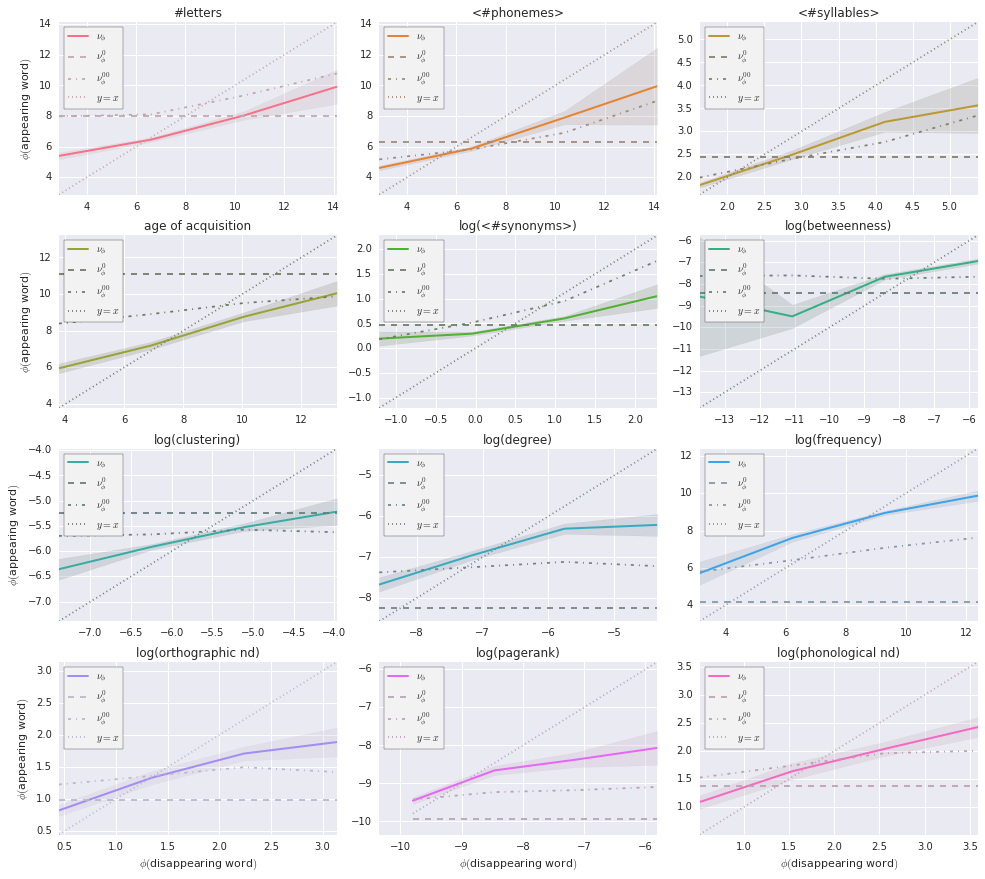

In [7]:
ordered_features = sorted(Substitution.__features__,
                          key=lambda f: Substitution._transformed_feature(f).__doc__)
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

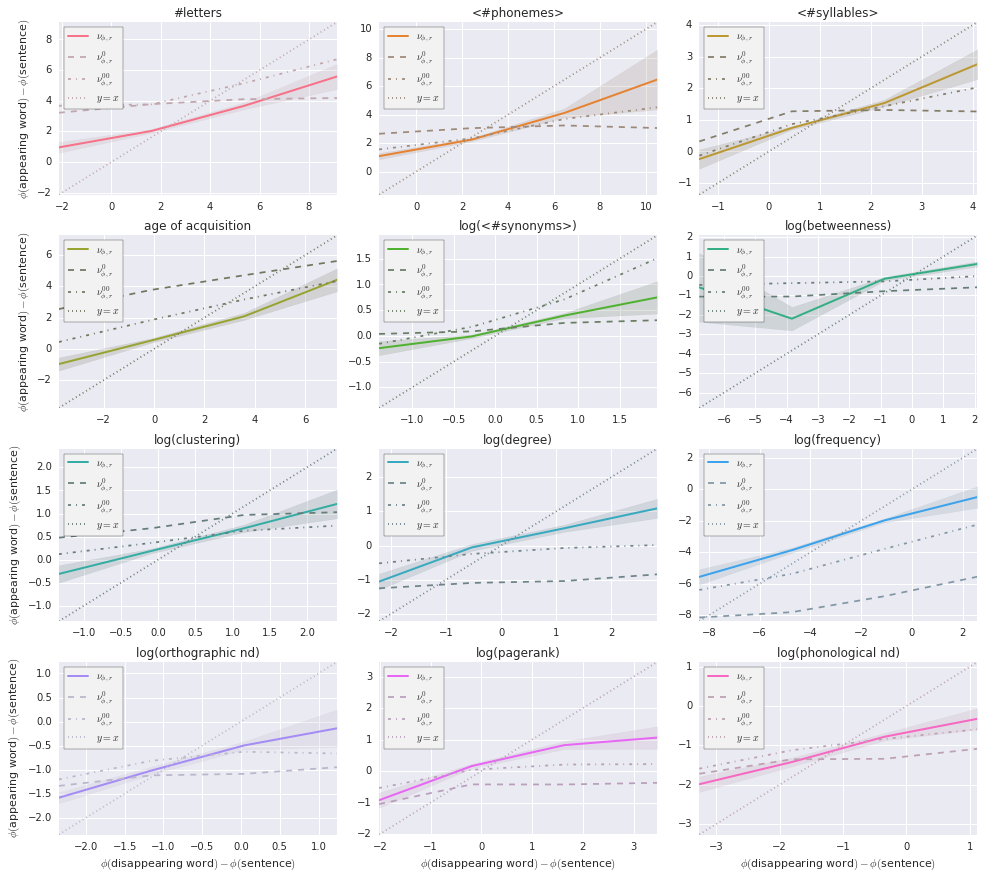

In [8]:
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Then plot $\nu_{\phi} - \nu_{\phi}^{00}$ for each feature (i.e. the measured bias) to see how they compare

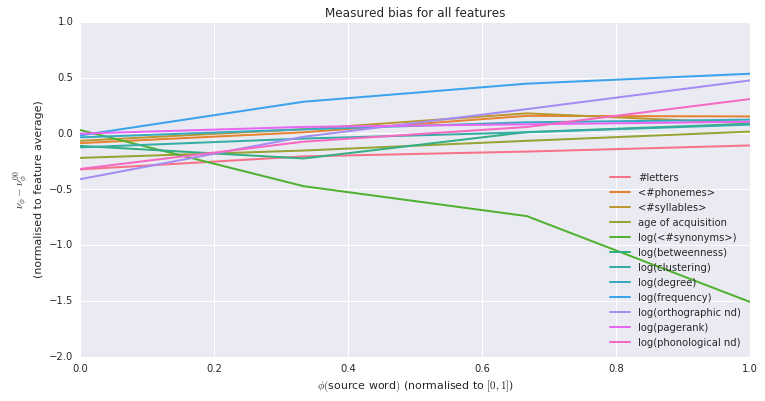

In [9]:
palette = sb.color_palette('husl', len(Substitution.__features__))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], ci=False)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

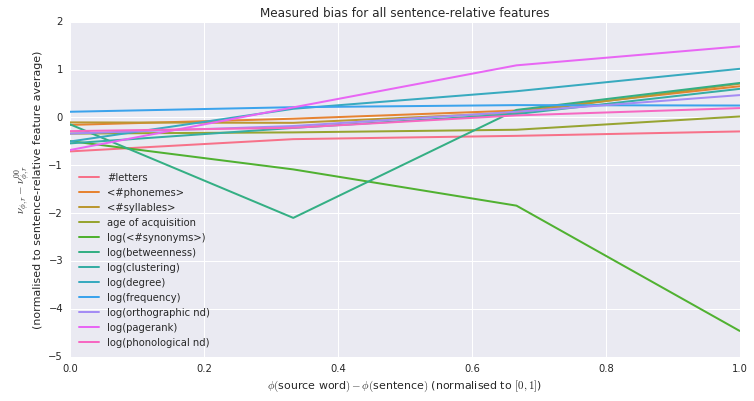

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], ci=False, relative=True)
ax.legend(loc='lower left')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

### 2.3 Feature variations, reduced to features we expose in the paper

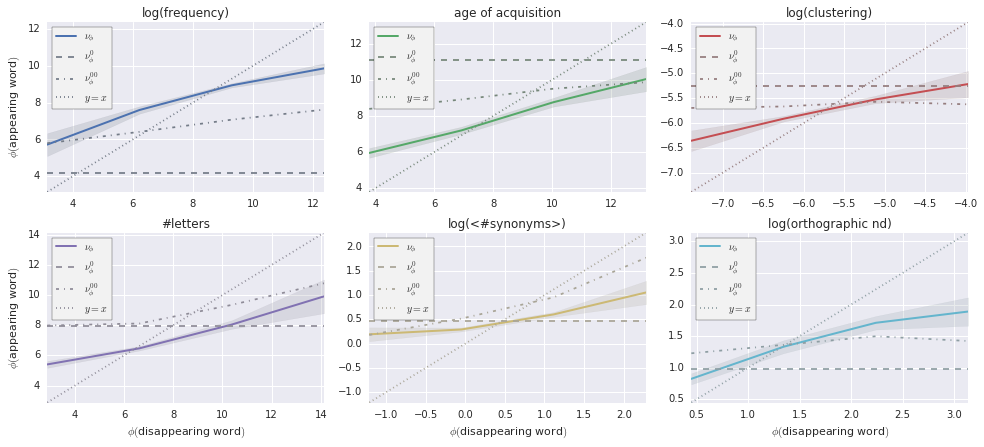

In [11]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

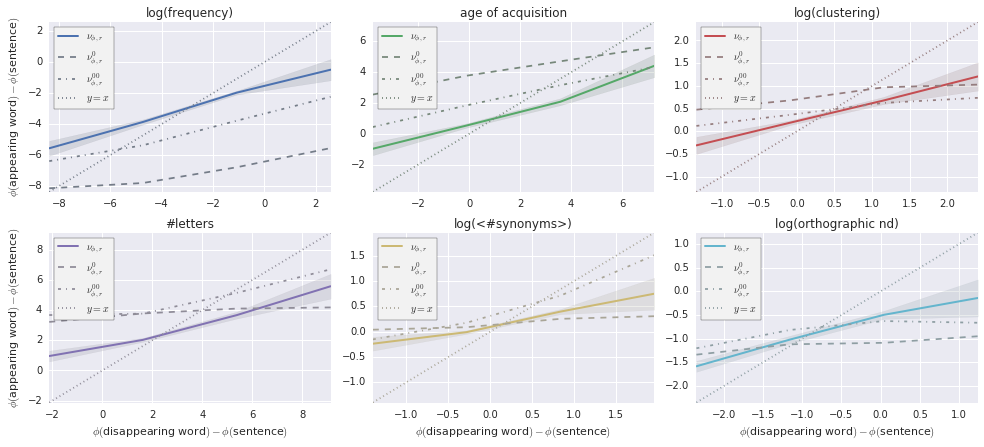

In [12]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Now $\nu_{\phi} - \nu_{\phi}^{00}$

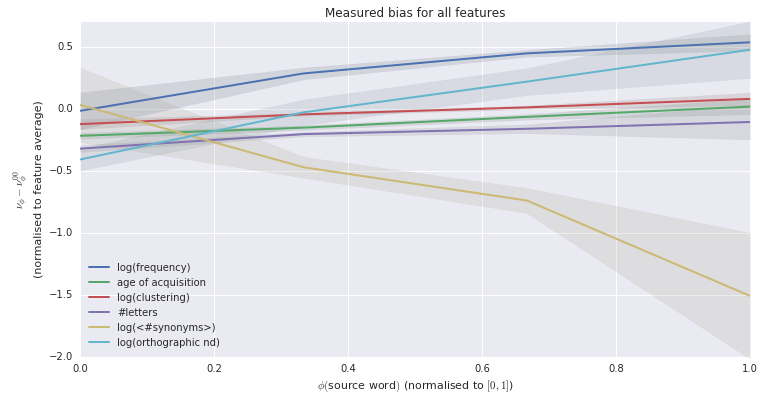

In [13]:
palette = sb.color_palette('deep', len(PAPER_FEATURES))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j])
ax.legend(loc='lower left')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

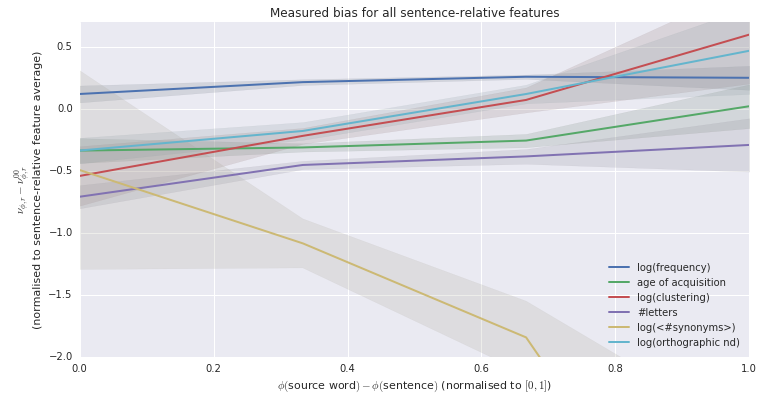

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], relative=True)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

## 3 Streamplots

We'd like to see what happens between absolute and relative feature values, i.e. how do their effects interact. Especially, we want to know who wins between cognitive bias, attraction to sentence average, or attraction to global feature average.

To do this we plot the general direction (arrows) and strength (color) of where destination words are given a particular absolute/relative source feature couple. I.e., for a given absolute feature value and relative feature value, if this word were to be substituted, where would it go in this (absolute, relative) space?

The interesting thing in these plots is the attraction front, where all arrows point to and join. We're interested in:
* its slope
* its shape (e.g. several slope regimes?)
* its position w.r.t. $\nu_{\phi}^0$ and $y = 0$ (which is $\left< \phi(sentence) \right>$)

First, here's our plotting function. (Note we set the arrow size to something that turns out to be huge here, but gives normal sizes in the figures saves. There must be some dpi scaling problem with the arrows.)

In [15]:
def plot_stream(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    source = data['source']
    source_rel = data['source_rel']
    dest = data['destination']
    dest_rel = data['destination_rel']
    h0 = data['h0']
    
    # Compute binning.
    bin_count = 4
    x_bins, x_margins = pd.cut(source, bin_count, right=False, labels=False, retbins=True)
    x_middles = (x_margins[:-1] + x_margins[1:]) / 2
    y_bins, y_margins = pd.cut(source_rel, bin_count, right=False, labels=False, retbins=True)
    y_middles = (y_margins[:-1] + y_margins[1:]) / 2
    
    # Compute bin values.
    h0s = np.ones(bin_count) * h0.iloc[0]
    u_values = np.zeros((bin_count, bin_count))
    v_values = np.zeros((bin_count, bin_count))
    strength = np.zeros((bin_count, bin_count))
    for x in range(bin_count):
        for y in range(bin_count):
            u_values[y, x] = (dest[(x_bins == x) & (y_bins == y)] -
                              source[(x_bins == x) & (y_bins == y)]).mean()
            v_values[y, x] = (dest_rel[(x_bins == x) & (y_bins == y)] -
                              source_rel[(x_bins == x) & (y_bins == y)]).mean()
            strength[y, x] = np.sqrt((dest[(x_bins == x) & (y_bins == y)] - 
                                      source[(x_bins == x) & (y_bins == y)]) ** 2 +
                                     (dest_rel[(x_bins == x) & (y_bins == y)] - 
                                      source_rel[(x_bins == x) & (y_bins == y)]) ** 2).mean()
    
    # Plot.
    plt.streamplot(x_middles, y_middles, u_values, v_values,
                   arrowsize=4, color=strength, cmap=plt.cm.viridis)
    plt.plot(x_middles, np.zeros(bin_count), linestyle='-',
             color=sb.desaturate(color, 0.2), label=r'$\left< \phi(sentence) \right>$')
    plt.plot(h0s, y_middles, linestyle='--',
             color=sb.desaturate(color, 0.2), label=r'$\nu_{\phi}^0$')
    plt.xlim(x_middles[0], x_middles[-1])
    plt.ylim(y_middles[0], y_middles[-1])

Here are the plots for all features

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


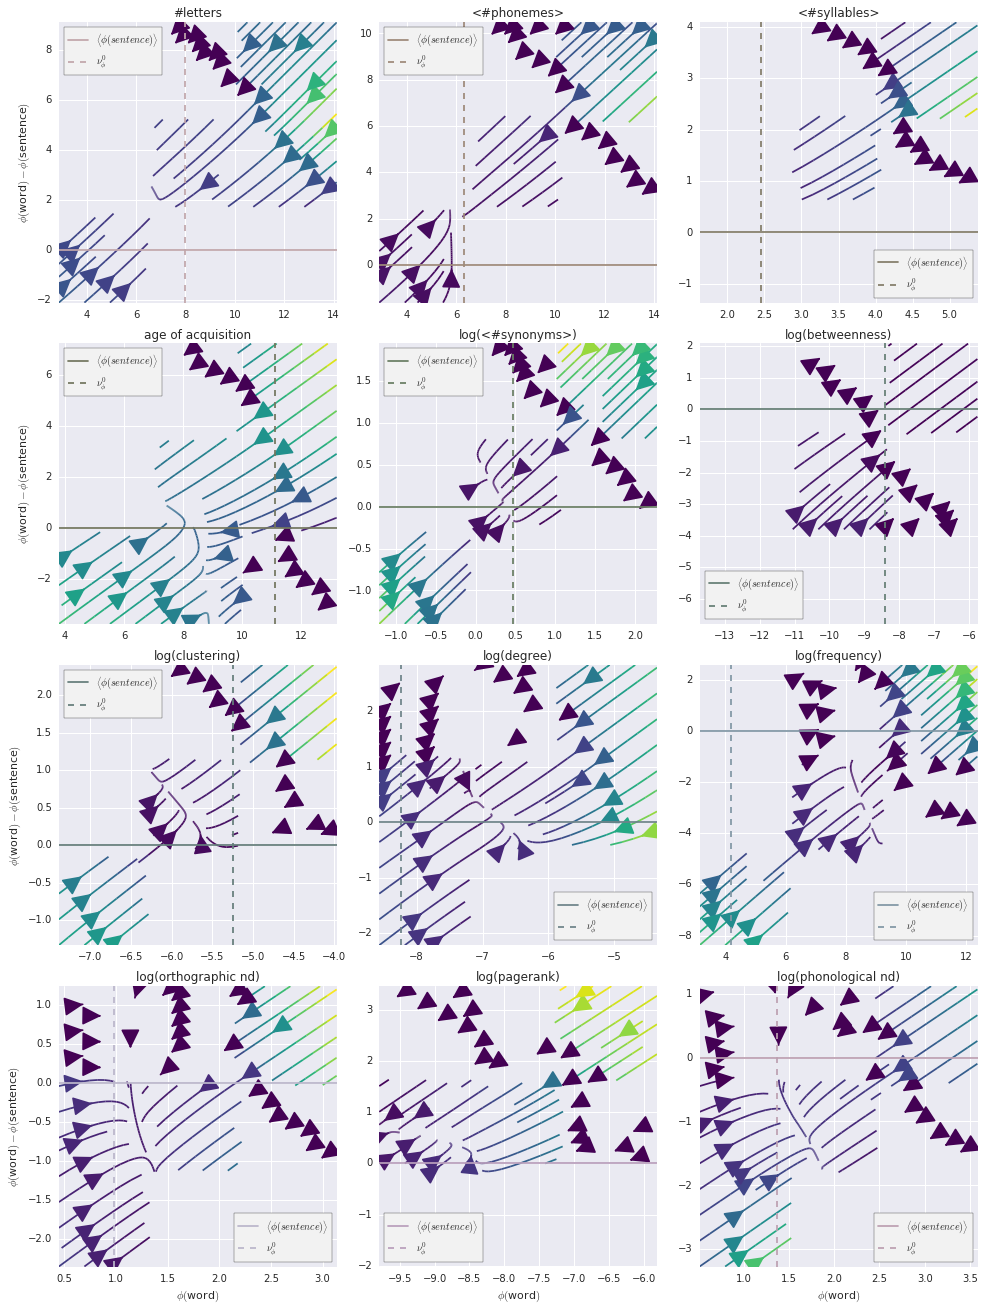

In [16]:
g = sb.FacetGrid(data=variations,
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_streams'),
                  bbox_inches='tight', dpi=300)

And here are the plots for the features we expose in the paper

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


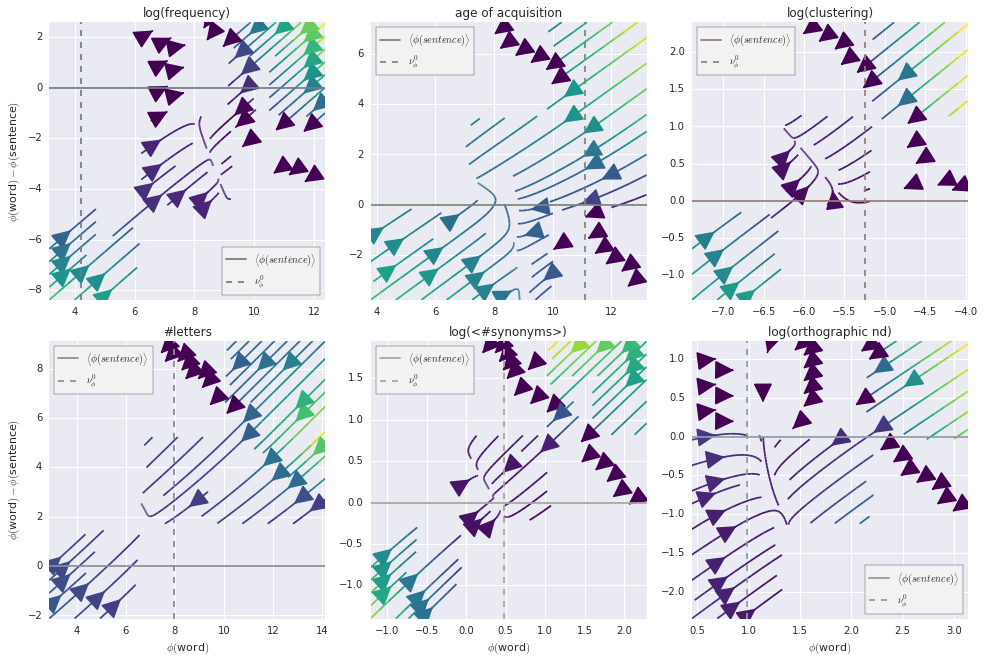

In [17]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_streams'),
                  bbox_inches='tight', dpi=300)

## 4 PCA'd feature variations

Compute PCA on feature *variations* (note: on variations, not on features directly), and show the evolution of the first three components upon substitution.

**CAVEAT**: the PCA is computed on variations where all features are defined. This greatly reduces the number of words included (and also the number of substitutions -- see below for real values, but you should know it's drastic). This also has an effect on the computation of $\mathcal{H}_0$ and $\mathcal{H}_{00}$, which are computed using words for which all features are defined. This, again, hugely reduces the number of words taken into account.

### 4.1 On all the features

Compute the actual PCA

In [18]:
# Compute the PCA.
pcafeatures = tuple(sorted(Substitution.__features__))
pcavariations = variations.pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 10 components.

Those explain the following variance:
[ 0.55264345  0.17271177  0.0726482   0.06796135  0.03322454  0.02741942
  0.01960907  0.01740151  0.01534183  0.00877085]

We're plotting variation for the first 3 components:


,aoa,betweenness,clustering,degree,frequency,letters_count,orthographic_density,pagerank,phonemes_count,phonological_density,syllables_count,synonyms_count
Component-0,-0.488539,0.219155,-0.071526,0.217879,0.213842,-0.460603,0.200329,0.244732,-0.440310,0.276645,-0.179641,0.011316
Component-1,-0.410994,0.362614,-0.142115,0.300890,0.275481,0.413221,-0.122763,0.285485,0.430670,-0.185992,0.158874,-0.018437
Component-2,-0.463187,-0.608064,0.088656,-0.261233,0.504349,0.082967,-0.029058,-0.270883,0.017147,-0.048602,0.035903,0.013954


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [19]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (    1 of 67981) |          | Elapsed Time: 0:01:27 ETA:  68 days, 15:10:35

  0% (   29 of 67981) |                    | Elapsed Time: 0:01:28 ETA:  0:39:15

  0% (  125 of 67981) |                    | Elapsed Time: 0:01:29 ETA:  0:16:51

  0% (  193 of 67981) |                    | Elapsed Time: 0:01:30 ETA:  0:16:16

  0% (  286 of 67981) |                    | Elapsed Time: 0:01:31 ETA:  0:14:26

  0% (  393 of 67981) |                    | Elapsed Time: 0:01:32 ETA:  0:12:58

  0% (  503 of 67981) |                    | Elapsed Time: 0:01:33 ETA:  0:12:02

  0% (  605 of 67981) |                    | Elapsed Time: 0:01:34 ETA:  0:11:36

  1% (  717 of 67981) |                    | Elapsed Time: 0:01:35 ETA:  0:11:07

  1% (  850 of 67981) |                    | Elapsed Time: 0:01:36 ETA:  0:09:38

  1% (  959 of 67981) |                    | Elapsed Time: 0:01:37 ETA:  0:09:27

  1% ( 1069 of 67981) |                    | Elapsed Time: 0:01:38 ETA:  0:08:55

  1% ( 1180 of 67981) |                    | Elapsed Time: 0:01:39 ETA:  0:08:42

  1% ( 1292 of 67981) |                    | Elapsed Time: 0:01:40 ETA:  0:08:37

  2% ( 1405 of 67981) |                    | Elapsed Time: 0:01:41 ETA:  0:08:34

  2% ( 1518 of 67981) |                    | Elapsed Time: 0:01:42 ETA:  0:08:25

  2% ( 1623 of 67981) |                    | Elapsed Time: 0:01:43 ETA:  0:08:30

  2% ( 1700 of 67981) |                    | Elapsed Time: 0:01:44 ETA:  0:08:29

  2% ( 1808 of 67981) |                    | Elapsed Time: 0:01:45 ETA:  0:08:30

  2% ( 1928 of 67981) |                    | Elapsed Time: 0:01:46 ETA:  0:08:22

  3% ( 2045 of 67981) |                    | Elapsed Time: 0:01:47 ETA:  0:08:16

  3% ( 2163 of 67981) |                    | Elapsed Time: 0:01:48 ETA:  0:08:10

  3% ( 2283 of 67981) |                    | Elapsed Time: 0:01:49 ETA:  0:08:05

  3% ( 2403 of 67981) |                    | Elapsed Time: 0:01:50 ETA:  0:08:07

  3% ( 2515 of 67981) |                    | Elapsed Time: 0:01:51 ETA:  0:08:06

  3% ( 2550 of 67981) |                    | Elapsed Time: 0:01:51 ETA:  0:08:02

  3% ( 2663 of 67981) |                    | Elapsed Time: 0:01:52 ETA:  0:08:08

  4% ( 2776 of 67981) |                    | Elapsed Time: 0:01:53 ETA:  0:08:04

  4% ( 2876 of 67981) |                    | Elapsed Time: 0:01:55 ETA:  0:09:12

  4% ( 2965 of 67981) |                    | Elapsed Time: 0:01:57 ETA:  0:10:25

  4% ( 3104 of 67981) |                    | Elapsed Time: 0:01:58 ETA:  0:10:08

  4% ( 3228 of 67981) |                    | Elapsed Time: 0:01:59 ETA:  0:10:03

  4% ( 3365 of 67981) |                    | Elapsed Time: 0:02:00 ETA:  0:09:42

  5% ( 3400 of 67981) |#                   | Elapsed Time: 0:02:00 ETA:  0:09:45

  5% ( 3507 of 67981) |#                   | Elapsed Time: 0:02:01 ETA:  0:09:38

  5% ( 3627 of 67981) |#                   | Elapsed Time: 0:02:02 ETA:  0:09:30

  5% ( 3752 of 67981) |#                   | Elapsed Time: 0:02:03 ETA:  0:09:20

  5% ( 3875 of 67981) |#                   | Elapsed Time: 0:02:04 ETA:  0:08:09

  5% ( 3992 of 67981) |#                   | Elapsed Time: 0:02:05 ETA:  0:07:03

  6% ( 4119 of 67981) |#                   | Elapsed Time: 0:02:06 ETA:  0:07:16

  6% ( 4219 of 67981) |#                   | Elapsed Time: 0:02:07 ETA:  0:07:29

  6% ( 4249 of 67981) |#                   | Elapsed Time: 0:02:08 ETA:  0:08:05

  6% ( 4309 of 67981) |#                   | Elapsed Time: 0:02:09 ETA:  0:08:43

  6% ( 4365 of 67981) |#                   | Elapsed Time: 0:02:10 ETA:  0:09:21

  6% ( 4422 of 67981) |#                   | Elapsed Time: 0:02:11 ETA:  0:10:15

  6% ( 4476 of 67981) |#                   | Elapsed Time: 0:02:12 ETA:  0:11:27

  6% ( 4535 of 67981) |#                   | Elapsed Time: 0:02:13 ETA:  0:12:50

  6% ( 4599 of 67981) |#                   | Elapsed Time: 0:02:14 ETA:  0:14:09

  6% ( 4657 of 67981) |#                   | Elapsed Time: 0:02:15 ETA:  0:15:59

  7% ( 4760 of 67981) |#                   | Elapsed Time: 0:02:16 ETA:  0:15:51

  7% ( 4873 of 67981) |#                   | Elapsed Time: 0:02:17 ETA:  0:14:14

  7% ( 4977 of 67981) |#                   | Elapsed Time: 0:02:18 ETA:  0:13:07

  7% ( 5099 of 67981) |#                   | Elapsed Time: 0:02:19 ETA:  0:11:17

  7% ( 5206 of 67981) |#                   | Elapsed Time: 0:02:20 ETA:  0:10:17

  7% ( 5255 of 67981) |#                   | Elapsed Time: 0:02:21 ETA:  0:11:08

  7% ( 5263 of 67981) |#                   | Elapsed Time: 0:02:23 ETA:  0:12:57

  7% ( 5281 of 67981) |#                   | Elapsed Time: 0:02:24 ETA:  0:14:03

  7% ( 5284 of 67981) |#                   | Elapsed Time: 0:02:25 ETA:  0:17:19

  7% ( 5314 of 67981) |#                   | Elapsed Time: 0:02:26 ETA:  0:21:46

  7% ( 5315 of 67981) |#                   | Elapsed Time: 0:02:27 ETA:  0:29:15

  7% ( 5416 of 67981) |#                   | Elapsed Time: 0:02:28 ETA:  0:30:43

  8% ( 5538 of 67981) |#                   | Elapsed Time: 0:02:29 ETA:  0:24:23

  8% ( 5651 of 67981) |#                   | Elapsed Time: 0:02:30 ETA:  0:23:59

  8% ( 5765 of 67981) |#                   | Elapsed Time: 0:02:31 ETA:  0:19:31

  8% ( 5883 of 67981) |#                   | Elapsed Time: 0:02:32 ETA:  0:14:51

  8% ( 5949 of 67981) |#                   | Elapsed Time: 0:02:33 ETA:  0:12:51

  8% ( 6055 of 67981) |#                   | Elapsed Time: 0:02:34 ETA:  0:10:40

  9% ( 6169 of 67981) |#                   | Elapsed Time: 0:02:35 ETA:  0:08:57

  9% ( 6272 of 67981) |#                   | Elapsed Time: 0:02:36 ETA:  0:07:40

  9% ( 6391 of 67981) |#                   | Elapsed Time: 0:02:37 ETA:  0:07:27

  9% ( 6511 of 67981) |#                   | Elapsed Time: 0:02:38 ETA:  0:07:28

  9% ( 6614 of 67981) |#                   | Elapsed Time: 0:02:39 ETA:  0:07:34

  9% ( 6731 of 67981) |#                   | Elapsed Time: 0:02:40 ETA:  0:07:31

 10% ( 6799 of 67981) |##                  | Elapsed Time: 0:02:41 ETA:  0:07:59

 10% ( 6887 of 67981) |##                  | Elapsed Time: 0:02:42 ETA:  0:08:10

 10% ( 6972 of 67981) |##                  | Elapsed Time: 0:02:43 ETA:  0:08:24

 10% ( 7024 of 67981) |##                  | Elapsed Time: 0:02:44 ETA:  0:09:13

 10% ( 7067 of 67981) |##                  | Elapsed Time: 0:02:45 ETA:  0:10:07

 10% ( 7127 of 67981) |##                  | Elapsed Time: 0:02:46 ETA:  0:11:07

 10% ( 7226 of 67981) |##                  | Elapsed Time: 0:02:47 ETA:  0:11:45

 10% ( 7262 of 67981) |##                  | Elapsed Time: 0:02:49 ETA:  0:14:12

 10% ( 7291 of 67981) |##                  | Elapsed Time: 0:02:50 ETA:  0:18:05

 10% ( 7387 of 67981) |##                  | Elapsed Time: 0:02:51 ETA:  0:17:09

 11% ( 7505 of 67981) |##                  | Elapsed Time: 0:02:52 ETA:  0:16:08

 11% ( 7620 of 67981) |##                  | Elapsed Time: 0:02:53 ETA:  0:15:15

 11% ( 7648 of 67981) |##                  | Elapsed Time: 0:02:53 ETA:  0:14:30

 11% ( 7765 of 67981) |##                  | Elapsed Time: 0:02:54 ETA:  0:12:38

 11% ( 7868 of 67981) |##                  | Elapsed Time: 0:02:55 ETA:  0:11:43

 11% ( 7915 of 67981) |##                  | Elapsed Time: 0:02:57 ETA:  0:12:35

 11% ( 7973 of 67981) |##                  | Elapsed Time: 0:02:58 ETA:  0:11:13

 11% ( 8044 of 67981) |##                  | Elapsed Time: 0:02:59 ETA:  0:09:29

 11% ( 8143 of 67981) |##                  | Elapsed Time: 0:03:00 ETA:  0:09:25

 12% ( 8235 of 67981) |##                  | Elapsed Time: 0:03:01 ETA:  0:09:51

 12% ( 8322 of 67981) |##                  | Elapsed Time: 0:03:02 ETA:  0:10:21

 12% ( 8436 of 67981) |##                  | Elapsed Time: 0:03:03 ETA:  0:10:03

 12% ( 8498 of 67981) |##                  | Elapsed Time: 0:03:03 ETA:  0:10:04

 12% ( 8636 of 67981) |##                  | Elapsed Time: 0:03:04 ETA:  0:09:27

 12% ( 8739 of 67981) |##                  | Elapsed Time: 0:03:05 ETA:  0:08:33

 12% ( 8827 of 67981) |##                  | Elapsed Time: 0:03:06 ETA:  0:08:07

 12% ( 8831 of 67981) |##                  | Elapsed Time: 0:03:07 ETA:  0:09:08

 13% ( 8917 of 67981) |##                  | Elapsed Time: 0:03:08 ETA:  0:09:19

 13% ( 9008 of 67981) |##                  | Elapsed Time: 0:03:09 ETA:  0:09:19

 13% ( 9096 of 67981) |##                  | Elapsed Time: 0:03:10 ETA:  0:09:17

 13% ( 9179 of 67981) |##                  | Elapsed Time: 0:03:11 ETA:  0:09:44

 13% ( 9266 of 67981) |##                  | Elapsed Time: 0:03:12 ETA:  0:10:12

 13% ( 9348 of 67981) |##                  | Elapsed Time: 0:03:13 ETA:  0:11:05

 13% ( 9436 of 67981) |##                  | Elapsed Time: 0:03:14 ETA:  0:11:22

 14% ( 9523 of 67981) |##                  | Elapsed Time: 0:03:15 ETA:  0:11:22

 14% ( 9615 of 67981) |##                  | Elapsed Time: 0:03:16 ETA:  0:09:38

 14% ( 9704 of 67981) |##                  | Elapsed Time: 0:03:17 ETA:  0:09:34

 14% ( 9785 of 67981) |##                  | Elapsed Time: 0:03:18 ETA:  0:09:43

 14% ( 9869 of 67981) |##                  | Elapsed Time: 0:03:19 ETA:  0:09:46

 14% ( 9966 of 67981) |##                  | Elapsed Time: 0:03:20 ETA:  0:09:31

 14% (10062 of 67981) |##                  | Elapsed Time: 0:03:21 ETA:  0:09:22

 14% (10152 of 67981) |##                  | Elapsed Time: 0:03:22 ETA:  0:09:21

 15% (10198 of 67981) |###                 | Elapsed Time: 0:03:23 ETA:  0:09:17

 15% (10281 of 67981) |###                 | Elapsed Time: 0:03:24 ETA:  0:09:20

 15% (10374 of 67981) |###                 | Elapsed Time: 0:03:25 ETA:  0:09:18

 15% (10467 of 67981) |###                 | Elapsed Time: 0:03:26 ETA:  0:09:13

 15% (10552 of 67981) |###                 | Elapsed Time: 0:03:27 ETA:  0:09:09

 15% (10647 of 67981) |###                 | Elapsed Time: 0:03:28 ETA:  0:08:57

 15% (10741 of 67981) |###                 | Elapsed Time: 0:03:29 ETA:  0:08:58

 15% (10831 of 67981) |###                 | Elapsed Time: 0:03:30 ETA:  0:09:03

 16% (10920 of 67981) |###                 | Elapsed Time: 0:03:31 ETA:  0:09:04

 16% (11014 of 67981) |###                 | Elapsed Time: 0:03:32 ETA:  0:09:02

 16% (11047 of 67981) |###                 | Elapsed Time: 0:03:32 ETA:  0:09:04

 16% (11133 of 67981) |###                 | Elapsed Time: 0:03:33 ETA:  0:09:09

 16% (11222 of 67981) |###                 | Elapsed Time: 0:03:34 ETA:  0:09:13

 16% (11307 of 67981) |###                 | Elapsed Time: 0:03:35 ETA:  0:09:12

 16% (11402 of 67981) |###                 | Elapsed Time: 0:03:36 ETA:  0:09:11

 16% (11483 of 67981) |###                 | Elapsed Time: 0:03:37 ETA:  0:09:25

 17% (11566 of 67981) |###                 | Elapsed Time: 0:03:38 ETA:  0:09:31

 17% (11647 of 67981) |###                 | Elapsed Time: 0:03:39 ETA:  0:09:41

 17% (11738 of 67981) |###                 | Elapsed Time: 0:03:40 ETA:  0:09:43

 17% (11822 of 67981) |###                 | Elapsed Time: 0:03:41 ETA:  0:09:36

 17% (11897 of 67981) |###                 | Elapsed Time: 0:03:42 ETA:  0:09:57

 17% (11979 of 67981) |###                 | Elapsed Time: 0:03:43 ETA:  0:10:00

 17% (12089 of 67981) |###                 | Elapsed Time: 0:03:44 ETA:  0:09:41

 17% (12196 of 67981) |###                 | Elapsed Time: 0:03:45 ETA:  0:09:09

 18% (12296 of 67981) |###                 | Elapsed Time: 0:03:46 ETA:  0:08:50

 18% (12369 of 67981) |###                 | Elapsed Time: 0:03:47 ETA:  0:08:55

 18% (12482 of 67981) |###                 | Elapsed Time: 0:03:48 ETA:  0:08:31

 18% (12591 of 67981) |###                 | Elapsed Time: 0:03:49 ETA:  0:08:06

 18% (12703 of 67981) |###                 | Elapsed Time: 0:03:50 ETA:  0:07:27

 18% (12747 of 67981) |###                 | Elapsed Time: 0:03:51 ETA:  0:07:23

 18% (12863 of 67981) |###                 | Elapsed Time: 0:03:52 ETA:  0:06:57

 19% (12965 of 67981) |###                 | Elapsed Time: 0:03:53 ETA:  0:07:02

 19% (13081 of 67981) |###                 | Elapsed Time: 0:03:54 ETA:  0:07:03

 19% (13182 of 67981) |###                 | Elapsed Time: 0:03:55 ETA:  0:07:01

 19% (13278 of 67981) |###                 | Elapsed Time: 0:03:56 ETA:  0:06:43

 19% (13361 of 67981) |###                 | Elapsed Time: 0:03:57 ETA:  0:07:04

 19% (13465 of 67981) |###                 | Elapsed Time: 0:03:58 ETA:  0:07:07

 19% (13549 of 67981) |###                 | Elapsed Time: 0:03:59 ETA:  0:07:30

 20% (13597 of 67981) |####                | Elapsed Time: 0:03:59 ETA:  0:07:28

 20% (13696 of 67981) |####                | Elapsed Time: 0:04:00 ETA:  0:07:41

 20% (13804 of 67981) |####                | Elapsed Time: 0:04:01 ETA:  0:07:35

 20% (13907 of 67981) |####                | Elapsed Time: 0:04:02 ETA:  0:07:35

 20% (14004 of 67981) |####                | Elapsed Time: 0:04:03 ETA:  0:07:38

 20% (14107 of 67981) |####                | Elapsed Time: 0:04:04 ETA:  0:07:31

 20% (14214 of 67981) |####                | Elapsed Time: 0:04:05 ETA:  0:07:11

 21% (14320 of 67981) |####                | Elapsed Time: 0:04:06 ETA:  0:07:08

 21% (14446 of 67981) |####                | Elapsed Time: 0:04:07 ETA:  0:06:50

 21% (14538 of 67981) |####                | Elapsed Time: 0:04:08 ETA:  0:06:54

 21% (14629 of 67981) |####                | Elapsed Time: 0:04:09 ETA:  0:07:06

 21% (14716 of 67981) |####                | Elapsed Time: 0:04:10 ETA:  0:07:19

 21% (14829 of 67981) |####                | Elapsed Time: 0:04:11 ETA:  0:07:04

 21% (14935 of 67981) |####                | Elapsed Time: 0:04:12 ETA:  0:07:01

 22% (15037 of 67981) |####                | Elapsed Time: 0:04:13 ETA:  0:07:04

 22% (15143 of 67981) |####                | Elapsed Time: 0:04:14 ETA:  0:07:03

 22% (15257 of 67981) |####                | Elapsed Time: 0:04:15 ETA:  0:06:56

 22% (15296 of 67981) |####                | Elapsed Time: 0:04:16 ETA:  0:06:52

 22% (15407 of 67981) |####                | Elapsed Time: 0:04:17 ETA:  0:06:36

 22% (15509 of 67981) |####                | Elapsed Time: 0:04:18 ETA:  0:06:27

 22% (15623 of 67981) |####                | Elapsed Time: 0:04:19 ETA:  0:06:07

 23% (15729 of 67981) |####                | Elapsed Time: 0:04:20 ETA:  0:06:11

 23% (15837 of 67981) |####                | Elapsed Time: 0:04:21 ETA:  0:06:09

 23% (15952 of 67981) |####                | Elapsed Time: 0:04:22 ETA:  0:05:59

 23% (16063 of 67981) |####                | Elapsed Time: 0:04:23 ETA:  0:05:54

 23% (16146 of 67981) |####                | Elapsed Time: 0:04:24 ETA:  0:06:06

 23% (16248 of 67981) |####                | Elapsed Time: 0:04:25 ETA:  0:06:12

 24% (16363 of 67981) |####                | Elapsed Time: 0:04:26 ETA:  0:06:09

 24% (16459 of 67981) |####                | Elapsed Time: 0:04:27 ETA:  0:06:12

 24% (16575 of 67981) |####                | Elapsed Time: 0:04:28 ETA:  0:06:10

 24% (16684 of 67981) |####                | Elapsed Time: 0:04:29 ETA:  0:06:07

 24% (16808 of 67981) |####                | Elapsed Time: 0:04:30 ETA:  0:05:55

 24% (16947 of 67981) |####                | Elapsed Time: 0:04:31 ETA:  0:05:38

 25% (16996 of 67981) |#####               | Elapsed Time: 0:04:31 ETA:  0:05:32

 25% (17122 of 67981) |#####               | Elapsed Time: 0:04:32 ETA:  0:05:13

 25% (17213 of 67981) |#####               | Elapsed Time: 0:04:33 ETA:  0:05:18

 25% (17358 of 67981) |#####               | Elapsed Time: 0:04:34 ETA:  0:04:59

 25% (17504 of 67981) |#####               | Elapsed Time: 0:04:35 ETA:  0:04:30

 25% (17604 of 67981) |#####               | Elapsed Time: 0:04:36 ETA:  0:04:38

 26% (17690 of 67981) |#####               | Elapsed Time: 0:04:37 ETA:  0:04:50

 26% (17776 of 67981) |#####               | Elapsed Time: 0:04:38 ETA:  0:05:11

 26% (17846 of 67981) |#####               | Elapsed Time: 0:04:39 ETA:  0:05:40

 26% (17955 of 67981) |#####               | Elapsed Time: 0:04:40 ETA:  0:05:45

 26% (18078 of 67981) |#####               | Elapsed Time: 0:04:41 ETA:  0:05:47

 26% (18200 of 67981) |#####               | Elapsed Time: 0:04:42 ETA:  0:05:26

 26% (18314 of 67981) |#####               | Elapsed Time: 0:04:43 ETA:  0:05:45

 27% (18430 of 67981) |#####               | Elapsed Time: 0:04:44 ETA:  0:06:04

 27% (18543 of 67981) |#####               | Elapsed Time: 0:04:45 ETA:  0:05:55

 27% (18650 of 67981) |#####               | Elapsed Time: 0:04:46 ETA:  0:05:39

 27% (18695 of 67981) |#####               | Elapsed Time: 0:04:47 ETA:  0:05:29

 27% (18794 of 67981) |#####               | Elapsed Time: 0:04:48 ETA:  0:05:24

 27% (18891 of 67981) |#####               | Elapsed Time: 0:04:49 ETA:  0:05:31

 27% (18986 of 67981) |#####               | Elapsed Time: 0:04:50 ETA:  0:05:49

 28% (19088 of 67981) |#####               | Elapsed Time: 0:04:51 ETA:  0:06:02

 28% (19231 of 67981) |#####               | Elapsed Time: 0:04:52 ETA:  0:05:40

 28% (19366 of 67981) |#####               | Elapsed Time: 0:04:53 ETA:  0:05:26

 28% (19470 of 67981) |#####               | Elapsed Time: 0:04:54 ETA:  0:05:31

 28% (19545 of 67981) |#####               | Elapsed Time: 0:04:54 ETA:  0:05:22

 28% (19654 of 67981) |#####               | Elapsed Time: 0:04:55 ETA:  0:05:16

 29% (19762 of 67981) |#####               | Elapsed Time: 0:04:56 ETA:  0:05:09

 29% (19870 of 67981) |#####               | Elapsed Time: 0:04:57 ETA:  0:05:01

 29% (19988 of 67981) |#####               | Elapsed Time: 0:04:58 ETA:  0:04:46

 29% (20104 of 67981) |#####               | Elapsed Time: 0:04:59 ETA:  0:04:37

 29% (20220 of 67981) |#####               | Elapsed Time: 0:05:00 ETA:  0:04:52

 29% (20334 of 67981) |#####               | Elapsed Time: 0:05:01 ETA:  0:05:04

 30% (20395 of 67981) |######              | Elapsed Time: 0:05:02 ETA:  0:04:53

 30% (20517 of 67981) |######              | Elapsed Time: 0:05:03 ETA:  0:04:52

 30% (20638 of 67981) |######              | Elapsed Time: 0:05:04 ETA:  0:04:44

 30% (20754 of 67981) |######              | Elapsed Time: 0:05:05 ETA:  0:04:38

 30% (20870 of 67981) |######              | Elapsed Time: 0:05:06 ETA:  0:04:32

 30% (20976 of 67981) |######              | Elapsed Time: 0:05:07 ETA:  0:04:38

 31% (21078 of 67981) |######              | Elapsed Time: 0:05:08 ETA:  0:04:46

 31% (21245 of 67981) |######              | Elapsed Time: 0:05:09 ETA:  0:04:24

 31% (21390 of 67981) |######              | Elapsed Time: 0:05:10 ETA:  0:04:11

 31% (21523 of 67981) |######              | Elapsed Time: 0:05:11 ETA:  0:04:03

 31% (21636 of 67981) |######              | Elapsed Time: 0:05:12 ETA:  0:04:06

 31% (21744 of 67981) |######              | Elapsed Time: 0:05:13 ETA:  0:04:10

 32% (21883 of 67981) |######              | Elapsed Time: 0:05:14 ETA:  0:03:56

 32% (21973 of 67981) |######              | Elapsed Time: 0:05:16 ETA:  0:04:52

 32% (22094 of 67981) |######              | Elapsed Time: 0:05:17 ETA:  0:05:09

 32% (22205 of 67981) |######              | Elapsed Time: 0:05:18 ETA:  0:05:11

 32% (22337 of 67981) |######              | Elapsed Time: 0:05:19 ETA:  0:05:20

 33% (22491 of 67981) |######              | Elapsed Time: 0:05:20 ETA:  0:05:05

 33% (22641 of 67981) |######              | Elapsed Time: 0:05:21 ETA:  0:04:41

 33% (22792 of 67981) |######              | Elapsed Time: 0:05:22 ETA:  0:04:15

 33% (22944 of 67981) |######              | Elapsed Time: 0:05:23 ETA:  0:03:07

 33% (23073 of 67981) |######              | Elapsed Time: 0:05:24 ETA:  0:02:51

 34% (23188 of 67981) |######              | Elapsed Time: 0:05:25 ETA:  0:03:01

 34% (23307 of 67981) |######              | Elapsed Time: 0:05:26 ETA:  0:02:57

 34% (23371 of 67981) |######              | Elapsed Time: 0:05:27 ETA:  0:03:53

 34% (23429 of 67981) |######              | Elapsed Time: 0:05:29 ETA:  0:05:32

 34% (23481 of 67981) |######              | Elapsed Time: 0:05:30 ETA:  0:07:15

 34% (23581 of 67981) |######              | Elapsed Time: 0:05:31 ETA:  0:08:03

 34% (23702 of 67981) |######              | Elapsed Time: 0:05:32 ETA:  0:08:18

 35% (23794 of 67981) |#######             | Elapsed Time: 0:05:33 ETA:  0:09:21

 35% (23865 of 67981) |#######             | Elapsed Time: 0:05:34 ETA:  0:10:18

 35% (23971 of 67981) |#######             | Elapsed Time: 0:05:35 ETA:  0:10:35

 35% (24062 of 67981) |#######             | Elapsed Time: 0:05:36 ETA:  0:09:19

 35% (24146 of 67981) |#######             | Elapsed Time: 0:05:37 ETA:  0:07:48

 35% (24234 of 67981) |#######             | Elapsed Time: 0:05:38 ETA:  0:06:39

 35% (24355 of 67981) |#######             | Elapsed Time: 0:05:39 ETA:  0:06:18

 36% (24478 of 67981) |#######             | Elapsed Time: 0:05:40 ETA:  0:06:15

 36% (24529 of 67981) |#######             | Elapsed Time: 0:05:41 ETA:  0:06:46

 36% (24644 of 67981) |#######             | Elapsed Time: 0:05:43 ETA:  0:06:04

 36% (24735 of 67981) |#######             | Elapsed Time: 0:05:44 ETA:  0:06:17

 36% (24834 of 67981) |#######             | Elapsed Time: 0:05:45 ETA:  0:06:08

 36% (24924 of 67981) |#######             | Elapsed Time: 0:05:46 ETA:  0:06:02

 36% (25048 of 67981) |#######             | Elapsed Time: 0:05:47 ETA:  0:05:29

 37% (25177 of 67981) |#######             | Elapsed Time: 0:05:48 ETA:  0:05:22

 37% (25214 of 67981) |#######             | Elapsed Time: 0:05:49 ETA:  0:06:48

 37% (25303 of 67981) |#######             | Elapsed Time: 0:05:50 ETA:  0:06:09

 37% (25390 of 67981) |#######             | Elapsed Time: 0:05:51 ETA:  0:06:29

 37% (25493 of 67981) |#######             | Elapsed Time: 0:05:52 ETA:  0:06:18

 37% (25634 of 67981) |#######             | Elapsed Time: 0:05:53 ETA:  0:05:37

 37% (25732 of 67981) |#######             | Elapsed Time: 0:05:54 ETA:  0:05:47

 37% (25769 of 67981) |#######             | Elapsed Time: 0:05:55 ETA:  0:07:24

 37% (25824 of 67981) |#######             | Elapsed Time: 0:05:56 ETA:  0:08:35

 38% (25898 of 67981) |#######             | Elapsed Time: 0:05:58 ETA:  0:10:36

 38% (25907 of 67981) |#######             | Elapsed Time: 0:05:59 ETA:  0:11:19

 38% (25919 of 67981) |#######             | Elapsed Time: 0:06:00 ETA:  0:13:57

 38% (26057 of 67981) |#######             | Elapsed Time: 0:06:01 ETA:  0:12:23

 38% (26163 of 67981) |#######             | Elapsed Time: 0:06:03 ETA:  0:12:18

 38% (26253 of 67981) |#######             | Elapsed Time: 0:06:04 ETA:  0:13:48

 38% (26343 of 67981) |#######             | Elapsed Time: 0:06:05 ETA:  0:11:57

 38% (26426 of 67981) |#######             | Elapsed Time: 0:06:06 ETA:  0:11:05

 39% (26549 of 67981) |#######             | Elapsed Time: 0:06:07 ETA:  0:08:43

 39% (26661 of 67981) |#######             | Elapsed Time: 0:06:08 ETA:  0:06:29

 39% (26778 of 67981) |#######             | Elapsed Time: 0:06:09 ETA:  0:04:34

 39% (26902 of 67981) |#######             | Elapsed Time: 0:06:10 ETA:  0:04:44

 39% (27052 of 67981) |#######             | Elapsed Time: 0:06:11 ETA:  0:04:10

 40% (27193 of 67981) |########            | Elapsed Time: 0:06:12 ETA:  0:03:34

 40% (27342 of 67981) |########            | Elapsed Time: 0:06:13 ETA:  0:02:53

 40% (27478 of 67981) |########            | Elapsed Time: 0:06:14 ETA:  0:02:45

 40% (27605 of 67981) |########            | Elapsed Time: 0:06:15 ETA:  0:02:24

 40% (27726 of 67981) |########            | Elapsed Time: 0:06:16 ETA:  0:02:24

 40% (27848 of 67981) |########            | Elapsed Time: 0:06:17 ETA:  0:02:19

 41% (27967 of 67981) |########            | Elapsed Time: 0:06:18 ETA:  0:02:17

 41% (28043 of 67981) |########            | Elapsed Time: 0:06:18 ETA:  0:02:16

 41% (28142 of 67981) |########            | Elapsed Time: 0:06:19 ETA:  0:02:39

 41% (28243 of 67981) |########            | Elapsed Time: 0:06:20 ETA:  0:03:00

 41% (28370 of 67981) |########            | Elapsed Time: 0:06:21 ETA:  0:03:11

 41% (28515 of 67981) |########            | Elapsed Time: 0:06:22 ETA:  0:03:05

 42% (28634 of 67981) |########            | Elapsed Time: 0:06:23 ETA:  0:03:08

 42% (28762 of 67981) |########            | Elapsed Time: 0:06:24 ETA:  0:03:03

 42% (28892 of 67981) |########            | Elapsed Time: 0:06:25 ETA:  0:02:58

 42% (29022 of 67981) |########            | Elapsed Time: 0:06:26 ETA:  0:02:52

 42% (29119 of 67981) |########            | Elapsed Time: 0:06:27 ETA:  0:02:52

 43% (29258 of 67981) |########            | Elapsed Time: 0:06:28 ETA:  0:02:30

 43% (29386 of 67981) |########            | Elapsed Time: 0:06:29 ETA:  0:02:28

 43% (29523 of 67981) |########            | Elapsed Time: 0:06:30 ETA:  0:02:32

 43% (29616 of 67981) |########            | Elapsed Time: 0:06:31 ETA:  0:02:45

 43% (29682 of 67981) |########            | Elapsed Time: 0:06:32 ETA:  0:03:22

 43% (29742 of 67981) |########            | Elapsed Time: 0:06:33 ETA:  0:03:39

 43% (29839 of 67981) |########            | Elapsed Time: 0:06:34 ETA:  0:03:48

 44% (29944 of 67981) |########            | Elapsed Time: 0:06:35 ETA:  0:04:03

 44% (30080 of 67981) |########            | Elapsed Time: 0:06:36 ETA:  0:03:36

 44% (30207 of 67981) |########            | Elapsed Time: 0:06:37 ETA:  0:03:43

 44% (30330 of 67981) |########            | Elapsed Time: 0:06:38 ETA:  0:03:46

 44% (30465 of 67981) |########            | Elapsed Time: 0:06:39 ETA:  0:03:46

 45% (30592 of 67981) |#########           | Elapsed Time: 0:06:40 ETA:  0:03:17

 45% (30727 of 67981) |#########           | Elapsed Time: 0:06:41 ETA:  0:02:37

 45% (30843 of 67981) |#########           | Elapsed Time: 0:06:42 ETA:  0:02:30

 45% (30971 of 67981) |#########           | Elapsed Time: 0:06:43 ETA:  0:02:14

 45% (31076 of 67981) |#########           | Elapsed Time: 0:06:44 ETA:  0:02:13

 45% (31191 of 67981) |#########           | Elapsed Time: 0:06:45 ETA:  0:02:22

 46% (31313 of 67981) |#########           | Elapsed Time: 0:06:46 ETA:  0:02:23

 46% (31442 of 67981) |#########           | Elapsed Time: 0:06:47 ETA:  0:02:27

 46% (31575 of 67981) |#########           | Elapsed Time: 0:06:48 ETA:  0:02:28

 46% (31700 of 67981) |#########           | Elapsed Time: 0:06:49 ETA:  0:02:33

 46% (31825 of 67981) |#########           | Elapsed Time: 0:06:50 ETA:  0:02:27

 46% (31935 of 67981) |#########           | Elapsed Time: 0:06:51 ETA:  0:02:36

 47% (32046 of 67981) |#########           | Elapsed Time: 0:06:52 ETA:  0:02:32

 47% (32171 of 67981) |#########           | Elapsed Time: 0:06:53 ETA:  0:02:25

 47% (32291 of 67981) |#########           | Elapsed Time: 0:06:54 ETA:  0:02:17

 47% (32438 of 67981) |#########           | Elapsed Time: 0:06:55 ETA:  0:02:04

 47% (32527 of 67981) |#########           | Elapsed Time: 0:06:56 ETA:  0:02:22

 47% (32622 of 67981) |#########           | Elapsed Time: 0:06:57 ETA:  0:02:41

 48% (32721 of 67981) |#########           | Elapsed Time: 0:06:58 ETA:  0:02:55

 48% (32852 of 67981) |#########           | Elapsed Time: 0:06:59 ETA:  0:02:50

 48% (32975 of 67981) |#########           | Elapsed Time: 0:07:00 ETA:  0:02:42

 48% (33043 of 67981) |#########           | Elapsed Time: 0:07:01 ETA:  0:03:06

 48% (33141 of 67981) |#########           | Elapsed Time: 0:07:02 ETA:  0:03:07

 48% (33272 of 67981) |#########           | Elapsed Time: 0:07:03 ETA:  0:03:07

 49% (33390 of 67981) |#########           | Elapsed Time: 0:07:04 ETA:  0:03:25

 49% (33496 of 67981) |#########           | Elapsed Time: 0:07:05 ETA:  0:03:13

 49% (33607 of 67981) |#########           | Elapsed Time: 0:07:06 ETA:  0:03:02

 49% (33718 of 67981) |#########           | Elapsed Time: 0:07:07 ETA:  0:02:54

 49% (33826 of 67981) |#########           | Elapsed Time: 0:07:08 ETA:  0:03:07

 49% (33940 of 67981) |#########           | Elapsed Time: 0:07:09 ETA:  0:03:12

 50% (33991 of 67981) |##########          | Elapsed Time: 0:07:09 ETA:  0:02:40

 50% (34118 of 67981) |##########          | Elapsed Time: 0:07:10 ETA:  0:02:37

 50% (34207 of 67981) |##########          | Elapsed Time: 0:07:11 ETA:  0:03:02

 50% (34301 of 67981) |##########          | Elapsed Time: 0:07:12 ETA:  0:03:16

 50% (34407 of 67981) |##########          | Elapsed Time: 0:07:13 ETA:  0:03:15

 50% (34519 of 67981) |##########          | Elapsed Time: 0:07:14 ETA:  0:03:14

 50% (34625 of 67981) |##########          | Elapsed Time: 0:07:15 ETA:  0:03:16

 51% (34744 of 67981) |##########          | Elapsed Time: 0:07:16 ETA:  0:03:07

 51% (34841 of 67981) |##########          | Elapsed Time: 0:07:17 ETA:  0:03:02

 51% (34973 of 67981) |##########          | Elapsed Time: 0:07:18 ETA:  0:02:52

 51% (35062 of 67981) |##########          | Elapsed Time: 0:07:19 ETA:  0:03:16

 51% (35159 of 67981) |##########          | Elapsed Time: 0:07:20 ETA:  0:03:10

 51% (35268 of 67981) |##########          | Elapsed Time: 0:07:21 ETA:  0:02:59

 52% (35378 of 67981) |##########          | Elapsed Time: 0:07:22 ETA:  0:02:55

 52% (35496 of 67981) |##########          | Elapsed Time: 0:07:23 ETA:  0:02:51

 52% (35605 of 67981) |##########          | Elapsed Time: 0:07:24 ETA:  0:02:48

 52% (35691 of 67981) |##########          | Elapsed Time: 0:07:25 ETA:  0:02:41

 52% (35816 of 67981) |##########          | Elapsed Time: 0:07:26 ETA:  0:02:37

 52% (35954 of 67981) |##########          | Elapsed Time: 0:07:27 ETA:  0:02:32

 53% (36073 of 67981) |##########          | Elapsed Time: 0:07:28 ETA:  0:02:13

 53% (36175 of 67981) |##########          | Elapsed Time: 0:07:29 ETA:  0:02:09

 53% (36288 of 67981) |##########          | Elapsed Time: 0:07:30 ETA:  0:02:06

 53% (36399 of 67981) |##########          | Elapsed Time: 0:07:31 ETA:  0:02:05

 53% (36518 of 67981) |##########          | Elapsed Time: 0:07:32 ETA:  0:02:03

 53% (36540 of 67981) |##########          | Elapsed Time: 0:07:32 ETA:  0:01:58

 53% (36637 of 67981) |##########          | Elapsed Time: 0:07:33 ETA:  0:02:18

 54% (36783 of 67981) |##########          | Elapsed Time: 0:07:34 ETA:  0:02:05

 54% (36916 of 67981) |##########          | Elapsed Time: 0:07:35 ETA:  0:02:07

 54% (37034 of 67981) |##########          | Elapsed Time: 0:07:36 ETA:  0:02:06

 54% (37151 of 67981) |##########          | Elapsed Time: 0:07:37 ETA:  0:01:56

 54% (37268 of 67981) |##########          | Elapsed Time: 0:07:38 ETA:  0:01:52

 55% (37390 of 67981) |###########         | Elapsed Time: 0:07:39 ETA:  0:01:44

 55% (37530 of 67981) |###########         | Elapsed Time: 0:07:40 ETA:  0:01:31

 55% (37659 of 67981) |###########         | Elapsed Time: 0:07:41 ETA:  0:01:12

 55% (37802 of 67981) |###########         | Elapsed Time: 0:07:42 ETA:  0:01:13

 55% (37945 of 67981) |###########         | Elapsed Time: 0:07:43 ETA:  0:01:07

 55% (38066 of 67981) |###########         | Elapsed Time: 0:07:44 ETA:  0:01:04

 56% (38188 of 67981) |###########         | Elapsed Time: 0:07:45 ETA:  0:01:01

 56% (38240 of 67981) |###########         | Elapsed Time: 0:07:45 ETA:  0:00:58

 56% (38328 of 67981) |###########         | Elapsed Time: 0:07:46 ETA:  0:01:15

 56% (38426 of 67981) |###########         | Elapsed Time: 0:07:47 ETA:  0:01:29

 56% (38538 of 67981) |###########         | Elapsed Time: 0:07:48 ETA:  0:01:43

 56% (38675 of 67981) |###########         | Elapsed Time: 0:07:49 ETA:  0:01:38

 57% (38804 of 67981) |###########         | Elapsed Time: 0:07:50 ETA:  0:01:44

 57% (38956 of 67981) |###########         | Elapsed Time: 0:07:51 ETA:  0:01:38

 57% (39090 of 67981) |###########         | Elapsed Time: 0:07:52 ETA:  0:01:23

 57% (39242 of 67981) |###########         | Elapsed Time: 0:07:53 ETA:  0:01:06

 57% (39361 of 67981) |###########         | Elapsed Time: 0:07:54 ETA:  0:01:06

 58% (39471 of 67981) |###########         | Elapsed Time: 0:07:55 ETA:  0:00:55

 58% (39581 of 67981) |###########         | Elapsed Time: 0:07:56 ETA:  0:00:48

 58% (39697 of 67981) |###########         | Elapsed Time: 0:07:57 ETA:  0:00:45

 58% (39824 of 67981) |###########         | Elapsed Time: 0:07:58 ETA:  0:00:49

 58% (39939 of 67981) |###########         | Elapsed Time: 0:07:59 ETA:  0:01:09

 58% (40066 of 67981) |###########         | Elapsed Time: 0:08:00 ETA:  0:01:20

 59% (40213 of 67981) |###########         | Elapsed Time: 0:08:01 ETA:  0:01:21

 59% (40371 of 67981) |###########         | Elapsed Time: 0:08:02 ETA:  0:00:58

 59% (40505 of 67981) |###########         | Elapsed Time: 0:08:03 ETA:  0:00:45

 59% (40629 of 67981) |###########         | Elapsed Time: 0:08:04 ETA:  0:00:37

 59% (40762 of 67981) |###########         | Elapsed Time: 0:08:05 ETA:  0:00:27

 60% (40789 of 67981) |############        | Elapsed Time: 0:08:06 ETA:  0:00:23

 60% (40925 of 67981) |############        | Elapsed Time: 0:08:07 ETA:  0:00:10

 60% (41051 of 67981) |############        | Elapsed Time: 0:08:08 ETA:  0:00:14

 60% (41188 of 67981) |############        | Elapsed Time: 0:08:09 ETA:  0:00:09

 60% (41315 of 67981) |############        | Elapsed Time: 0:08:10 ETA:  0:00:17

 60% (41442 of 67981) |############        | Elapsed Time: 0:08:11 ETA:  0:00:31

 61% (41588 of 67981) |############        | Elapsed Time: 0:08:12 ETA:  0:00:24

 61% (41639 of 67981) |############        | Elapsed Time: 0:08:12 ETA:  0:00:24

 61% (41759 of 67981) |############        | Elapsed Time: 0:08:13 ETA:  0:00:30

 61% (41874 of 67981) |############        | Elapsed Time: 0:08:14 ETA:  0:00:38

 61% (42003 of 67981) |############        | Elapsed Time: 0:08:15 ETA:  0:00:40

 61% (42114 of 67981) |############        | Elapsed Time: 0:08:16 ETA:  0:00:47

 62% (42258 of 67981) |############        | Elapsed Time: 0:08:17 ETA:  0:00:43

 62% (42385 of 67981) |############        | Elapsed Time: 0:08:18 ETA:  0:00:42

 62% (42489 of 67981) |############        | Elapsed Time: 0:08:19 ETA:  0:00:37

 62% (42610 of 67981) |############        | Elapsed Time: 0:08:20 ETA:  0:00:49

 62% (42731 of 67981) |############        | Elapsed Time: 0:08:21 ETA:  0:00:46

 63% (42865 of 67981) |############        | Elapsed Time: 0:08:22 ETA:  0:00:39

 63% (42987 of 67981) |############        | Elapsed Time: 0:08:23 ETA:  0:00:34

 63% (43111 of 67981) |############        | Elapsed Time: 0:08:24 ETA:  0:00:35

 63% (43235 of 67981) |############        | Elapsed Time: 0:08:25 ETA:  0:00:28

 63% (43338 of 67981) |############        | Elapsed Time: 0:08:26 ETA:  0:00:33

 63% (43432 of 67981) |############        | Elapsed Time: 0:08:27 ETA:  0:00:49

 64% (43510 of 67981) |############        | Elapsed Time: 0:08:28 ETA:  0:01:19

 64% (43608 of 67981) |############        | Elapsed Time: 0:08:29 ETA:  0:01:31

 64% (43721 of 67981) |############        | Elapsed Time: 0:08:30 ETA:  0:01:35

 64% (43831 of 67981) |############        | Elapsed Time: 0:08:31 ETA:  0:01:48

 64% (43947 of 67981) |############        | Elapsed Time: 0:08:32 ETA:  0:01:51

 64% (44033 of 67981) |############        | Elapsed Time: 0:08:33 ETA:  0:02:16

 64% (44086 of 67981) |############        | Elapsed Time: 0:08:34 ETA:  0:03:09

 64% (44136 of 67981) |############        | Elapsed Time: 0:08:35 ETA:  0:04:15

 65% (44188 of 67981) |#############       | Elapsed Time: 0:08:35 ETA:  0:04:25

 65% (44296 of 67981) |#############       | Elapsed Time: 0:08:36 ETA:  0:03:54

 65% (44421 of 67981) |#############       | Elapsed Time: 0:08:37 ETA:  0:03:28

 65% (44560 of 67981) |#############       | Elapsed Time: 0:08:38 ETA:  0:03:05

 65% (44685 of 67981) |#############       | Elapsed Time: 0:08:39 ETA:  0:02:52

 65% (44806 of 67981) |#############       | Elapsed Time: 0:08:40 ETA:  0:02:47

 66% (44952 of 67981) |#############       | Elapsed Time: 0:08:41 ETA:  0:02:01

 66% (45038 of 67981) |#############       | Elapsed Time: 0:08:42 ETA:  0:01:12

 66% (45162 of 67981) |#############       | Elapsed Time: 0:08:43 ETA:  0:00:28

 66% (45293 of 67981) |#############       | Elapsed Time: 0:08:44 ETA:  0:00:08

 66% (45441 of 67981) |#############       | Elapsed Time: 0:08:45 ETA:  0:00:00

 67% (45558 of 67981) |#############       | Elapsed Time: 0:08:46 ETA:  0:00:00

 67% (45700 of 67981) |#############       | Elapsed Time: 0:08:47 ETA:  0:00:00

 67% (45831 of 67981) |#############       | Elapsed Time: 0:08:48 ETA:  0:00:00

 67% (45888 of 67981) |#############       | Elapsed Time: 0:08:49 ETA:  0:00:00

 67% (45985 of 67981) |#############       | Elapsed Time: 0:08:50 ETA:  0:00:07

 67% (46078 of 67981) |#############       | Elapsed Time: 0:08:51 ETA:  0:00:26

 67% (46181 of 67981) |#############       | Elapsed Time: 0:08:52 ETA:  0:00:37

 68% (46310 of 67981) |#############       | Elapsed Time: 0:08:53 ETA:  0:00:37

 68% (46428 of 67981) |#############       | Elapsed Time: 0:08:54 ETA:  0:00:53

 68% (46552 of 67981) |#############       | Elapsed Time: 0:08:55 ETA:  0:00:48

 68% (46685 of 67981) |#############       | Elapsed Time: 0:08:56 ETA:  0:00:52

 68% (46737 of 67981) |#############       | Elapsed Time: 0:08:56 ETA:  0:00:57

 68% (46894 of 67981) |#############       | Elapsed Time: 0:08:57 ETA:  0:00:30

 69% (46966 of 67981) |#############       | Elapsed Time: 0:08:58 ETA:  0:00:44

 69% (47043 of 67981) |#############       | Elapsed Time: 0:08:59 ETA:  0:00:53

 69% (47174 of 67981) |#############       | Elapsed Time: 0:09:00 ETA:  0:00:35

 69% (47312 of 67981) |#############       | Elapsed Time: 0:09:01 ETA:  0:00:29

 69% (47455 of 67981) |#############       | Elapsed Time: 0:09:02 ETA:  0:00:14

 70% (47587 of 67981) |##############      | Elapsed Time: 0:09:03 ETA:  0:00:28

 70% (47689 of 67981) |##############      | Elapsed Time: 0:09:04 ETA:  0:00:42

 70% (47791 of 67981) |##############      | Elapsed Time: 0:09:05 ETA:  0:01:17

 70% (47912 of 67981) |##############      | Elapsed Time: 0:09:06 ETA:  0:00:44

 70% (47976 of 67981) |##############      | Elapsed Time: 0:09:07 ETA:  0:00:51

 70% (48052 of 67981) |##############      | Elapsed Time: 0:09:08 ETA:  0:01:28

 70% (48165 of 67981) |##############      | Elapsed Time: 0:09:09 ETA:  0:01:46

 71% (48295 of 67981) |##############      | Elapsed Time: 0:09:10 ETA:  0:01:55

 71% (48437 of 67981) |##############      | Elapsed Time: 0:09:11 ETA:  0:01:44

 71% (48561 of 67981) |##############      | Elapsed Time: 0:09:12 ETA:  0:01:26

 71% (48666 of 67981) |##############      | Elapsed Time: 0:09:13 ETA:  0:01:23

 71% (48779 of 67981) |##############      | Elapsed Time: 0:09:14 ETA:  0:01:28

 71% (48915 of 67981) |##############      | Elapsed Time: 0:09:15 ETA:  0:00:38

 72% (49034 of 67981) |##############      | Elapsed Time: 0:09:16 ETA:  0:00:11

 72% (49154 of 67981) |##############      | Elapsed Time: 0:09:17 ETA:  0:00:05

 72% (49287 of 67981) |##############      | Elapsed Time: 0:09:19 ETA:  0:00:15

 72% (49392 of 67981) |##############      | Elapsed Time: 0:09:20 ETA:  0:00:23

 72% (49498 of 67981) |##############      | Elapsed Time: 0:09:21 ETA:  0:00:33

 72% (49625 of 67981) |##############      | Elapsed Time: 0:09:22 ETA:  0:00:18

 73% (49726 of 67981) |##############      | Elapsed Time: 0:09:23 ETA:  0:00:25

 73% (49849 of 67981) |##############      | Elapsed Time: 0:09:24 ETA:  0:00:32

 73% (49944 of 67981) |##############      | Elapsed Time: 0:09:25 ETA:  0:00:46

 73% (50068 of 67981) |##############      | Elapsed Time: 0:09:26 ETA:  0:00:42

 73% (50136 of 67981) |##############      | Elapsed Time: 0:09:26 ETA:  0:00:43

 73% (50252 of 67981) |##############      | Elapsed Time: 0:09:27 ETA:  0:00:37

 74% (50354 of 67981) |##############      | Elapsed Time: 0:09:28 ETA:  0:00:38

 74% (50439 of 67981) |##############      | Elapsed Time: 0:09:29 ETA:  0:00:50

 74% (50589 of 67981) |##############      | Elapsed Time: 0:09:30 ETA:  0:00:35

 74% (50705 of 67981) |##############      | Elapsed Time: 0:09:31 ETA:  0:00:24

 74% (50843 of 67981) |##############      | Elapsed Time: 0:09:32 ETA:  0:00:14

 75% (50986 of 67981) |###############     | Elapsed Time: 0:09:33 ETA:  0:00:00

 75% (51109 of 67981) |###############     | Elapsed Time: 0:09:34 ETA:  0:00:00

 75% (51228 of 67981) |###############     | Elapsed Time: 0:09:35 ETA:  0:00:00

 75% (51339 of 67981) |###############     | Elapsed Time: 0:09:36 ETA:  0:00:00

 75% (51478 of 67981) |###############     | Elapsed Time: 0:09:37 ETA:  0:00:00

 75% (51600 of 67981) |###############     | Elapsed Time: 0:09:38 ETA:  0:00:00

 76% (51721 of 67981) |###############     | Elapsed Time: 0:09:39 ETA:  0:00:00

 76% (51836 of 67981) |###############     | Elapsed Time: 0:09:40 ETA:  0:00:00

 76% (51971 of 67981) |###############     | Elapsed Time: 0:09:41 ETA:  0:00:00

 76% (52105 of 67981) |###############     | Elapsed Time: 0:09:42 ETA:  0:00:00

 76% (52224 of 67981) |###############     | Elapsed Time: 0:09:43 ETA:  0:00:00

 76% (52318 of 67981) |###############     | Elapsed Time: 0:09:44 ETA:  0:00:00

 77% (52421 of 67981) |###############     | Elapsed Time: 0:09:45 ETA:  0:00:00

 77% (52540 of 67981) |###############     | Elapsed Time: 0:09:46 ETA:  0:00:00

 77% (52631 of 67981) |###############     | Elapsed Time: 0:09:47 ETA:  0:00:04

 77% (52686 of 67981) |###############     | Elapsed Time: 0:09:48 ETA:  0:00:08

 77% (52805 of 67981) |###############     | Elapsed Time: 0:09:49 ETA:  0:00:09

 77% (52944 of 67981) |###############     | Elapsed Time: 0:09:50 ETA:  0:00:05

 78% (53035 of 67981) |###############     | Elapsed Time: 0:09:51 ETA:  0:00:32

 78% (53155 of 67981) |###############     | Elapsed Time: 0:09:52 ETA:  0:00:30

 78% (53288 of 67981) |###############     | Elapsed Time: 0:09:53 ETA:  0:00:04

 78% (53429 of 67981) |###############     | Elapsed Time: 0:09:54 ETA:  0:00:00

 78% (53536 of 67981) |###############     | Elapsed Time: 0:09:55 ETA:  0:00:00

 78% (53656 of 67981) |###############     | Elapsed Time: 0:09:56 ETA:  0:00:00

 79% (53779 of 67981) |###############     | Elapsed Time: 0:09:57 ETA:  0:00:00

 79% (53919 of 67981) |###############     | Elapsed Time: 0:09:58 ETA:  0:00:00

 79% (54035 of 67981) |###############     | Elapsed Time: 0:09:59 ETA:  0:00:00

 79% (54183 of 67981) |###############     | Elapsed Time: 0:10:00 ETA:  0:00:00

 79% (54272 of 67981) |###############     | Elapsed Time: 0:10:01 ETA:  0:00:00

 80% (54385 of 67981) |################    | Elapsed Time: 0:10:02 ETA:  0:00:00

 80% (54481 of 67981) |################    | Elapsed Time: 0:10:03 ETA:  0:00:00

 80% (54642 of 67981) |################    | Elapsed Time: 0:10:04 ETA:  0:00:00

 80% (54787 of 67981) |################    | Elapsed Time: 0:10:05 ETA:  0:00:00

 80% (54882 of 67981) |################    | Elapsed Time: 0:10:06 ETA:  0:00:00

 80% (54953 of 67981) |################    | Elapsed Time: 0:10:07 ETA:  0:00:00

 80% (55027 of 67981) |################    | Elapsed Time: 0:10:08 ETA:  0:00:40

 81% (55125 of 67981) |################    | Elapsed Time: 0:10:09 ETA:  0:00:31

 81% (55235 of 67981) |################    | Elapsed Time: 0:10:10 ETA:  0:00:41

 81% (55332 of 67981) |################    | Elapsed Time: 0:10:11 ETA:  0:00:39

 81% (55447 of 67981) |################    | Elapsed Time: 0:10:12 ETA:  0:01:16

 81% (55587 of 67981) |################    | Elapsed Time: 0:10:13 ETA:  0:01:19

 81% (55734 of 67981) |################    | Elapsed Time: 0:10:14 ETA:  0:00:36

 82% (55861 of 67981) |################    | Elapsed Time: 0:10:15 ETA:  0:00:00

 82% (55977 of 67981) |################    | Elapsed Time: 0:10:16 ETA:  0:00:00

 82% (56085 of 67981) |################    | Elapsed Time: 0:10:17 ETA:  0:00:00

 82% (56181 of 67981) |################    | Elapsed Time: 0:10:18 ETA:  0:00:00

 82% (56292 of 67981) |################    | Elapsed Time: 0:10:19 ETA:  0:00:00

 82% (56423 of 67981) |################    | Elapsed Time: 0:10:20 ETA:  0:00:00

 83% (56565 of 67981) |################    | Elapsed Time: 0:10:21 ETA:  0:00:00

 83% (56699 of 67981) |################    | Elapsed Time: 0:10:22 ETA:  0:00:00

 83% (56815 of 67981) |################    | Elapsed Time: 0:10:23 ETA:  0:00:00

 83% (56935 of 67981) |################    | Elapsed Time: 0:10:24 ETA:  0:00:00

 83% (57074 of 67981) |################    | Elapsed Time: 0:10:25 ETA:  0:00:00

 84% (57186 of 67981) |################    | Elapsed Time: 0:10:26 ETA:  0:00:00

 84% (57316 of 67981) |################    | Elapsed Time: 0:10:27 ETA:  0:00:00

 84% (57433 of 67981) |################    | Elapsed Time: 0:10:28 ETA:  0:00:00

 84% (57538 of 67981) |################    | Elapsed Time: 0:10:29 ETA:  0:00:00

 84% (57632 of 67981) |################    | Elapsed Time: 0:10:30 ETA:  0:00:00

 84% (57733 of 67981) |################    | Elapsed Time: 0:10:31 ETA:  0:00:00

 85% (57784 of 67981) |#################   | Elapsed Time: 0:10:31 ETA:  0:00:00

 85% (57929 of 67981) |#################   | Elapsed Time: 0:10:32 ETA:  0:00:00

 85% (58055 of 67981) |#################   | Elapsed Time: 0:10:33 ETA:  0:00:00

 85% (58194 of 67981) |#################   | Elapsed Time: 0:10:34 ETA:  0:00:00

 85% (58327 of 67981) |#################   | Elapsed Time: 0:10:35 ETA:  0:00:00

 85% (58444 of 67981) |#################   | Elapsed Time: 0:10:36 ETA:  0:00:00

 86% (58567 of 67981) |#################   | Elapsed Time: 0:10:37 ETA:  0:00:00

 86% (58634 of 67981) |#################   | Elapsed Time: 0:10:38 ETA:  0:00:00

 86% (58738 of 67981) |#################   | Elapsed Time: 0:10:39 ETA:  0:00:00

 86% (58876 of 67981) |#################   | Elapsed Time: 0:10:40 ETA:  0:00:00

 86% (59009 of 67981) |#################   | Elapsed Time: 0:10:41 ETA:  0:00:00

 87% (59148 of 67981) |#################   | Elapsed Time: 0:10:42 ETA:  0:00:00

 87% (59284 of 67981) |#################   | Elapsed Time: 0:10:43 ETA:  0:00:00

 87% (59419 of 67981) |#################   | Elapsed Time: 0:10:44 ETA:  0:00:00

 87% (59484 of 67981) |#################   | Elapsed Time: 0:10:44 ETA:  0:00:00

 87% (59637 of 67981) |#################   | Elapsed Time: 0:10:45 ETA:  0:00:00

 87% (59775 of 67981) |#################   | Elapsed Time: 0:10:46 ETA:  0:00:00

 88% (59913 of 67981) |#################   | Elapsed Time: 0:10:47 ETA:  0:00:00

 88% (60059 of 67981) |#################   | Elapsed Time: 0:10:48 ETA:  0:00:00

 88% (60201 of 67981) |#################   | Elapsed Time: 0:10:49 ETA:  0:00:00

 88% (60334 of 67981) |#################   | Elapsed Time: 0:10:50 ETA:  0:00:00

 88% (60416 of 67981) |#################   | Elapsed Time: 0:10:51 ETA:  0:00:00

 89% (60531 of 67981) |#################   | Elapsed Time: 0:10:52 ETA:  0:00:00

 89% (60667 of 67981) |#################   | Elapsed Time: 0:10:53 ETA:  0:00:00

 89% (60778 of 67981) |#################   | Elapsed Time: 0:10:54 ETA:  0:00:00

 89% (60893 of 67981) |#################   | Elapsed Time: 0:10:55 ETA:  0:00:00

 89% (61034 of 67981) |#################   | Elapsed Time: 0:10:56 ETA:  0:00:00

 90% (61183 of 67981) |##################  | Elapsed Time: 0:10:58 ETA:  0:00:00

 90% (61291 of 67981) |##################  | Elapsed Time: 0:10:59 ETA:  0:00:00

 90% (61417 of 67981) |##################  | Elapsed Time: 0:11:00 ETA:  0:00:00

 90% (61531 of 67981) |##################  | Elapsed Time: 0:11:01 ETA:  0:00:00

 90% (61670 of 67981) |##################  | Elapsed Time: 0:11:02 ETA:  0:00:00

 90% (61809 of 67981) |##################  | Elapsed Time: 0:11:03 ETA:  0:00:00

 91% (61953 of 67981) |##################  | Elapsed Time: 0:11:04 ETA:  0:00:00

 91% (62033 of 67981) |##################  | Elapsed Time: 0:11:04 ETA:  0:00:00

 91% (62144 of 67981) |##################  | Elapsed Time: 0:11:05 ETA:  0:00:00

 91% (62266 of 67981) |##################  | Elapsed Time: 0:11:06 ETA:  0:00:00

 91% (62345 of 67981) |##################  | Elapsed Time: 0:11:07 ETA:  0:00:00

 91% (62474 of 67981) |##################  | Elapsed Time: 0:11:08 ETA:  0:00:00

 92% (62620 of 67981) |##################  | Elapsed Time: 0:11:09 ETA:  0:00:00

 92% (62752 of 67981) |##################  | Elapsed Time: 0:11:10 ETA:  0:00:00

 92% (62846 of 67981) |##################  | Elapsed Time: 0:11:11 ETA:  0:00:00

 92% (62883 of 67981) |##################  | Elapsed Time: 0:11:11 ETA:  0:00:00

 92% (63037 of 67981) |##################  | Elapsed Time: 0:11:12 ETA:  0:00:00

 92% (63174 of 67981) |##################  | Elapsed Time: 0:11:13 ETA:  0:00:00

 93% (63279 of 67981) |##################  | Elapsed Time: 0:11:14 ETA:  0:00:00

 93% (63399 of 67981) |##################  | Elapsed Time: 0:11:15 ETA:  0:00:00

 93% (63502 of 67981) |##################  | Elapsed Time: 0:11:16 ETA:  0:00:00

 93% (63619 of 67981) |##################  | Elapsed Time: 0:11:17 ETA:  0:00:00

 93% (63733 of 67981) |##################  | Elapsed Time: 0:11:18 ETA:  0:00:00

 93% (63855 of 67981) |##################  | Elapsed Time: 0:11:19 ETA:  0:00:00

 94% (63979 of 67981) |##################  | Elapsed Time: 0:11:20 ETA:  0:00:00

 94% (64109 of 67981) |##################  | Elapsed Time: 0:11:21 ETA:  0:00:00

 94% (64251 of 67981) |##################  | Elapsed Time: 0:11:22 ETA:  0:00:00

 94% (64364 of 67981) |##################  | Elapsed Time: 0:11:23 ETA:  0:00:00

 94% (64491 of 67981) |##################  | Elapsed Time: 0:11:24 ETA:  0:00:00

 95% (64582 of 67981) |################### | Elapsed Time: 0:11:25 ETA:  0:00:00

 95% (64704 of 67981) |################### | Elapsed Time: 0:11:26 ETA:  0:00:00

 95% (64815 of 67981) |################### | Elapsed Time: 0:11:27 ETA:  0:00:00

 95% (64961 of 67981) |################### | Elapsed Time: 0:11:28 ETA:  0:00:00

 95% (65092 of 67981) |################### | Elapsed Time: 0:11:29 ETA:  0:00:00

 95% (65209 of 67981) |################### | Elapsed Time: 0:11:30 ETA:  0:00:00

 96% (65354 of 67981) |################### | Elapsed Time: 0:11:31 ETA:  0:00:00

 96% (65432 of 67981) |################### | Elapsed Time: 0:11:32 ETA:  0:00:00

 96% (65570 of 67981) |################### | Elapsed Time: 0:11:33 ETA:  0:00:00

 96% (65703 of 67981) |################### | Elapsed Time: 0:11:34 ETA:  0:00:00

 96% (65832 of 67981) |################### | Elapsed Time: 0:11:35 ETA:  0:00:00

 97% (65949 of 67981) |################### | Elapsed Time: 0:11:36 ETA:  0:00:00

 97% (66069 of 67981) |################### | Elapsed Time: 0:11:37 ETA:  0:00:00

 97% (66187 of 67981) |################### | Elapsed Time: 0:11:38 ETA:  0:00:00

 97% (66282 of 67981) |################### | Elapsed Time: 0:11:38 ETA:  0:00:00

 97% (66405 of 67981) |################### | Elapsed Time: 0:11:39 ETA:  0:00:00

 97% (66527 of 67981) |################### | Elapsed Time: 0:11:40 ETA:  0:00:00

 98% (66674 of 67981) |################### | Elapsed Time: 0:11:41 ETA:  0:00:00

 98% (66815 of 67981) |################### | Elapsed Time: 0:11:42 ETA:  0:00:00

 98% (66952 of 67981) |################### | Elapsed Time: 0:11:43 ETA:  0:00:00

 98% (67082 of 67981) |################### | Elapsed Time: 0:11:44 ETA:  0:00:00

 98% (67132 of 67981) |################### | Elapsed Time: 0:11:45 ETA:  0:00:00

 98% (67266 of 67981) |################### | Elapsed Time: 0:11:46 ETA:  0:00:00

 99% (67400 of 67981) |################### | Elapsed Time: 0:11:47 ETA:  0:00:00

 99% (67525 of 67981) |################### | Elapsed Time: 0:11:48 ETA:  0:00:00

 99% (67658 of 67981) |################### | Elapsed Time: 0:11:49 ETA:  0:00:00

 99% (67773 of 67981) |################### | Elapsed Time: 0:11:50 ETA:  0:00:00

 99% (67914 of 67981) |################### | Elapsed Time: 0:11:51 ETA:  0:00:00

100% (67981 of 67981) |####################| Elapsed Time: 0:11:52 Time: 0:11:52


Compute cluster averages (so as not to overestimate confidence intervals).

In [20]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components (**see the caveat section below**)

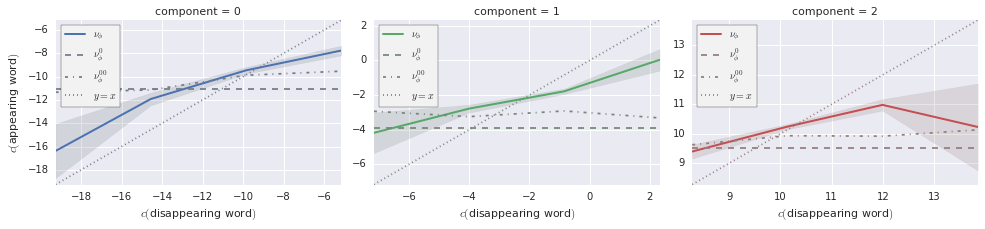

In [21]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation)
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.2 On the features we expose in the paper

Compute the actual PCA

In [22]:
# Compute the PCA.
pcafeatures = tuple(sorted(PAPER_FEATURES))
pcavariations = variations[variations['feature'].map(lambda f: f in pcafeatures)]\
    .pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 3 components.

Those explain the following variance:
[ 0.59382124  0.18590326  0.12157051]

We're plotting variation for the first 3 components:


,aoa,clustering,frequency,letters_count,orthographic_density,synonyms_count
Component-0,-0.714687,-0.090633,0.308611,-0.568994,0.248895,0.008022
Component-1,-0.469670,-0.124163,0.417062,0.725384,-0.252116,-0.017557
Component-2,0.509982,-0.089152,0.839908,-0.158462,0.029012,-0.023936


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [23]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (    1 of 67981) |           | Elapsed Time: 0:00:12 ETA:  9 days, 22:12:43

  0% (  134 of 67981) |                    | Elapsed Time: 0:00:13 ETA:  0:08:20

  0% (  269 of 67981) |                    | Elapsed Time: 0:00:14 ETA:  0:08:14

  0% (  399 of 67981) |                    | Elapsed Time: 0:00:15 ETA:  0:08:18

  0% (  535 of 67981) |                    | Elapsed Time: 0:00:16 ETA:  0:08:14

  0% (  663 of 67981) |                    | Elapsed Time: 0:00:17 ETA:  0:08:17

  1% (  795 of 67981) |                    | Elapsed Time: 0:00:18 ETA:  0:08:16

  1% (  850 of 67981) |                    | Elapsed Time: 0:00:19 ETA:  0:08:16

  1% (  979 of 67981) |                    | Elapsed Time: 0:00:20 ETA:  0:08:17

  1% ( 1111 of 67981) |                    | Elapsed Time: 0:00:21 ETA:  0:08:16

  1% ( 1248 of 67981) |                    | Elapsed Time: 0:00:22 ETA:  0:08:13

  2% ( 1383 of 67981) |                    | Elapsed Time: 0:00:23 ETA:  0:08:12

  2% ( 1521 of 67981) |                    | Elapsed Time: 0:00:24 ETA:  0:08:07

  2% ( 1661 of 67981) |                    | Elapsed Time: 0:00:25 ETA:  0:08:05

  2% ( 1700 of 67981) |                    | Elapsed Time: 0:00:25 ETA:  0:08:00

  2% ( 1845 of 67981) |                    | Elapsed Time: 0:00:26 ETA:  0:07:53

  2% ( 1984 of 67981) |                    | Elapsed Time: 0:00:27 ETA:  0:07:50

  3% ( 2127 of 67981) |                    | Elapsed Time: 0:00:28 ETA:  0:07:43

  3% ( 2266 of 67981) |                    | Elapsed Time: 0:00:29 ETA:  0:07:39

  3% ( 2401 of 67981) |                    | Elapsed Time: 0:00:30 ETA:  0:07:39

  3% ( 2550 of 67981) |                    | Elapsed Time: 0:00:31 ETA:  0:07:40

  3% ( 2685 of 67981) |                    | Elapsed Time: 0:00:32 ETA:  0:07:42

  4% ( 2822 of 67981) |                    | Elapsed Time: 0:00:33 ETA:  0:07:42

  4% ( 2969 of 67981) |                    | Elapsed Time: 0:00:34 ETA:  0:07:40

  4% ( 3123 of 67981) |                    | Elapsed Time: 0:00:35 ETA:  0:07:32

  4% ( 3278 of 67981) |                    | Elapsed Time: 0:00:36 ETA:  0:07:26

  5% ( 3400 of 67981) |#                   | Elapsed Time: 0:00:37 ETA:  0:07:19

  5% ( 3541 of 67981) |#                   | Elapsed Time: 0:00:38 ETA:  0:07:16

  5% ( 3684 of 67981) |#                   | Elapsed Time: 0:00:39 ETA:  0:07:10

  5% ( 3826 of 67981) |#                   | Elapsed Time: 0:00:40 ETA:  0:07:09

  5% ( 3969 of 67981) |#                   | Elapsed Time: 0:00:41 ETA:  0:07:05

  6% ( 4112 of 67981) |#                   | Elapsed Time: 0:00:42 ETA:  0:07:01

  6% ( 4249 of 67981) |#                   | Elapsed Time: 0:00:43 ETA:  0:07:17

  6% ( 4331 of 67981) |#                   | Elapsed Time: 0:00:44 ETA:  0:07:49

  6% ( 4410 of 67981) |#                   | Elapsed Time: 0:00:45 ETA:  0:08:25

  6% ( 4491 of 67981) |#                   | Elapsed Time: 0:00:46 ETA:  0:08:59

  6% ( 4573 of 67981) |#                   | Elapsed Time: 0:00:47 ETA:  0:09:39

  6% ( 4666 of 67981) |#                   | Elapsed Time: 0:00:48 ETA:  0:10:14

  7% ( 4818 of 67981) |#                   | Elapsed Time: 0:00:49 ETA:  0:10:06

  7% ( 4969 of 67981) |#                   | Elapsed Time: 0:00:50 ETA:  0:09:59

  7% ( 5099 of 67981) |#                   | Elapsed Time: 0:00:51 ETA:  0:09:49

  7% ( 5241 of 67981) |#                   | Elapsed Time: 0:00:52 ETA:  0:09:23

  7% ( 5393 of 67981) |#                   | Elapsed Time: 0:00:53 ETA:  0:08:41

  8% ( 5541 of 67981) |#                   | Elapsed Time: 0:00:54 ETA:  0:08:05

  8% ( 5691 of 67981) |#                   | Elapsed Time: 0:00:55 ETA:  0:07:32

  8% ( 5837 of 67981) |#                   | Elapsed Time: 0:00:56 ETA:  0:07:05

  8% ( 5949 of 67981) |#                   | Elapsed Time: 0:00:57 ETA:  0:06:44

  8% ( 6103 of 67981) |#                   | Elapsed Time: 0:00:58 ETA:  0:06:43

  9% ( 6252 of 67981) |#                   | Elapsed Time: 0:00:59 ETA:  0:06:42

  9% ( 6401 of 67981) |#                   | Elapsed Time: 0:01:00 ETA:  0:06:38

  9% ( 6554 of 67981) |#                   | Elapsed Time: 0:01:01 ETA:  0:06:33

  9% ( 6705 of 67981) |#                   | Elapsed Time: 0:01:02 ETA:  0:06:33

 10% ( 6799 of 67981) |##                  | Elapsed Time: 0:01:02 ETA:  0:06:36

 10% ( 6911 of 67981) |##                  | Elapsed Time: 0:01:03 ETA:  0:06:50

 10% ( 7008 of 67981) |##                  | Elapsed Time: 0:01:05 ETA:  0:07:09

 10% ( 7102 of 67981) |##                  | Elapsed Time: 0:01:06 ETA:  0:07:30

 10% ( 7260 of 67981) |##                  | Elapsed Time: 0:01:07 ETA:  0:07:27

 10% ( 7400 of 67981) |##                  | Elapsed Time: 0:01:08 ETA:  0:07:31

 11% ( 7539 of 67981) |##                  | Elapsed Time: 0:01:09 ETA:  0:07:34

 11% ( 7648 of 67981) |##                  | Elapsed Time: 0:01:09 ETA:  0:07:41

 11% ( 7791 of 67981) |##                  | Elapsed Time: 0:01:10 ETA:  0:07:44

 11% ( 7907 of 67981) |##                  | Elapsed Time: 0:01:11 ETA:  0:07:49

 11% ( 7984 of 67981) |##                  | Elapsed Time: 0:01:12 ETA:  0:08:06

 11% ( 8095 of 67981) |##                  | Elapsed Time: 0:01:13 ETA:  0:07:57

 12% ( 8219 of 67981) |##                  | Elapsed Time: 0:01:14 ETA:  0:07:41

 12% ( 8323 of 67981) |##                  | Elapsed Time: 0:01:15 ETA:  0:08:07

 12% ( 8498 of 67981) |##                  | Elapsed Time: 0:01:16 ETA:  0:08:07

 12% ( 8661 of 67981) |##                  | Elapsed Time: 0:01:18 ETA:  0:07:51

 12% ( 8787 of 67981) |##                  | Elapsed Time: 0:01:19 ETA:  0:07:59

 13% ( 8900 of 67981) |##                  | Elapsed Time: 0:01:20 ETA:  0:08:01

 13% ( 9017 of 67981) |##                  | Elapsed Time: 0:01:21 ETA:  0:07:38

 13% ( 9137 of 67981) |##                  | Elapsed Time: 0:01:22 ETA:  0:07:32

 13% ( 9256 of 67981) |##                  | Elapsed Time: 0:01:23 ETA:  0:07:34

 13% ( 9348 of 67981) |##                  | Elapsed Time: 0:01:23 ETA:  0:07:22

 13% ( 9464 of 67981) |##                  | Elapsed Time: 0:01:24 ETA:  0:07:38

 14% ( 9580 of 67981) |##                  | Elapsed Time: 0:01:25 ETA:  0:07:45

 14% ( 9698 of 67981) |##                  | Elapsed Time: 0:01:26 ETA:  0:08:08

 14% ( 9815 of 67981) |##                  | Elapsed Time: 0:01:27 ETA:  0:08:13

 14% ( 9932 of 67981) |##                  | Elapsed Time: 0:01:28 ETA:  0:08:09

 14% (10054 of 67981) |##                  | Elapsed Time: 0:01:29 ETA:  0:08:06

 15% (10198 of 67981) |###                 | Elapsed Time: 0:01:30 ETA:  0:08:03

 15% (10320 of 67981) |###                 | Elapsed Time: 0:01:31 ETA:  0:08:02

 15% (10440 of 67981) |###                 | Elapsed Time: 0:01:32 ETA:  0:07:59

 15% (10560 of 67981) |###                 | Elapsed Time: 0:01:34 ETA:  0:07:56

 15% (10680 of 67981) |###                 | Elapsed Time: 0:01:35 ETA:  0:07:54

 15% (10800 of 67981) |###                 | Elapsed Time: 0:01:36 ETA:  0:07:51

 16% (10921 of 67981) |###                 | Elapsed Time: 0:01:37 ETA:  0:07:47

 16% (11047 of 67981) |###                 | Elapsed Time: 0:01:38 ETA:  0:07:46

 16% (11168 of 67981) |###                 | Elapsed Time: 0:01:39 ETA:  0:07:45

 16% (11287 of 67981) |###                 | Elapsed Time: 0:01:40 ETA:  0:07:45

 16% (11407 of 67981) |###                 | Elapsed Time: 0:01:41 ETA:  0:07:44

 16% (11527 of 67981) |###                 | Elapsed Time: 0:01:42 ETA:  0:07:43

 17% (11649 of 67981) |###                 | Elapsed Time: 0:01:43 ETA:  0:07:41

 17% (11772 of 67981) |###                 | Elapsed Time: 0:01:44 ETA:  0:07:38

 17% (11897 of 67981) |###                 | Elapsed Time: 0:01:45 ETA:  0:07:37

 17% (12031 of 67981) |###                 | Elapsed Time: 0:01:46 ETA:  0:07:29

 17% (12176 of 67981) |###                 | Elapsed Time: 0:01:47 ETA:  0:07:15

 18% (12307 of 67981) |###                 | Elapsed Time: 0:01:48 ETA:  0:07:07

 18% (12429 of 67981) |###                 | Elapsed Time: 0:01:49 ETA:  0:07:06

 18% (12563 of 67981) |###                 | Elapsed Time: 0:01:50 ETA:  0:06:58

 18% (12699 of 67981) |###                 | Elapsed Time: 0:01:51 ETA:  0:06:50

 18% (12747 of 67981) |###                 | Elapsed Time: 0:01:51 ETA:  0:06:44

 18% (12884 of 67981) |###                 | Elapsed Time: 0:01:52 ETA:  0:06:36

 19% (13019 of 67981) |###                 | Elapsed Time: 0:01:53 ETA:  0:06:34

 19% (13157 of 67981) |###                 | Elapsed Time: 0:01:54 ETA:  0:06:31

 19% (13282 of 67981) |###                 | Elapsed Time: 0:01:55 ETA:  0:06:39

 19% (13409 of 67981) |###                 | Elapsed Time: 0:01:56 ETA:  0:06:40

 19% (13537 of 67981) |###                 | Elapsed Time: 0:01:57 ETA:  0:06:36

 20% (13597 of 67981) |####                | Elapsed Time: 0:01:57 ETA:  0:06:36

 20% (13726 of 67981) |####                | Elapsed Time: 0:01:58 ETA:  0:06:38

 20% (13865 of 67981) |####                | Elapsed Time: 0:01:59 ETA:  0:06:35

 20% (13992 of 67981) |####                | Elapsed Time: 0:02:00 ETA:  0:06:39

 20% (14119 of 67981) |####                | Elapsed Time: 0:02:01 ETA:  0:06:42

 20% (14254 of 67981) |####                | Elapsed Time: 0:02:02 ETA:  0:06:42

 21% (14393 of 67981) |####                | Elapsed Time: 0:02:03 ETA:  0:06:34

 21% (14446 of 67981) |####                | Elapsed Time: 0:02:04 ETA:  0:06:31

 21% (14568 of 67981) |####                | Elapsed Time: 0:02:05 ETA:  0:06:33

 21% (14705 of 67981) |####                | Elapsed Time: 0:02:06 ETA:  0:06:30

 21% (14845 of 67981) |####                | Elapsed Time: 0:02:07 ETA:  0:06:24

 22% (14980 of 67981) |####                | Elapsed Time: 0:02:08 ETA:  0:06:25

 22% (15117 of 67981) |####                | Elapsed Time: 0:02:09 ETA:  0:06:20

 22% (15252 of 67981) |####                | Elapsed Time: 0:02:10 ETA:  0:06:15

 22% (15296 of 67981) |####                | Elapsed Time: 0:02:10 ETA:  0:06:15

 22% (15434 of 67981) |####                | Elapsed Time: 0:02:11 ETA:  0:06:14

 22% (15571 of 67981) |####                | Elapsed Time: 0:02:12 ETA:  0:06:12

 23% (15717 of 67981) |####                | Elapsed Time: 0:02:13 ETA:  0:06:01

 23% (15856 of 67981) |####                | Elapsed Time: 0:02:14 ETA:  0:05:58

 23% (15994 of 67981) |####                | Elapsed Time: 0:02:15 ETA:  0:05:58

 23% (16146 of 67981) |####                | Elapsed Time: 0:02:16 ETA:  0:06:00

 23% (16280 of 67981) |####                | Elapsed Time: 0:02:17 ETA:  0:05:59

 24% (16419 of 67981) |####                | Elapsed Time: 0:02:18 ETA:  0:05:58

 24% (16563 of 67981) |####                | Elapsed Time: 0:02:19 ETA:  0:05:54

 24% (16719 of 67981) |####                | Elapsed Time: 0:02:20 ETA:  0:05:45

 24% (16872 of 67981) |####                | Elapsed Time: 0:02:21 ETA:  0:05:41

 25% (16996 of 67981) |#####               | Elapsed Time: 0:02:22 ETA:  0:05:34

 25% (17143 of 67981) |#####               | Elapsed Time: 0:02:23 ETA:  0:05:29

 25% (17312 of 67981) |#####               | Elapsed Time: 0:02:24 ETA:  0:05:13

 25% (17475 of 67981) |#####               | Elapsed Time: 0:02:25 ETA:  0:05:05

 25% (17601 of 67981) |#####               | Elapsed Time: 0:02:26 ETA:  0:05:07

 26% (17707 of 67981) |#####               | Elapsed Time: 0:02:27 ETA:  0:05:18

 26% (17813 of 67981) |#####               | Elapsed Time: 0:02:28 ETA:  0:05:31

 26% (17846 of 67981) |#####               | Elapsed Time: 0:02:29 ETA:  0:05:42

 26% (17987 of 67981) |#####               | Elapsed Time: 0:02:30 ETA:  0:05:46

 26% (18139 of 67981) |#####               | Elapsed Time: 0:02:31 ETA:  0:05:45

 26% (18287 of 67981) |#####               | Elapsed Time: 0:02:32 ETA:  0:05:44

 27% (18430 of 67981) |#####               | Elapsed Time: 0:02:33 ETA:  0:05:54

 27% (18571 of 67981) |#####               | Elapsed Time: 0:02:34 ETA:  0:06:03

 27% (18695 of 67981) |#####               | Elapsed Time: 0:02:34 ETA:  0:05:58

 27% (18813 of 67981) |#####               | Elapsed Time: 0:02:35 ETA:  0:05:51

 27% (18929 of 67981) |#####               | Elapsed Time: 0:02:36 ETA:  0:05:46

 28% (19044 of 67981) |#####               | Elapsed Time: 0:02:37 ETA:  0:05:49

 28% (19192 of 67981) |#####               | Elapsed Time: 0:02:38 ETA:  0:05:45

 28% (19345 of 67981) |#####               | Elapsed Time: 0:02:40 ETA:  0:05:44

 28% (19488 of 67981) |#####               | Elapsed Time: 0:02:41 ETA:  0:05:45

 28% (19545 of 67981) |#####               | Elapsed Time: 0:02:41 ETA:  0:05:47

 28% (19682 of 67981) |#####               | Elapsed Time: 0:02:42 ETA:  0:05:48

 29% (19817 of 67981) |#####               | Elapsed Time: 0:02:43 ETA:  0:05:47

 29% (19954 of 67981) |#####               | Elapsed Time: 0:02:44 ETA:  0:05:38

 29% (20091 of 67981) |#####               | Elapsed Time: 0:02:45 ETA:  0:05:27

 29% (20232 of 67981) |#####               | Elapsed Time: 0:02:46 ETA:  0:05:16

 30% (20395 of 67981) |######              | Elapsed Time: 0:02:47 ETA:  0:05:22

 30% (20544 of 67981) |######              | Elapsed Time: 0:02:48 ETA:  0:05:18

 30% (20691 of 67981) |######              | Elapsed Time: 0:02:49 ETA:  0:05:14

 30% (20833 of 67981) |######              | Elapsed Time: 0:02:50 ETA:  0:05:11

 30% (20975 of 67981) |######              | Elapsed Time: 0:02:51 ETA:  0:05:07

 31% (21133 of 67981) |######              | Elapsed Time: 0:02:52 ETA:  0:04:57

 31% (21245 of 67981) |######              | Elapsed Time: 0:02:53 ETA:  0:04:47

 31% (21411 of 67981) |######              | Elapsed Time: 0:02:54 ETA:  0:04:36

 31% (21568 of 67981) |######              | Elapsed Time: 0:02:55 ETA:  0:04:30

 31% (21704 of 67981) |######              | Elapsed Time: 0:02:56 ETA:  0:04:35

 32% (21864 of 67981) |######              | Elapsed Time: 0:02:57 ETA:  0:04:30

 32% (22010 of 67981) |######              | Elapsed Time: 0:02:58 ETA:  0:04:29

 32% (22094 of 67981) |######              | Elapsed Time: 0:02:58 ETA:  0:04:22

 32% (22245 of 67981) |######              | Elapsed Time: 0:02:59 ETA:  0:04:17

 32% (22423 of 67981) |######              | Elapsed Time: 0:03:00 ETA:  0:04:10

 33% (22600 of 67981) |######              | Elapsed Time: 0:03:01 ETA:  0:04:05

 33% (22775 of 67981) |######              | Elapsed Time: 0:03:02 ETA:  0:04:01

 33% (22944 of 67981) |######              | Elapsed Time: 0:03:03 ETA:  0:03:54

 33% (23111 of 67981) |######              | Elapsed Time: 0:03:04 ETA:  0:03:44

 34% (23263 of 67981) |######              | Elapsed Time: 0:03:05 ETA:  0:03:46

 34% (23421 of 67981) |######              | Elapsed Time: 0:03:06 ETA:  0:03:41

 34% (23576 of 67981) |######              | Elapsed Time: 0:03:07 ETA:  0:03:45

 34% (23718 of 67981) |######              | Elapsed Time: 0:03:08 ETA:  0:03:46

 35% (23794 of 67981) |#######             | Elapsed Time: 0:03:09 ETA:  0:03:59

 35% (23907 of 67981) |#######             | Elapsed Time: 0:03:10 ETA:  0:04:19

 35% (24028 of 67981) |#######             | Elapsed Time: 0:03:11 ETA:  0:04:38

 35% (24146 of 67981) |#######             | Elapsed Time: 0:03:12 ETA:  0:04:59

 35% (24269 of 67981) |#######             | Elapsed Time: 0:03:13 ETA:  0:05:16

 35% (24424 of 67981) |#######             | Elapsed Time: 0:03:14 ETA:  0:05:14

 36% (24573 of 67981) |#######             | Elapsed Time: 0:03:15 ETA:  0:05:17

 36% (24644 of 67981) |#######             | Elapsed Time: 0:03:15 ETA:  0:05:26

 36% (24768 of 67981) |#######             | Elapsed Time: 0:03:16 ETA:  0:05:34

 36% (24915 of 67981) |#######             | Elapsed Time: 0:03:17 ETA:  0:05:20

 36% (25077 of 67981) |#######             | Elapsed Time: 0:03:18 ETA:  0:04:58

 37% (25229 of 67981) |#######             | Elapsed Time: 0:03:19 ETA:  0:04:44

 37% (25361 of 67981) |#######             | Elapsed Time: 0:03:20 ETA:  0:04:37

 37% (25493 of 67981) |#######             | Elapsed Time: 0:03:21 ETA:  0:04:31

 37% (25655 of 67981) |#######             | Elapsed Time: 0:03:22 ETA:  0:04:27

 37% (25770 of 67981) |#######             | Elapsed Time: 0:03:23 ETA:  0:04:40

 38% (25872 of 67981) |#######             | Elapsed Time: 0:03:24 ETA:  0:04:53

 38% (26040 of 67981) |#######             | Elapsed Time: 0:03:25 ETA:  0:04:35

 38% (26178 of 67981) |#######             | Elapsed Time: 0:03:26 ETA:  0:04:37

 38% (26300 of 67981) |#######             | Elapsed Time: 0:03:27 ETA:  0:04:52

 38% (26343 of 67981) |#######             | Elapsed Time: 0:03:28 ETA:  0:05:00

 38% (26494 of 67981) |#######             | Elapsed Time: 0:03:29 ETA:  0:04:50

 39% (26629 of 67981) |#######             | Elapsed Time: 0:03:30 ETA:  0:04:50

 39% (26774 of 67981) |#######             | Elapsed Time: 0:03:31 ETA:  0:04:56

 39% (26935 of 67981) |#######             | Elapsed Time: 0:03:32 ETA:  0:04:35

 39% (27106 of 67981) |#######             | Elapsed Time: 0:03:33 ETA:  0:04:07

 40% (27193 of 67981) |########            | Elapsed Time: 0:03:33 ETA:  0:04:12

 40% (27357 of 67981) |########            | Elapsed Time: 0:03:34 ETA:  0:04:01

 40% (27509 of 67981) |########            | Elapsed Time: 0:03:35 ETA:  0:03:48

 40% (27658 of 67981) |########            | Elapsed Time: 0:03:36 ETA:  0:03:46

 40% (27810 of 67981) |########            | Elapsed Time: 0:03:37 ETA:  0:03:45

 41% (27954 of 67981) |########            | Elapsed Time: 0:03:38 ETA:  0:03:41

 41% (28043 of 67981) |########            | Elapsed Time: 0:03:39 ETA:  0:03:38

 41% (28166 of 67981) |########            | Elapsed Time: 0:03:40 ETA:  0:03:51

 41% (28311 of 67981) |########            | Elapsed Time: 0:03:41 ETA:  0:03:59

 41% (28470 of 67981) |########            | Elapsed Time: 0:03:42 ETA:  0:03:57

 42% (28619 of 67981) |########            | Elapsed Time: 0:03:43 ETA:  0:04:01

 42% (28771 of 67981) |########            | Elapsed Time: 0:03:44 ETA:  0:04:00

 42% (28892 of 67981) |########            | Elapsed Time: 0:03:45 ETA:  0:03:58

 42% (29039 of 67981) |########            | Elapsed Time: 0:03:46 ETA:  0:03:59

 42% (29177 of 67981) |########            | Elapsed Time: 0:03:47 ETA:  0:04:00

 43% (29345 of 67981) |########            | Elapsed Time: 0:03:48 ETA:  0:03:51

 43% (29503 of 67981) |########            | Elapsed Time: 0:03:49 ETA:  0:03:38

 43% (29628 of 67981) |########            | Elapsed Time: 0:03:50 ETA:  0:03:45

 43% (29742 of 67981) |########            | Elapsed Time: 0:03:51 ETA:  0:04:07

 43% (29862 of 67981) |########            | Elapsed Time: 0:03:52 ETA:  0:04:20

 44% (30005 of 67981) |########            | Elapsed Time: 0:03:53 ETA:  0:04:23

 44% (30161 of 67981) |########            | Elapsed Time: 0:03:54 ETA:  0:04:18

 44% (30312 of 67981) |########            | Elapsed Time: 0:03:55 ETA:  0:04:11

 44% (30468 of 67981) |########            | Elapsed Time: 0:03:56 ETA:  0:04:15

 45% (30592 of 67981) |#########           | Elapsed Time: 0:03:57 ETA:  0:04:15

 45% (30751 of 67981) |#########           | Elapsed Time: 0:03:58 ETA:  0:03:59

 45% (30900 of 67981) |#########           | Elapsed Time: 0:03:59 ETA:  0:03:39

 45% (31052 of 67981) |#########           | Elapsed Time: 0:04:00 ETA:  0:03:36

 45% (31184 of 67981) |#########           | Elapsed Time: 0:04:01 ETA:  0:03:30

 46% (31335 of 67981) |#########           | Elapsed Time: 0:04:02 ETA:  0:03:27

 46% (31442 of 67981) |#########           | Elapsed Time: 0:04:02 ETA:  0:03:26

 46% (31598 of 67981) |#########           | Elapsed Time: 0:04:03 ETA:  0:03:23

 46% (31752 of 67981) |#########           | Elapsed Time: 0:04:04 ETA:  0:03:23

 46% (31756 of 67981) |#########           | Elapsed Time: 0:04:13 ETA:  0:12:01

 46% (31891 of 67981) |#########           | Elapsed Time: 0:04:14 ETA:  0:12:20

 47% (32020 of 67981) |#########           | Elapsed Time: 0:04:15 ETA:  0:12:37

 47% (32160 of 67981) |#########           | Elapsed Time: 0:04:16 ETA:  0:12:47

 47% (32291 of 67981) |#########           | Elapsed Time: 0:04:17 ETA:  0:12:37

 47% (32447 of 67981) |#########           | Elapsed Time: 0:04:18 ETA:  0:12:32

 47% (32556 of 67981) |#########           | Elapsed Time: 0:04:19 ETA:  0:12:49

 48% (32665 of 67981) |#########           | Elapsed Time: 0:04:20 ETA:  0:13:33

 48% (32800 of 67981) |#########           | Elapsed Time: 0:04:21 ETA:  0:13:51

 48% (32946 of 67981) |#########           | Elapsed Time: 0:04:22 ETA:  0:04:03

 48% (33041 of 67981) |#########           | Elapsed Time: 0:04:23 ETA:  0:04:20

 48% (33141 of 67981) |#########           | Elapsed Time: 0:04:24 ETA:  0:04:16

 48% (33285 of 67981) |#########           | Elapsed Time: 0:04:25 ETA:  0:04:14

 49% (33414 of 67981) |#########           | Elapsed Time: 0:04:26 ETA:  0:04:24

 49% (33540 of 67981) |#########           | Elapsed Time: 0:04:27 ETA:  0:04:37

 49% (33673 of 67981) |#########           | Elapsed Time: 0:04:28 ETA:  0:04:25

 49% (33802 of 67981) |#########           | Elapsed Time: 0:04:29 ETA:  0:04:14

 49% (33933 of 67981) |#########           | Elapsed Time: 0:04:30 ETA:  0:04:15

 50% (33991 of 67981) |##########          | Elapsed Time: 0:04:30 ETA:  0:04:22

 50% (34137 of 67981) |##########          | Elapsed Time: 0:04:31 ETA:  0:03:56

 50% (34231 of 67981) |##########          | Elapsed Time: 0:04:32 ETA:  0:04:15

 50% (34348 of 67981) |##########          | Elapsed Time: 0:04:33 ETA:  0:04:27

 50% (34485 of 67981) |##########          | Elapsed Time: 0:04:34 ETA:  0:04:22

 50% (34606 of 67981) |##########          | Elapsed Time: 0:04:35 ETA:  0:04:24

 51% (34745 of 67981) |##########          | Elapsed Time: 0:04:37 ETA:  0:04:20

 51% (34841 of 67981) |##########          | Elapsed Time: 0:04:37 ETA:  0:04:15

 51% (34991 of 67981) |##########          | Elapsed Time: 0:04:38 ETA:  0:04:05

 51% (35104 of 67981) |##########          | Elapsed Time: 0:04:39 ETA:  0:04:13

 51% (35213 of 67981) |##########          | Elapsed Time: 0:04:40 ETA:  0:04:30

 51% (35347 of 67981) |##########          | Elapsed Time: 0:04:41 ETA:  0:04:09

 52% (35482 of 67981) |##########          | Elapsed Time: 0:04:42 ETA:  0:04:00

 52% (35610 of 67981) |##########          | Elapsed Time: 0:04:43 ETA:  0:04:03

 52% (35691 of 67981) |##########          | Elapsed Time: 0:04:44 ETA:  0:03:53

 52% (35829 of 67981) |##########          | Elapsed Time: 0:04:45 ETA:  0:03:52

 52% (35983 of 67981) |##########          | Elapsed Time: 0:04:46 ETA:  0:03:44

 53% (36109 of 67981) |##########          | Elapsed Time: 0:04:47 ETA:  0:03:53

 53% (36230 of 67981) |##########          | Elapsed Time: 0:04:48 ETA:  0:03:49

 53% (36365 of 67981) |##########          | Elapsed Time: 0:04:49 ETA:  0:03:36

 53% (36493 of 67981) |##########          | Elapsed Time: 0:04:50 ETA:  0:03:38

 53% (36540 of 67981) |##########          | Elapsed Time: 0:04:50 ETA:  0:03:37

 53% (36661 of 67981) |##########          | Elapsed Time: 0:04:51 ETA:  0:03:40

 54% (36825 of 67981) |##########          | Elapsed Time: 0:04:52 ETA:  0:03:29

 54% (36963 of 67981) |##########          | Elapsed Time: 0:04:53 ETA:  0:03:28

 54% (37098 of 67981) |##########          | Elapsed Time: 0:04:54 ETA:  0:03:36

 54% (37234 of 67981) |##########          | Elapsed Time: 0:04:55 ETA:  0:03:30

 55% (37390 of 67981) |###########         | Elapsed Time: 0:04:56 ETA:  0:03:20

 55% (37543 of 67981) |###########         | Elapsed Time: 0:04:57 ETA:  0:03:07

 55% (37691 of 67981) |###########         | Elapsed Time: 0:04:58 ETA:  0:03:02

 55% (37846 of 67981) |###########         | Elapsed Time: 0:04:59 ETA:  0:02:47

 55% (38002 of 67981) |###########         | Elapsed Time: 0:05:00 ETA:  0:02:49

 56% (38140 of 67981) |###########         | Elapsed Time: 0:05:01 ETA:  0:02:48

 56% (38240 of 67981) |###########         | Elapsed Time: 0:05:02 ETA:  0:02:46

 56% (38347 of 67981) |###########         | Elapsed Time: 0:05:03 ETA:  0:02:57

 56% (38473 of 67981) |###########         | Elapsed Time: 0:05:04 ETA:  0:03:01

 56% (38625 of 67981) |###########         | Elapsed Time: 0:05:05 ETA:  0:02:56

 57% (38772 of 67981) |###########         | Elapsed Time: 0:05:06 ETA:  0:02:57

 57% (38932 of 67981) |###########         | Elapsed Time: 0:05:07 ETA:  0:02:52

 57% (39090 of 67981) |###########         | Elapsed Time: 0:05:08 ETA:  0:02:47

 57% (39251 of 67981) |###########         | Elapsed Time: 0:05:09 ETA:  0:02:45

 57% (39387 of 67981) |###########         | Elapsed Time: 0:05:10 ETA:  0:02:44

 58% (39514 of 67981) |###########         | Elapsed Time: 0:05:11 ETA:  0:02:47

 58% (39644 of 67981) |###########         | Elapsed Time: 0:05:12 ETA:  0:02:38

 58% (39783 of 67981) |###########         | Elapsed Time: 0:05:13 ETA:  0:02:32

 58% (39939 of 67981) |###########         | Elapsed Time: 0:05:14 ETA:  0:02:40

 58% (40085 of 67981) |###########         | Elapsed Time: 0:05:15 ETA:  0:02:44

 59% (40254 of 67981) |###########         | Elapsed Time: 0:05:16 ETA:  0:02:41

 59% (40419 of 67981) |###########         | Elapsed Time: 0:05:17 ETA:  0:02:38

 59% (40574 of 67981) |###########         | Elapsed Time: 0:05:18 ETA:  0:02:30

 59% (40711 of 67981) |###########         | Elapsed Time: 0:05:19 ETA:  0:02:25

 60% (40789 of 67981) |############        | Elapsed Time: 0:05:20 ETA:  0:02:18

 60% (40938 of 67981) |############        | Elapsed Time: 0:05:21 ETA:  0:02:13

 60% (41081 of 67981) |############        | Elapsed Time: 0:05:22 ETA:  0:02:08

 60% (41232 of 67981) |############        | Elapsed Time: 0:05:23 ETA:  0:02:07

 60% (41362 of 67981) |############        | Elapsed Time: 0:05:24 ETA:  0:02:12

 61% (41518 of 67981) |############        | Elapsed Time: 0:05:25 ETA:  0:02:15

 61% (41639 of 67981) |############        | Elapsed Time: 0:05:26 ETA:  0:02:23

 61% (41779 of 67981) |############        | Elapsed Time: 0:05:27 ETA:  0:02:28

 61% (41917 of 67981) |############        | Elapsed Time: 0:05:28 ETA:  0:02:26

 61% (42068 of 67981) |############        | Elapsed Time: 0:05:29 ETA:  0:02:23

 62% (42200 of 67981) |############        | Elapsed Time: 0:05:30 ETA:  0:02:28

 62% (42353 of 67981) |############        | Elapsed Time: 0:05:31 ETA:  0:02:24

 62% (42489 of 67981) |############        | Elapsed Time: 0:05:32 ETA:  0:02:22

 62% (42628 of 67981) |############        | Elapsed Time: 0:05:33 ETA:  0:02:17

 62% (42763 of 67981) |############        | Elapsed Time: 0:05:34 ETA:  0:02:24

 63% (42907 of 67981) |############        | Elapsed Time: 0:05:35 ETA:  0:02:22

 63% (43052 of 67981) |############        | Elapsed Time: 0:05:36 ETA:  0:02:19

 63% (43187 of 67981) |############        | Elapsed Time: 0:05:37 ETA:  0:02:20

 63% (43338 of 67981) |############        | Elapsed Time: 0:05:38 ETA:  0:02:18

 63% (43448 of 67981) |############        | Elapsed Time: 0:05:39 ETA:  0:02:26

 64% (43545 of 67981) |############        | Elapsed Time: 0:05:40 ETA:  0:02:48

 64% (43686 of 67981) |############        | Elapsed Time: 0:05:41 ETA:  0:02:51

 64% (43818 of 67981) |############        | Elapsed Time: 0:05:42 ETA:  0:02:53

 64% (43954 of 67981) |############        | Elapsed Time: 0:05:43 ETA:  0:02:52

 64% (44048 of 67981) |############        | Elapsed Time: 0:05:44 ETA:  0:03:13

 64% (44116 of 67981) |############        | Elapsed Time: 0:05:45 ETA:  0:03:52

 65% (44188 of 67981) |#############       | Elapsed Time: 0:05:45 ETA:  0:04:16

 65% (44319 of 67981) |#############       | Elapsed Time: 0:05:46 ETA:  0:04:27

 65% (44467 of 67981) |#############       | Elapsed Time: 0:05:47 ETA:  0:04:03

 65% (44626 of 67981) |#############       | Elapsed Time: 0:05:48 ETA:  0:03:28

 65% (44757 of 67981) |#############       | Elapsed Time: 0:05:49 ETA:  0:03:33

 66% (44911 of 67981) |#############       | Elapsed Time: 0:05:50 ETA:  0:03:20

 66% (45038 of 67981) |#############       | Elapsed Time: 0:05:51 ETA:  0:03:13

 66% (45180 of 67981) |#############       | Elapsed Time: 0:05:52 ETA:  0:02:49

 66% (45338 of 67981) |#############       | Elapsed Time: 0:05:53 ETA:  0:02:09

 66% (45482 of 67981) |#############       | Elapsed Time: 0:05:54 ETA:  0:01:49

 67% (45638 of 67981) |#############       | Elapsed Time: 0:05:55 ETA:  0:01:40

 67% (45793 of 67981) |#############       | Elapsed Time: 0:05:56 ETA:  0:01:36

 67% (45888 of 67981) |#############       | Elapsed Time: 0:05:57 ETA:  0:01:42

 67% (46009 of 67981) |#############       | Elapsed Time: 0:05:58 ETA:  0:01:44

 67% (46126 of 67981) |#############       | Elapsed Time: 0:05:59 ETA:  0:01:58

 68% (46267 of 67981) |#############       | Elapsed Time: 0:06:00 ETA:  0:02:01

 68% (46407 of 67981) |#############       | Elapsed Time: 0:06:01 ETA:  0:02:01

 68% (46551 of 67981) |#############       | Elapsed Time: 0:06:02 ETA:  0:02:06

 68% (46701 of 67981) |#############       | Elapsed Time: 0:06:03 ETA:  0:02:02

 68% (46737 of 67981) |#############       | Elapsed Time: 0:06:03 ETA:  0:02:06

 68% (46901 of 67981) |#############       | Elapsed Time: 0:06:04 ETA:  0:02:01

 69% (46989 of 67981) |#############       | Elapsed Time: 0:06:05 ETA:  0:02:23

 69% (47122 of 67981) |#############       | Elapsed Time: 0:06:06 ETA:  0:02:16

 69% (47265 of 67981) |#############       | Elapsed Time: 0:06:07 ETA:  0:02:04

 69% (47424 of 67981) |#############       | Elapsed Time: 0:06:08 ETA:  0:01:55

 70% (47587 of 67981) |##############      | Elapsed Time: 0:06:09 ETA:  0:01:54

 70% (47711 of 67981) |##############      | Elapsed Time: 0:06:10 ETA:  0:02:06

 70% (47850 of 67981) |##############      | Elapsed Time: 0:06:11 ETA:  0:02:07

 70% (47958 of 67981) |##############      | Elapsed Time: 0:06:12 ETA:  0:02:32

 70% (48053 of 67981) |##############      | Elapsed Time: 0:06:13 ETA:  0:02:28

 70% (48188 of 67981) |##############      | Elapsed Time: 0:06:14 ETA:  0:02:26

 71% (48335 of 67981) |##############      | Elapsed Time: 0:06:15 ETA:  0:02:23

 71% (48437 of 67981) |##############      | Elapsed Time: 0:06:16 ETA:  0:02:34

 71% (48579 of 67981) |##############      | Elapsed Time: 0:06:17 ETA:  0:02:31

 71% (48707 of 67981) |##############      | Elapsed Time: 0:06:18 ETA:  0:02:33

 71% (48851 of 67981) |##############      | Elapsed Time: 0:06:19 ETA:  0:02:23

 72% (48996 of 67981) |##############      | Elapsed Time: 0:06:20 ETA:  0:02:19

 72% (49140 of 67981) |##############      | Elapsed Time: 0:06:21 ETA:  0:02:03

 72% (49287 of 67981) |##############      | Elapsed Time: 0:06:22 ETA:  0:01:41

 72% (49413 of 67981) |##############      | Elapsed Time: 0:06:23 ETA:  0:01:49

 72% (49559 of 67981) |##############      | Elapsed Time: 0:06:24 ETA:  0:01:45

 73% (49700 of 67981) |##############      | Elapsed Time: 0:06:25 ETA:  0:01:44

 73% (49840 of 67981) |##############      | Elapsed Time: 0:06:26 ETA:  0:01:38

 73% (49960 of 67981) |##############      | Elapsed Time: 0:06:27 ETA:  0:01:47

 73% (50136 of 67981) |##############      | Elapsed Time: 0:06:28 ETA:  0:01:45

 73% (50271 of 67981) |##############      | Elapsed Time: 0:06:29 ETA:  0:01:47

 74% (50396 of 67981) |##############      | Elapsed Time: 0:06:30 ETA:  0:01:51

 74% (50534 of 67981) |##############      | Elapsed Time: 0:06:31 ETA:  0:01:45

 74% (50685 of 67981) |##############      | Elapsed Time: 0:06:32 ETA:  0:01:42

 74% (50836 of 67981) |##############      | Elapsed Time: 0:06:33 ETA:  0:01:36

 75% (50986 of 67981) |###############     | Elapsed Time: 0:06:34 ETA:  0:01:30

 75% (51128 of 67981) |###############     | Elapsed Time: 0:06:35 ETA:  0:01:21

 75% (51277 of 67981) |###############     | Elapsed Time: 0:06:36 ETA:  0:01:21

 75% (51414 of 67981) |###############     | Elapsed Time: 0:06:37 ETA:  0:01:22

 75% (51563 of 67981) |###############     | Elapsed Time: 0:06:38 ETA:  0:01:16

 76% (51708 of 67981) |###############     | Elapsed Time: 0:06:39 ETA:  0:01:08

 76% (51836 of 67981) |###############     | Elapsed Time: 0:06:40 ETA:  0:01:04

 76% (51995 of 67981) |###############     | Elapsed Time: 0:06:41 ETA:  0:01:00

 76% (52152 of 67981) |###############     | Elapsed Time: 0:06:42 ETA:  0:00:57

 76% (52261 of 67981) |###############     | Elapsed Time: 0:06:43 ETA:  0:01:11

 77% (52406 of 67981) |###############     | Elapsed Time: 0:06:44 ETA:  0:01:08

 77% (52548 of 67981) |###############     | Elapsed Time: 0:06:45 ETA:  0:01:10

 77% (52686 of 67981) |###############     | Elapsed Time: 0:06:46 ETA:  0:01:20

 77% (52836 of 67981) |###############     | Elapsed Time: 0:06:47 ETA:  0:01:17

 77% (52973 of 67981) |###############     | Elapsed Time: 0:06:48 ETA:  0:01:19

 78% (53098 of 67981) |###############     | Elapsed Time: 0:06:49 ETA:  0:01:34

 78% (53252 of 67981) |###############     | Elapsed Time: 0:06:50 ETA:  0:01:34

 78% (53407 of 67981) |###############     | Elapsed Time: 0:06:51 ETA:  0:01:13

 78% (53536 of 67981) |###############     | Elapsed Time: 0:06:52 ETA:  0:01:07

 78% (53683 of 67981) |###############     | Elapsed Time: 0:06:53 ETA:  0:01:04

 79% (53833 of 67981) |###############     | Elapsed Time: 0:06:54 ETA:  0:00:47

 79% (53980 of 67981) |###############     | Elapsed Time: 0:06:55 ETA:  0:00:48

 79% (54154 of 67981) |###############     | Elapsed Time: 0:06:56 ETA:  0:00:38

 79% (54277 of 67981) |###############     | Elapsed Time: 0:06:57 ETA:  0:00:43

 80% (54385 of 67981) |################    | Elapsed Time: 0:06:58 ETA:  0:00:35

 80% (54518 of 67981) |################    | Elapsed Time: 0:06:59 ETA:  0:00:42

 80% (54693 of 67981) |################    | Elapsed Time: 0:07:00 ETA:  0:00:33

 80% (54848 of 67981) |################    | Elapsed Time: 0:07:01 ETA:  0:00:34

 80% (54941 of 67981) |################    | Elapsed Time: 0:07:02 ETA:  0:00:52

 80% (55039 of 67981) |################    | Elapsed Time: 0:07:03 ETA:  0:01:12

 81% (55176 of 67981) |################    | Elapsed Time: 0:07:04 ETA:  0:01:15

 81% (55235 of 67981) |################    | Elapsed Time: 0:07:05 ETA:  0:01:44

 81% (55358 of 67981) |################    | Elapsed Time: 0:07:06 ETA:  0:01:42

 81% (55511 of 67981) |################    | Elapsed Time: 0:07:07 ETA:  0:01:34

 81% (55667 of 67981) |################    | Elapsed Time: 0:07:08 ETA:  0:01:23

 82% (55821 of 67981) |################    | Elapsed Time: 0:07:09 ETA:  0:01:32

 82% (55965 of 67981) |################    | Elapsed Time: 0:07:10 ETA:  0:01:36

 82% (56085 of 67981) |################    | Elapsed Time: 0:07:11 ETA:  0:01:07

 82% (56212 of 67981) |################    | Elapsed Time: 0:07:12 ETA:  0:01:11

 82% (56338 of 67981) |################    | Elapsed Time: 0:07:13 ETA:  0:01:03

 83% (56507 of 67981) |################    | Elapsed Time: 0:07:14 ETA:  0:00:42

 83% (56655 of 67981) |################    | Elapsed Time: 0:07:15 ETA:  0:00:44

 83% (56801 of 67981) |################    | Elapsed Time: 0:07:16 ETA:  0:00:47

 83% (56935 of 67981) |################    | Elapsed Time: 0:07:17 ETA:  0:00:59

 83% (57094 of 67981) |################    | Elapsed Time: 0:07:18 ETA:  0:00:37

 84% (57229 of 67981) |################    | Elapsed Time: 0:07:19 ETA:  0:00:39

 84% (57385 of 67981) |################    | Elapsed Time: 0:07:20 ETA:  0:00:26

 84% (57517 of 67981) |################    | Elapsed Time: 0:07:21 ETA:  0:00:22

 84% (57642 of 67981) |################    | Elapsed Time: 0:07:22 ETA:  0:00:39

 85% (57784 of 67981) |#################   | Elapsed Time: 0:07:23 ETA:  0:00:48

 85% (57947 of 67981) |#################   | Elapsed Time: 0:07:24 ETA:  0:00:32

 85% (58095 of 67981) |#################   | Elapsed Time: 0:07:25 ETA:  0:00:29

 85% (58259 of 67981) |#################   | Elapsed Time: 0:07:26 ETA:  0:00:26

 85% (58402 of 67981) |#################   | Elapsed Time: 0:07:27 ETA:  0:00:22

 86% (58555 of 67981) |#################   | Elapsed Time: 0:07:28 ETA:  0:00:22

 86% (58634 of 67981) |#################   | Elapsed Time: 0:07:28 ETA:  0:00:14

 86% (58767 of 67981) |#################   | Elapsed Time: 0:07:29 ETA:  0:00:10

 86% (58920 of 67981) |#################   | Elapsed Time: 0:07:30 ETA:  0:00:00

 86% (59082 of 67981) |#################   | Elapsed Time: 0:07:31 ETA:  0:00:00

 87% (59242 of 67981) |#################   | Elapsed Time: 0:07:32 ETA:  0:00:00

 87% (59399 of 67981) |#################   | Elapsed Time: 0:07:33 ETA:  0:00:00

 87% (59484 of 67981) |#################   | Elapsed Time: 0:07:34 ETA:  0:00:00

 87% (59651 of 67981) |#################   | Elapsed Time: 0:07:35 ETA:  0:00:00

 87% (59816 of 67981) |#################   | Elapsed Time: 0:07:36 ETA:  0:00:00

 88% (59971 of 67981) |#################   | Elapsed Time: 0:07:37 ETA:  0:00:00

 88% (60135 of 67981) |#################   | Elapsed Time: 0:07:38 ETA:  0:00:00

 88% (60298 of 67981) |#################   | Elapsed Time: 0:07:39 ETA:  0:00:00

 88% (60334 of 67981) |#################   | Elapsed Time: 0:07:39 ETA:  0:00:00

 88% (60441 of 67981) |#################   | Elapsed Time: 0:07:40 ETA:  0:00:00

 89% (60593 of 67981) |#################   | Elapsed Time: 0:07:41 ETA:  0:00:00

 89% (60752 of 67981) |#################   | Elapsed Time: 0:07:42 ETA:  0:00:00

 89% (60877 of 67981) |#################   | Elapsed Time: 0:07:43 ETA:  0:00:00

 89% (61037 of 67981) |#################   | Elapsed Time: 0:07:44 ETA:  0:00:00

 90% (61183 of 67981) |##################  | Elapsed Time: 0:07:45 ETA:  0:00:00

 90% (61321 of 67981) |##################  | Elapsed Time: 0:07:46 ETA:  0:00:01

 90% (61463 of 67981) |##################  | Elapsed Time: 0:07:47 ETA:  0:00:08

 90% (61604 of 67981) |##################  | Elapsed Time: 0:07:48 ETA:  0:00:10

 90% (61765 of 67981) |##################  | Elapsed Time: 0:07:49 ETA:  0:00:00

 91% (61936 of 67981) |##################  | Elapsed Time: 0:07:50 ETA:  0:00:00

 91% (62033 of 67981) |##################  | Elapsed Time: 0:07:51 ETA:  0:00:00

 91% (62173 of 67981) |##################  | Elapsed Time: 0:07:52 ETA:  0:00:00

 91% (62307 of 67981) |##################  | Elapsed Time: 0:07:53 ETA:  0:00:00

 91% (62430 of 67981) |##################  | Elapsed Time: 0:07:54 ETA:  0:00:00

 92% (62594 of 67981) |##################  | Elapsed Time: 0:07:55 ETA:  0:00:00

 92% (62750 of 67981) |##################  | Elapsed Time: 0:07:56 ETA:  0:00:00

 92% (62883 of 67981) |##################  | Elapsed Time: 0:07:57 ETA:  0:00:00

 92% (63055 of 67981) |##################  | Elapsed Time: 0:07:58 ETA:  0:00:00

 92% (63205 of 67981) |##################  | Elapsed Time: 0:07:59 ETA:  0:00:00

 93% (63337 of 67981) |##################  | Elapsed Time: 0:08:00 ETA:  0:00:00

 93% (63476 of 67981) |##################  | Elapsed Time: 0:08:01 ETA:  0:00:00

 93% (63616 of 67981) |##################  | Elapsed Time: 0:08:02 ETA:  0:00:00

 93% (63733 of 67981) |##################  | Elapsed Time: 0:08:03 ETA:  0:00:00

 93% (63880 of 67981) |##################  | Elapsed Time: 0:08:04 ETA:  0:00:00

 94% (64025 of 67981) |##################  | Elapsed Time: 0:08:05 ETA:  0:00:00

 94% (64188 of 67981) |##################  | Elapsed Time: 0:08:06 ETA:  0:00:00

 94% (64334 of 67981) |##################  | Elapsed Time: 0:08:07 ETA:  0:00:00

 94% (64485 of 67981) |##################  | Elapsed Time: 0:08:08 ETA:  0:00:00

 95% (64582 of 67981) |################### | Elapsed Time: 0:08:08 ETA:  0:00:00

 95% (64723 of 67981) |################### | Elapsed Time: 0:08:09 ETA:  0:00:00

 95% (64869 of 67981) |################### | Elapsed Time: 0:08:10 ETA:  0:00:00

 95% (65025 of 67981) |################### | Elapsed Time: 0:08:11 ETA:  0:00:00

 95% (65173 of 67981) |################### | Elapsed Time: 0:08:12 ETA:  0:00:00

 96% (65328 of 67981) |################### | Elapsed Time: 0:08:13 ETA:  0:00:00

 96% (65432 of 67981) |################### | Elapsed Time: 0:08:14 ETA:  0:00:00

 96% (65587 of 67981) |################### | Elapsed Time: 0:08:15 ETA:  0:00:00

 96% (65734 of 67981) |################### | Elapsed Time: 0:08:16 ETA:  0:00:00

 96% (65891 of 67981) |################### | Elapsed Time: 0:08:17 ETA:  0:00:00

 97% (66033 of 67981) |################### | Elapsed Time: 0:08:18 ETA:  0:00:00

 97% (66180 of 67981) |################### | Elapsed Time: 0:08:19 ETA:  0:00:00

 97% (66282 of 67981) |################### | Elapsed Time: 0:08:20 ETA:  0:00:00

 97% (66432 of 67981) |################### | Elapsed Time: 0:08:21 ETA:  0:00:00

 97% (66586 of 67981) |################### | Elapsed Time: 0:08:22 ETA:  0:00:00

 98% (66755 of 67981) |################### | Elapsed Time: 0:08:23 ETA:  0:00:00

 98% (66913 of 67981) |################### | Elapsed Time: 0:08:24 ETA:  0:00:00

 98% (67063 of 67981) |################### | Elapsed Time: 0:08:25 ETA:  0:00:00

 98% (67132 of 67981) |################### | Elapsed Time: 0:08:25 ETA:  0:00:00

 98% (67282 of 67981) |################### | Elapsed Time: 0:08:26 ETA:  0:00:00

 99% (67443 of 67981) |################### | Elapsed Time: 0:08:27 ETA:  0:00:00

 99% (67594 of 67981) |################### | Elapsed Time: 0:08:28 ETA:  0:00:00

 99% (67735 of 67981) |################### | Elapsed Time: 0:08:29 ETA:  0:00:00

 99% (67891 of 67981) |################### | Elapsed Time: 0:08:30 ETA:  0:00:00

100% (67981 of 67981) |####################| Elapsed Time: 0:08:31 Time: 0:08:31


Compute cluster averages (so as not to overestimate confidence intervals).

In [24]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components

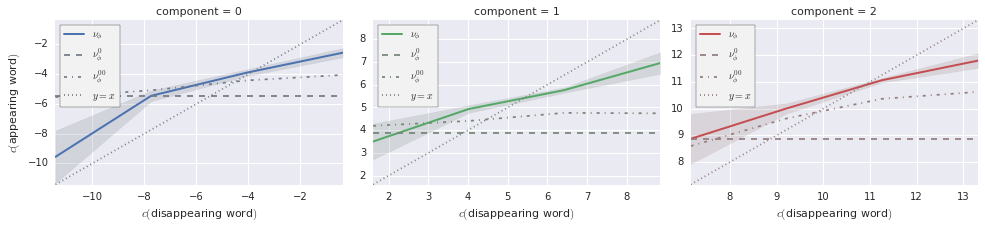

In [25]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation)
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.3 CAVEAT: reduction of the numbers of words and substitutions

As explained above, this PCA analysis can only use words for which *all* the features are defined (in this case, the features listed in `PAPER_FEATURES`). So note the following:

In [26]:
for feature in PAPER_FEATURES:
    print("Feature '{}' is based on {} words."
          .format(feature, len(Substitution._transformed_feature(feature)())))

# Compute the number of words that have all PAPER_FEATURES defined.
words = set()
for tfeature in [Substitution._transformed_feature(feature) for feature in PAPER_FEATURES]:
    words.update(tfeature())

data = dict((feature, []) for feature in PAPER_FEATURES)
words_list = []
for word in words:
    words_list.append(word)
    for feature in PAPER_FEATURES:
        data[feature].append(Substitution._transformed_feature(feature)(word))
wordsdf = pd.DataFrame(data)
wordsdf['words'] = words_list
del words_list, data

print()
print("Among all the set of words used by these features, only {} are used."
      .format(len(wordsdf.dropna())))

print()
print("Similarly, we mined {} (cluster-unique) substitutions, but the PCA is in fact"
      " computed on {} of them (those where all features are defined)."
      .format(len(set(variations['cluster_id'])), len(pcavariations)))

Feature 'frequency' is based on 33450 words.
Feature 'aoa' is based on 30102 words.
Feature 'clustering' is based on 5739 words.
Feature 'letters_count' is based on 42786 words.
Feature 'synonyms_count' is based on 147306 words.
Feature 'orthographic_density' is based on 27751 words.



Among all the set of words used by these features, only 3322 are used.

Similarly, we mined 1643 (cluster-unique) substitutions, but the PCA is in fact computed on 800 of them (those where all features are defined).


The way $\mathcal{H}_0$ and $\mathcal{H}_{00}$ are computed makes them also affected by this.